In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
tf.reset_default_graph()

batch_size = 8

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
Y    = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])
keep_prob = tf.placeholder(dtype=tf.float32, shape=(), name='keep_prob')

dec_in_channels = 1
n_latent = 8

reshaped_dim = [-1, 7, 7, dec_in_channels]
inputs_decoder = 49 * dec_in_channels // 2


def lrelu(x, alpha=0.3):
    return tf.maximum(x, tf.multiply(x, alpha))

In [10]:
def encoder(X_in, keep_prob):
    activation = lrelu
    with tf.variable_scope("encoder", reuse=None):
        # Capa de entrada, dimension 28X28 del tamaño de la imagen
        X = tf.reshape(X_in, shape=[-1, 28, 28, 1])
        
        
        x = tf.layers.conv2d(X, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=1, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.contrib.layers.flatten(x)
        
        mn = tf.layers.dense(x, units=n_latent)
        sd       = 0.5 * tf.layers.dense(x, units=n_latent)            
        epsilon = tf.random_normal(tf.stack([tf.shape(x)[0], n_latent])) 
        z  = mn + tf.multiply(epsilon, tf.exp(sd))
        
    return z, mn, sd

In [11]:
def decoder(sampled_z, keep_prob):
    with tf.variable_scope("decoder", reuse=None):
        
        x = tf.layers.dense(sampled_z, units=inputs_decoder, activation=lrelu)
        
        x = tf.layers.dense(x, units=inputs_decoder * 2 + 1, activation=lrelu)
        x = tf.reshape(x, reshaped_dim)
        
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=2, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        
        x = tf.contrib.layers.flatten(x)
        x = tf.layers.dense(x, units=28*28, activation=tf.nn.sigmoid)
        img = tf.reshape(x, shape=[-1, 28, 28])
    return img

In [12]:
sampled, mn, sd = encoder(X_in, keep_prob)
dec = decoder(sampled, keep_prob)

In [13]:
unreshaped = tf.reshape(dec, [-1, 28*28])
img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, Y_flat), 1)
latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sd - tf.square(mn) - tf.exp(2.0 * sd), 1)
loss = tf.reduce_mean(img_loss + latent_loss)
optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

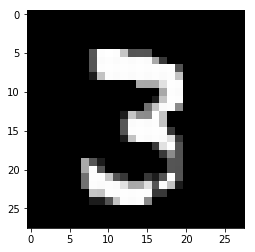

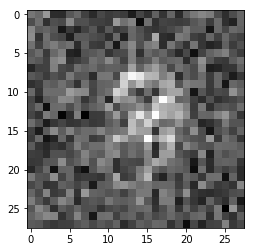

0 179.49936 179.49564 0.0037407875
1 179.49936 179.49564 0.0037407875
2 179.49936 179.49564 0.0037407875
3 179.49936 179.49564 0.0037407875
4 179.49936 179.49564 0.0037407875
5 179.49936 179.49564 0.0037407875
6 179.49936 179.49564 0.0037407875
7 179.49936 179.49564 0.0037407875
8 179.49936 179.49564 0.0037407875
9 179.49936 179.49564 0.0037407875
10 179.49936 179.49564 0.0037407875
11 179.49936 179.49564 0.0037407875
12 179.49936 179.49564 0.0037407875
13 179.49936 179.49564 0.0037407875
14 179.49936 179.49564 0.0037407875
15 179.49936 179.49564 0.0037407875
16 179.49936 179.49564 0.0037407875
17 179.49936 179.49564 0.0037407875
18 179.49936 179.49564 0.0037407875
19 179.49936 179.49564 0.0037407875
20 179.49936 179.49564 0.0037407875
21 179.49936 179.49564 0.0037407875
22 179.49936 179.49564 0.0037407875
23 179.49936 179.49564 0.0037407875
24 179.49936 179.49564 0.0037407875
25 179.49936 179.49564 0.0037407875
26 179.49936 179.49564 0.0037407875
27 179.49936 179.49564 0.0037407875
28

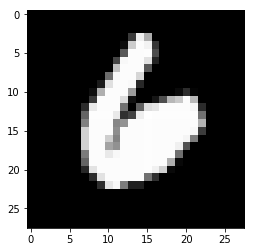

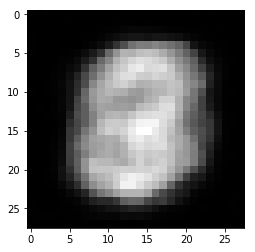

200 55.576607 55.038063 0.5385405
201 55.576607 55.038063 0.5385405
202 55.576607 55.038063 0.5385405
203 55.576607 55.038063 0.5385405
204 55.576607 55.038063 0.5385405
205 55.576607 55.038063 0.5385405
206 55.576607 55.038063 0.5385405
207 55.576607 55.038063 0.5385405
208 55.576607 55.038063 0.5385405
209 55.576607 55.038063 0.5385405
210 55.576607 55.038063 0.5385405
211 55.576607 55.038063 0.5385405
212 55.576607 55.038063 0.5385405
213 55.576607 55.038063 0.5385405
214 55.576607 55.038063 0.5385405
215 55.576607 55.038063 0.5385405
216 55.576607 55.038063 0.5385405
217 55.576607 55.038063 0.5385405
218 55.576607 55.038063 0.5385405
219 55.576607 55.038063 0.5385405
220 55.576607 55.038063 0.5385405
221 55.576607 55.038063 0.5385405
222 55.576607 55.038063 0.5385405
223 55.576607 55.038063 0.5385405
224 55.576607 55.038063 0.5385405
225 55.576607 55.038063 0.5385405
226 55.576607 55.038063 0.5385405
227 55.576607 55.038063 0.5385405
228 55.576607 55.038063 0.5385405
229 55.576607 

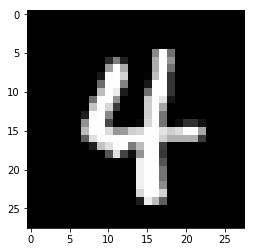

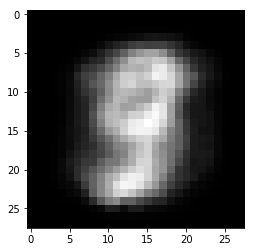

400 48.190643 47.337532 0.85311157
401 48.190643 47.337532 0.85311157
402 48.190643 47.337532 0.85311157
403 48.190643 47.337532 0.85311157
404 48.190643 47.337532 0.85311157
405 48.190643 47.337532 0.85311157
406 48.190643 47.337532 0.85311157
407 48.190643 47.337532 0.85311157
408 48.190643 47.337532 0.85311157
409 48.190643 47.337532 0.85311157
410 48.190643 47.337532 0.85311157
411 48.190643 47.337532 0.85311157
412 48.190643 47.337532 0.85311157
413 48.190643 47.337532 0.85311157
414 48.190643 47.337532 0.85311157
415 48.190643 47.337532 0.85311157
416 48.190643 47.337532 0.85311157
417 48.190643 47.337532 0.85311157
418 48.190643 47.337532 0.85311157
419 48.190643 47.337532 0.85311157
420 48.190643 47.337532 0.85311157
421 48.190643 47.337532 0.85311157
422 48.190643 47.337532 0.85311157
423 48.190643 47.337532 0.85311157
424 48.190643 47.337532 0.85311157
425 48.190643 47.337532 0.85311157
426 48.190643 47.337532 0.85311157
427 48.190643 47.337532 0.85311157
428 48.190643 47.337

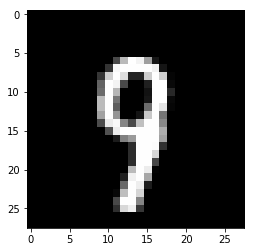

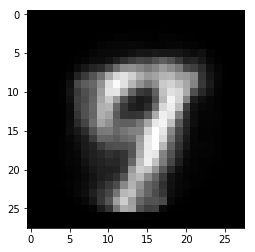

600 40.080345 37.374763 2.7055788
601 40.080345 37.374763 2.7055788
602 40.080345 37.374763 2.7055788
603 40.080345 37.374763 2.7055788
604 40.080345 37.374763 2.7055788
605 40.080345 37.374763 2.7055788
606 40.080345 37.374763 2.7055788
607 40.080345 37.374763 2.7055788
608 40.080345 37.374763 2.7055788
609 40.080345 37.374763 2.7055788
610 40.080345 37.374763 2.7055788
611 40.080345 37.374763 2.7055788
612 40.080345 37.374763 2.7055788
613 40.080345 37.374763 2.7055788
614 40.080345 37.374763 2.7055788
615 40.080345 37.374763 2.7055788
616 40.080345 37.374763 2.7055788
617 40.080345 37.374763 2.7055788
618 40.080345 37.374763 2.7055788
619 40.080345 37.374763 2.7055788
620 40.080345 37.374763 2.7055788
621 40.080345 37.374763 2.7055788
622 40.080345 37.374763 2.7055788
623 40.080345 37.374763 2.7055788
624 40.080345 37.374763 2.7055788
625 40.080345 37.374763 2.7055788
626 40.080345 37.374763 2.7055788
627 40.080345 37.374763 2.7055788
628 40.080345 37.374763 2.7055788
629 40.080345 

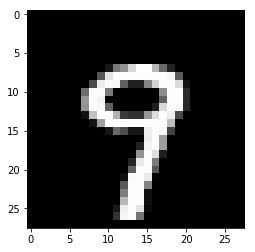

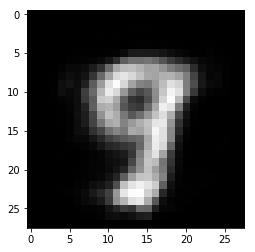

800 41.13123 36.608864 4.522362
801 41.13123 36.608864 4.522362
802 41.13123 36.608864 4.522362
803 41.13123 36.608864 4.522362
804 41.13123 36.608864 4.522362
805 41.13123 36.608864 4.522362
806 41.13123 36.608864 4.522362
807 41.13123 36.608864 4.522362
808 41.13123 36.608864 4.522362
809 41.13123 36.608864 4.522362
810 41.13123 36.608864 4.522362
811 41.13123 36.608864 4.522362
812 41.13123 36.608864 4.522362
813 41.13123 36.608864 4.522362
814 41.13123 36.608864 4.522362
815 41.13123 36.608864 4.522362
816 41.13123 36.608864 4.522362
817 41.13123 36.608864 4.522362
818 41.13123 36.608864 4.522362
819 41.13123 36.608864 4.522362
820 41.13123 36.608864 4.522362
821 41.13123 36.608864 4.522362
822 41.13123 36.608864 4.522362
823 41.13123 36.608864 4.522362
824 41.13123 36.608864 4.522362
825 41.13123 36.608864 4.522362
826 41.13123 36.608864 4.522362
827 41.13123 36.608864 4.522362
828 41.13123 36.608864 4.522362
829 41.13123 36.608864 4.522362
830 41.13123 36.608864 4.522362
831 41.1

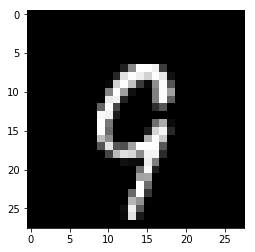

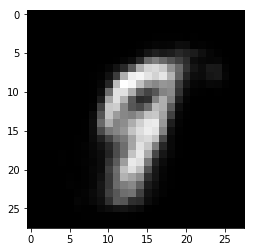

1000 34.229366 27.15142 7.0779467
1001 34.229366 27.15142 7.0779467
1002 34.229366 27.15142 7.0779467
1003 34.229366 27.15142 7.0779467
1004 34.229366 27.15142 7.0779467
1005 34.229366 27.15142 7.0779467
1006 34.229366 27.15142 7.0779467
1007 34.229366 27.15142 7.0779467
1008 34.229366 27.15142 7.0779467
1009 34.229366 27.15142 7.0779467
1010 34.229366 27.15142 7.0779467
1011 34.229366 27.15142 7.0779467
1012 34.229366 27.15142 7.0779467
1013 34.229366 27.15142 7.0779467
1014 34.229366 27.15142 7.0779467
1015 34.229366 27.15142 7.0779467
1016 34.229366 27.15142 7.0779467
1017 34.229366 27.15142 7.0779467
1018 34.229366 27.15142 7.0779467
1019 34.229366 27.15142 7.0779467
1020 34.229366 27.15142 7.0779467
1021 34.229366 27.15142 7.0779467
1022 34.229366 27.15142 7.0779467
1023 34.229366 27.15142 7.0779467
1024 34.229366 27.15142 7.0779467
1025 34.229366 27.15142 7.0779467
1026 34.229366 27.15142 7.0779467
1027 34.229366 27.15142 7.0779467
1028 34.229366 27.15142 7.0779467
1029 34.229366

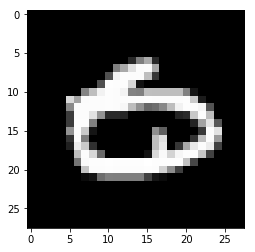

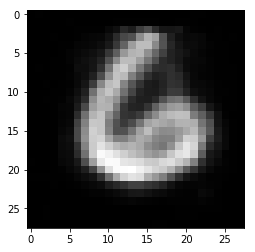

1200 43.623516 37.1038 6.5197144
1201 43.623516 37.1038 6.5197144
1202 43.623516 37.1038 6.5197144
1203 43.623516 37.1038 6.5197144
1204 43.623516 37.1038 6.5197144
1205 43.623516 37.1038 6.5197144
1206 43.623516 37.1038 6.5197144
1207 43.623516 37.1038 6.5197144
1208 43.623516 37.1038 6.5197144
1209 43.623516 37.1038 6.5197144
1210 43.623516 37.1038 6.5197144
1211 43.623516 37.1038 6.5197144
1212 43.623516 37.1038 6.5197144
1213 43.623516 37.1038 6.5197144
1214 43.623516 37.1038 6.5197144
1215 43.623516 37.1038 6.5197144
1216 43.623516 37.1038 6.5197144
1217 43.623516 37.1038 6.5197144
1218 43.623516 37.1038 6.5197144
1219 43.623516 37.1038 6.5197144
1220 43.623516 37.1038 6.5197144
1221 43.623516 37.1038 6.5197144
1222 43.623516 37.1038 6.5197144
1223 43.623516 37.1038 6.5197144
1224 43.623516 37.1038 6.5197144
1225 43.623516 37.1038 6.5197144
1226 43.623516 37.1038 6.5197144
1227 43.623516 37.1038 6.5197144
1228 43.623516 37.1038 6.5197144
1229 43.623516 37.1038 6.5197144
1230 43.62

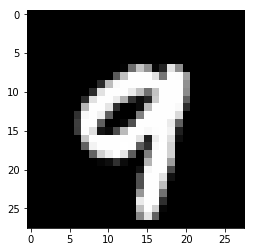

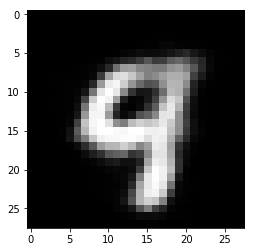

1400 31.281761 24.376621 6.905138
1401 31.281761 24.376621 6.905138
1402 31.281761 24.376621 6.905138
1403 31.281761 24.376621 6.905138
1404 31.281761 24.376621 6.905138
1405 31.281761 24.376621 6.905138
1406 31.281761 24.376621 6.905138
1407 31.281761 24.376621 6.905138
1408 31.281761 24.376621 6.905138
1409 31.281761 24.376621 6.905138
1410 31.281761 24.376621 6.905138
1411 31.281761 24.376621 6.905138
1412 31.281761 24.376621 6.905138
1413 31.281761 24.376621 6.905138
1414 31.281761 24.376621 6.905138
1415 31.281761 24.376621 6.905138
1416 31.281761 24.376621 6.905138
1417 31.281761 24.376621 6.905138
1418 31.281761 24.376621 6.905138
1419 31.281761 24.376621 6.905138
1420 31.281761 24.376621 6.905138
1421 31.281761 24.376621 6.905138
1422 31.281761 24.376621 6.905138
1423 31.281761 24.376621 6.905138
1424 31.281761 24.376621 6.905138
1425 31.281761 24.376621 6.905138
1426 31.281761 24.376621 6.905138
1427 31.281761 24.376621 6.905138
1428 31.281761 24.376621 6.905138
1429 31.281761

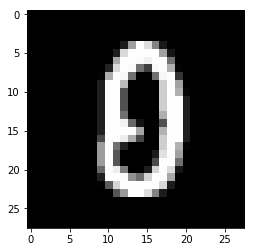

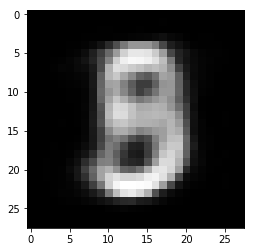

1600 36.49319 29.206018 7.2871733
1601 36.49319 29.206018 7.2871733
1602 36.49319 29.206018 7.2871733
1603 36.49319 29.206018 7.2871733
1604 36.49319 29.206018 7.2871733
1605 36.49319 29.206018 7.2871733
1606 36.49319 29.206018 7.2871733
1607 36.49319 29.206018 7.2871733
1608 36.49319 29.206018 7.2871733
1609 36.49319 29.206018 7.2871733
1610 36.49319 29.206018 7.2871733
1611 36.49319 29.206018 7.2871733
1612 36.49319 29.206018 7.2871733
1613 36.49319 29.206018 7.2871733
1614 36.49319 29.206018 7.2871733
1615 36.49319 29.206018 7.2871733
1616 36.49319 29.206018 7.2871733
1617 36.49319 29.206018 7.2871733
1618 36.49319 29.206018 7.2871733
1619 36.49319 29.206018 7.2871733
1620 36.49319 29.206018 7.2871733
1621 36.49319 29.206018 7.2871733
1622 36.49319 29.206018 7.2871733
1623 36.49319 29.206018 7.2871733
1624 36.49319 29.206018 7.2871733
1625 36.49319 29.206018 7.2871733
1626 36.49319 29.206018 7.2871733
1627 36.49319 29.206018 7.2871733
1628 36.49319 29.206018 7.2871733
1629 36.49319 

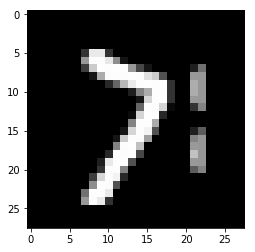

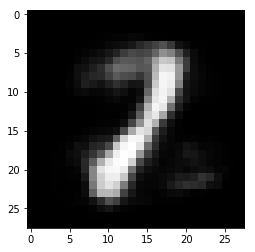

1800 33.500267 26.842384 6.657886
1801 33.500267 26.842384 6.657886
1802 33.500267 26.842384 6.657886
1803 33.500267 26.842384 6.657886
1804 33.500267 26.842384 6.657886
1805 33.500267 26.842384 6.657886
1806 33.500267 26.842384 6.657886
1807 33.500267 26.842384 6.657886
1808 33.500267 26.842384 6.657886
1809 33.500267 26.842384 6.657886
1810 33.500267 26.842384 6.657886
1811 33.500267 26.842384 6.657886
1812 33.500267 26.842384 6.657886
1813 33.500267 26.842384 6.657886
1814 33.500267 26.842384 6.657886
1815 33.500267 26.842384 6.657886
1816 33.500267 26.842384 6.657886
1817 33.500267 26.842384 6.657886
1818 33.500267 26.842384 6.657886
1819 33.500267 26.842384 6.657886
1820 33.500267 26.842384 6.657886
1821 33.500267 26.842384 6.657886
1822 33.500267 26.842384 6.657886
1823 33.500267 26.842384 6.657886
1824 33.500267 26.842384 6.657886
1825 33.500267 26.842384 6.657886
1826 33.500267 26.842384 6.657886
1827 33.500267 26.842384 6.657886
1828 33.500267 26.842384 6.657886
1829 33.500267

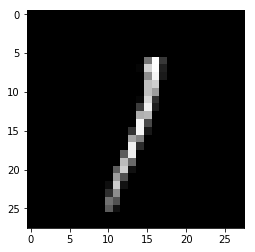

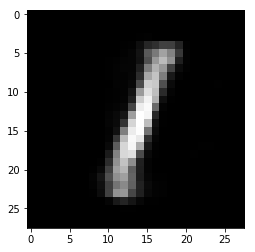

2000 28.994328 21.310932 7.6833954
2001 28.994328 21.310932 7.6833954
2002 28.994328 21.310932 7.6833954
2003 28.994328 21.310932 7.6833954
2004 28.994328 21.310932 7.6833954
2005 28.994328 21.310932 7.6833954
2006 28.994328 21.310932 7.6833954
2007 28.994328 21.310932 7.6833954
2008 28.994328 21.310932 7.6833954
2009 28.994328 21.310932 7.6833954
2010 28.994328 21.310932 7.6833954
2011 28.994328 21.310932 7.6833954
2012 28.994328 21.310932 7.6833954
2013 28.994328 21.310932 7.6833954
2014 28.994328 21.310932 7.6833954
2015 28.994328 21.310932 7.6833954
2016 28.994328 21.310932 7.6833954
2017 28.994328 21.310932 7.6833954
2018 28.994328 21.310932 7.6833954
2019 28.994328 21.310932 7.6833954
2020 28.994328 21.310932 7.6833954
2021 28.994328 21.310932 7.6833954
2022 28.994328 21.310932 7.6833954
2023 28.994328 21.310932 7.6833954
2024 28.994328 21.310932 7.6833954
2025 28.994328 21.310932 7.6833954
2026 28.994328 21.310932 7.6833954
2027 28.994328 21.310932 7.6833954
2028 28.994328 21.31

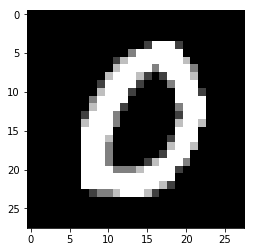

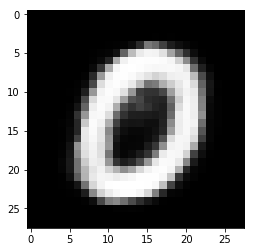

2200 33.575645 25.383999 8.191649
2201 33.575645 25.383999 8.191649
2202 33.575645 25.383999 8.191649
2203 33.575645 25.383999 8.191649
2204 33.575645 25.383999 8.191649
2205 33.575645 25.383999 8.191649
2206 33.575645 25.383999 8.191649
2207 33.575645 25.383999 8.191649
2208 33.575645 25.383999 8.191649
2209 33.575645 25.383999 8.191649
2210 33.575645 25.383999 8.191649
2211 33.575645 25.383999 8.191649
2212 33.575645 25.383999 8.191649
2213 33.575645 25.383999 8.191649
2214 33.575645 25.383999 8.191649
2215 33.575645 25.383999 8.191649
2216 33.575645 25.383999 8.191649
2217 33.575645 25.383999 8.191649
2218 33.575645 25.383999 8.191649
2219 33.575645 25.383999 8.191649
2220 33.575645 25.383999 8.191649
2221 33.575645 25.383999 8.191649
2222 33.575645 25.383999 8.191649
2223 33.575645 25.383999 8.191649
2224 33.575645 25.383999 8.191649
2225 33.575645 25.383999 8.191649
2226 33.575645 25.383999 8.191649
2227 33.575645 25.383999 8.191649
2228 33.575645 25.383999 8.191649
2229 33.575645

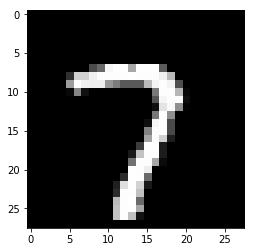

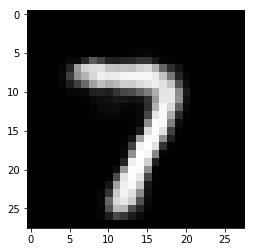

2400 37.030407 29.128038 7.9023695
2401 37.030407 29.128038 7.9023695
2402 37.030407 29.128038 7.9023695
2403 37.030407 29.128038 7.9023695
2404 37.030407 29.128038 7.9023695
2405 37.030407 29.128038 7.9023695
2406 37.030407 29.128038 7.9023695
2407 37.030407 29.128038 7.9023695
2408 37.030407 29.128038 7.9023695
2409 37.030407 29.128038 7.9023695
2410 37.030407 29.128038 7.9023695
2411 37.030407 29.128038 7.9023695
2412 37.030407 29.128038 7.9023695
2413 37.030407 29.128038 7.9023695
2414 37.030407 29.128038 7.9023695
2415 37.030407 29.128038 7.9023695
2416 37.030407 29.128038 7.9023695
2417 37.030407 29.128038 7.9023695
2418 37.030407 29.128038 7.9023695
2419 37.030407 29.128038 7.9023695
2420 37.030407 29.128038 7.9023695
2421 37.030407 29.128038 7.9023695
2422 37.030407 29.128038 7.9023695
2423 37.030407 29.128038 7.9023695
2424 37.030407 29.128038 7.9023695
2425 37.030407 29.128038 7.9023695
2426 37.030407 29.128038 7.9023695
2427 37.030407 29.128038 7.9023695
2428 37.030407 29.12

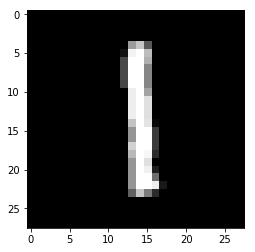

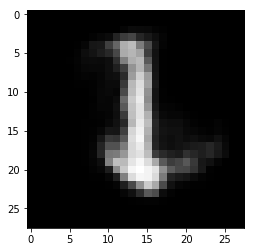

2600 31.47282 23.198751 8.274067
2601 31.47282 23.198751 8.274067
2602 31.47282 23.198751 8.274067
2603 31.47282 23.198751 8.274067
2604 31.47282 23.198751 8.274067
2605 31.47282 23.198751 8.274067
2606 31.47282 23.198751 8.274067
2607 31.47282 23.198751 8.274067
2608 31.47282 23.198751 8.274067
2609 31.47282 23.198751 8.274067
2610 31.47282 23.198751 8.274067
2611 31.47282 23.198751 8.274067
2612 31.47282 23.198751 8.274067
2613 31.47282 23.198751 8.274067
2614 31.47282 23.198751 8.274067
2615 31.47282 23.198751 8.274067
2616 31.47282 23.198751 8.274067
2617 31.47282 23.198751 8.274067
2618 31.47282 23.198751 8.274067
2619 31.47282 23.198751 8.274067
2620 31.47282 23.198751 8.274067
2621 31.47282 23.198751 8.274067
2622 31.47282 23.198751 8.274067
2623 31.47282 23.198751 8.274067
2624 31.47282 23.198751 8.274067
2625 31.47282 23.198751 8.274067
2626 31.47282 23.198751 8.274067
2627 31.47282 23.198751 8.274067
2628 31.47282 23.198751 8.274067
2629 31.47282 23.198751 8.274067
2630 31.47

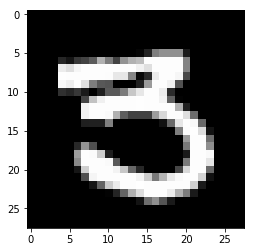

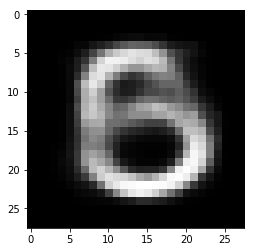

2800 38.216087 30.374924 7.8411665
2801 38.216087 30.374924 7.8411665
2802 38.216087 30.374924 7.8411665
2803 38.216087 30.374924 7.8411665
2804 38.216087 30.374924 7.8411665
2805 38.216087 30.374924 7.8411665
2806 38.216087 30.374924 7.8411665
2807 38.216087 30.374924 7.8411665
2808 38.216087 30.374924 7.8411665
2809 38.216087 30.374924 7.8411665
2810 38.216087 30.374924 7.8411665
2811 38.216087 30.374924 7.8411665
2812 38.216087 30.374924 7.8411665
2813 38.216087 30.374924 7.8411665
2814 38.216087 30.374924 7.8411665
2815 38.216087 30.374924 7.8411665
2816 38.216087 30.374924 7.8411665
2817 38.216087 30.374924 7.8411665
2818 38.216087 30.374924 7.8411665
2819 38.216087 30.374924 7.8411665
2820 38.216087 30.374924 7.8411665
2821 38.216087 30.374924 7.8411665
2822 38.216087 30.374924 7.8411665
2823 38.216087 30.374924 7.8411665
2824 38.216087 30.374924 7.8411665
2825 38.216087 30.374924 7.8411665
2826 38.216087 30.374924 7.8411665
2827 38.216087 30.374924 7.8411665
2828 38.216087 30.37

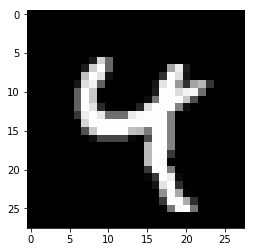

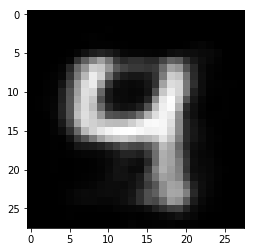

3000 29.061453 20.304863 8.75659
3001 29.061453 20.304863 8.75659
3002 29.061453 20.304863 8.75659
3003 29.061453 20.304863 8.75659
3004 29.061453 20.304863 8.75659
3005 29.061453 20.304863 8.75659
3006 29.061453 20.304863 8.75659
3007 29.061453 20.304863 8.75659
3008 29.061453 20.304863 8.75659
3009 29.061453 20.304863 8.75659
3010 29.061453 20.304863 8.75659
3011 29.061453 20.304863 8.75659
3012 29.061453 20.304863 8.75659
3013 29.061453 20.304863 8.75659
3014 29.061453 20.304863 8.75659
3015 29.061453 20.304863 8.75659
3016 29.061453 20.304863 8.75659
3017 29.061453 20.304863 8.75659
3018 29.061453 20.304863 8.75659
3019 29.061453 20.304863 8.75659
3020 29.061453 20.304863 8.75659
3021 29.061453 20.304863 8.75659
3022 29.061453 20.304863 8.75659
3023 29.061453 20.304863 8.75659
3024 29.061453 20.304863 8.75659
3025 29.061453 20.304863 8.75659
3026 29.061453 20.304863 8.75659
3027 29.061453 20.304863 8.75659
3028 29.061453 20.304863 8.75659
3029 29.061453 20.304863 8.75659
3030 29.06

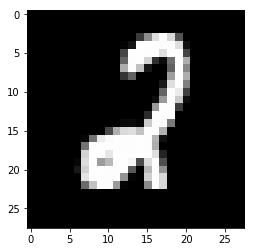

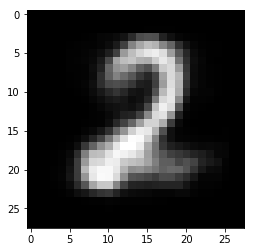

3200 32.75638 23.03468 9.721697
3201 32.75638 23.03468 9.721697
3202 32.75638 23.03468 9.721697
3203 32.75638 23.03468 9.721697
3204 32.75638 23.03468 9.721697
3205 32.75638 23.03468 9.721697
3206 32.75638 23.03468 9.721697
3207 32.75638 23.03468 9.721697
3208 32.75638 23.03468 9.721697
3209 32.75638 23.03468 9.721697
3210 32.75638 23.03468 9.721697
3211 32.75638 23.03468 9.721697
3212 32.75638 23.03468 9.721697
3213 32.75638 23.03468 9.721697
3214 32.75638 23.03468 9.721697
3215 32.75638 23.03468 9.721697
3216 32.75638 23.03468 9.721697
3217 32.75638 23.03468 9.721697
3218 32.75638 23.03468 9.721697
3219 32.75638 23.03468 9.721697
3220 32.75638 23.03468 9.721697
3221 32.75638 23.03468 9.721697
3222 32.75638 23.03468 9.721697
3223 32.75638 23.03468 9.721697
3224 32.75638 23.03468 9.721697
3225 32.75638 23.03468 9.721697
3226 32.75638 23.03468 9.721697
3227 32.75638 23.03468 9.721697
3228 32.75638 23.03468 9.721697
3229 32.75638 23.03468 9.721697
3230 32.75638 23.03468 9.721697
3231 32.

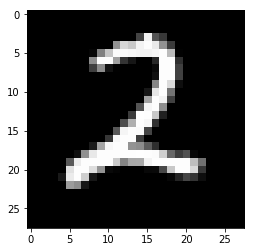

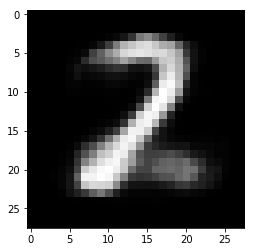

3400 35.52194 27.112885 8.409054
3401 35.52194 27.112885 8.409054
3402 35.52194 27.112885 8.409054
3403 35.52194 27.112885 8.409054
3404 35.52194 27.112885 8.409054
3405 35.52194 27.112885 8.409054
3406 35.52194 27.112885 8.409054
3407 35.52194 27.112885 8.409054
3408 35.52194 27.112885 8.409054
3409 35.52194 27.112885 8.409054
3410 35.52194 27.112885 8.409054
3411 35.52194 27.112885 8.409054
3412 35.52194 27.112885 8.409054
3413 35.52194 27.112885 8.409054
3414 35.52194 27.112885 8.409054
3415 35.52194 27.112885 8.409054
3416 35.52194 27.112885 8.409054
3417 35.52194 27.112885 8.409054
3418 35.52194 27.112885 8.409054
3419 35.52194 27.112885 8.409054
3420 35.52194 27.112885 8.409054
3421 35.52194 27.112885 8.409054
3422 35.52194 27.112885 8.409054
3423 35.52194 27.112885 8.409054
3424 35.52194 27.112885 8.409054
3425 35.52194 27.112885 8.409054
3426 35.52194 27.112885 8.409054
3427 35.52194 27.112885 8.409054
3428 35.52194 27.112885 8.409054
3429 35.52194 27.112885 8.409054
3430 35.52

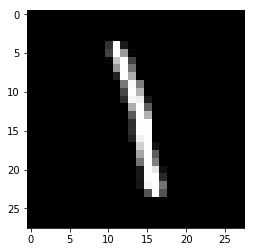

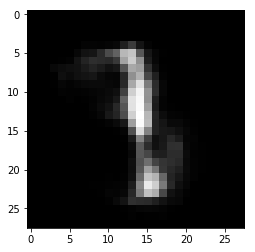

3600 29.416594 20.726583 8.69001
3601 29.416594 20.726583 8.69001
3602 29.416594 20.726583 8.69001
3603 29.416594 20.726583 8.69001
3604 29.416594 20.726583 8.69001
3605 29.416594 20.726583 8.69001
3606 29.416594 20.726583 8.69001
3607 29.416594 20.726583 8.69001
3608 29.416594 20.726583 8.69001
3609 29.416594 20.726583 8.69001
3610 29.416594 20.726583 8.69001
3611 29.416594 20.726583 8.69001
3612 29.416594 20.726583 8.69001
3613 29.416594 20.726583 8.69001
3614 29.416594 20.726583 8.69001
3615 29.416594 20.726583 8.69001
3616 29.416594 20.726583 8.69001
3617 29.416594 20.726583 8.69001
3618 29.416594 20.726583 8.69001
3619 29.416594 20.726583 8.69001
3620 29.416594 20.726583 8.69001
3621 29.416594 20.726583 8.69001
3622 29.416594 20.726583 8.69001
3623 29.416594 20.726583 8.69001
3624 29.416594 20.726583 8.69001
3625 29.416594 20.726583 8.69001
3626 29.416594 20.726583 8.69001
3627 29.416594 20.726583 8.69001
3628 29.416594 20.726583 8.69001
3629 29.416594 20.726583 8.69001
3630 29.41

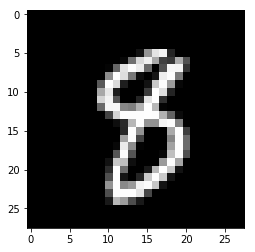

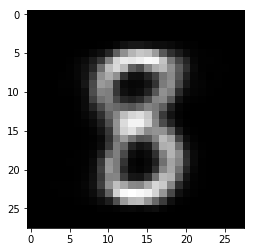

3800 32.152397 23.512499 8.639898
3801 32.152397 23.512499 8.639898
3802 32.152397 23.512499 8.639898
3803 32.152397 23.512499 8.639898
3804 32.152397 23.512499 8.639898
3805 32.152397 23.512499 8.639898
3806 32.152397 23.512499 8.639898
3807 32.152397 23.512499 8.639898
3808 32.152397 23.512499 8.639898
3809 32.152397 23.512499 8.639898
3810 32.152397 23.512499 8.639898
3811 32.152397 23.512499 8.639898
3812 32.152397 23.512499 8.639898
3813 32.152397 23.512499 8.639898
3814 32.152397 23.512499 8.639898
3815 32.152397 23.512499 8.639898
3816 32.152397 23.512499 8.639898
3817 32.152397 23.512499 8.639898
3818 32.152397 23.512499 8.639898
3819 32.152397 23.512499 8.639898
3820 32.152397 23.512499 8.639898
3821 32.152397 23.512499 8.639898
3822 32.152397 23.512499 8.639898
3823 32.152397 23.512499 8.639898
3824 32.152397 23.512499 8.639898
3825 32.152397 23.512499 8.639898
3826 32.152397 23.512499 8.639898
3827 32.152397 23.512499 8.639898
3828 32.152397 23.512499 8.639898
3829 32.152397

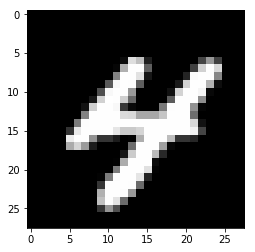

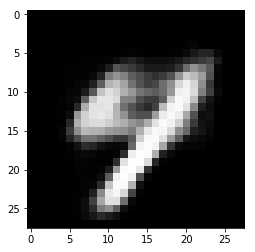

4000 27.745 20.048355 7.6966453
4001 27.745 20.048355 7.6966453
4002 27.745 20.048355 7.6966453
4003 27.745 20.048355 7.6966453
4004 27.745 20.048355 7.6966453
4005 27.745 20.048355 7.6966453
4006 27.745 20.048355 7.6966453
4007 27.745 20.048355 7.6966453
4008 27.745 20.048355 7.6966453
4009 27.745 20.048355 7.6966453
4010 27.745 20.048355 7.6966453
4011 27.745 20.048355 7.6966453
4012 27.745 20.048355 7.6966453
4013 27.745 20.048355 7.6966453
4014 27.745 20.048355 7.6966453
4015 27.745 20.048355 7.6966453
4016 27.745 20.048355 7.6966453
4017 27.745 20.048355 7.6966453
4018 27.745 20.048355 7.6966453
4019 27.745 20.048355 7.6966453
4020 27.745 20.048355 7.6966453
4021 27.745 20.048355 7.6966453
4022 27.745 20.048355 7.6966453
4023 27.745 20.048355 7.6966453
4024 27.745 20.048355 7.6966453
4025 27.745 20.048355 7.6966453
4026 27.745 20.048355 7.6966453
4027 27.745 20.048355 7.6966453
4028 27.745 20.048355 7.6966453
4029 27.745 20.048355 7.6966453
4030 27.745 20.048355 7.6966453
4031 27.

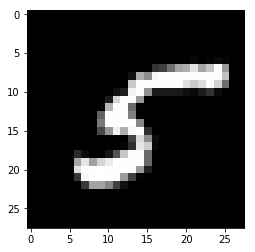

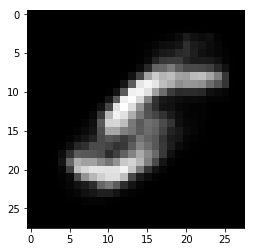

4200 32.136612 24.403004 7.7336106
4201 32.136612 24.403004 7.7336106
4202 32.136612 24.403004 7.7336106
4203 32.136612 24.403004 7.7336106
4204 32.136612 24.403004 7.7336106
4205 32.136612 24.403004 7.7336106
4206 32.136612 24.403004 7.7336106
4207 32.136612 24.403004 7.7336106
4208 32.136612 24.403004 7.7336106
4209 32.136612 24.403004 7.7336106
4210 32.136612 24.403004 7.7336106
4211 32.136612 24.403004 7.7336106
4212 32.136612 24.403004 7.7336106
4213 32.136612 24.403004 7.7336106
4214 32.136612 24.403004 7.7336106
4215 32.136612 24.403004 7.7336106
4216 32.136612 24.403004 7.7336106
4217 32.136612 24.403004 7.7336106
4218 32.136612 24.403004 7.7336106
4219 32.136612 24.403004 7.7336106
4220 32.136612 24.403004 7.7336106
4221 32.136612 24.403004 7.7336106
4222 32.136612 24.403004 7.7336106
4223 32.136612 24.403004 7.7336106
4224 32.136612 24.403004 7.7336106
4225 32.136612 24.403004 7.7336106
4226 32.136612 24.403004 7.7336106
4227 32.136612 24.403004 7.7336106
4228 32.136612 24.40

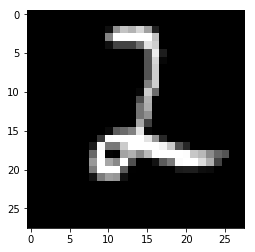

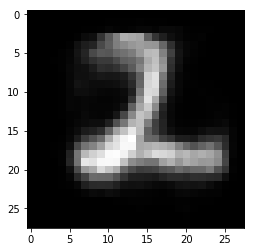

4400 30.81409 21.036663 9.777429
4401 30.81409 21.036663 9.777429
4402 30.81409 21.036663 9.777429
4403 30.81409 21.036663 9.777429
4404 30.81409 21.036663 9.777429
4405 30.81409 21.036663 9.777429
4406 30.81409 21.036663 9.777429
4407 30.81409 21.036663 9.777429
4408 30.81409 21.036663 9.777429
4409 30.81409 21.036663 9.777429
4410 30.81409 21.036663 9.777429
4411 30.81409 21.036663 9.777429
4412 30.81409 21.036663 9.777429
4413 30.81409 21.036663 9.777429
4414 30.81409 21.036663 9.777429
4415 30.81409 21.036663 9.777429
4416 30.81409 21.036663 9.777429
4417 30.81409 21.036663 9.777429
4418 30.81409 21.036663 9.777429
4419 30.81409 21.036663 9.777429
4420 30.81409 21.036663 9.777429
4421 30.81409 21.036663 9.777429
4422 30.81409 21.036663 9.777429
4423 30.81409 21.036663 9.777429
4424 30.81409 21.036663 9.777429
4425 30.81409 21.036663 9.777429
4426 30.81409 21.036663 9.777429
4427 30.81409 21.036663 9.777429
4428 30.81409 21.036663 9.777429
4429 30.81409 21.036663 9.777429
4430 30.81

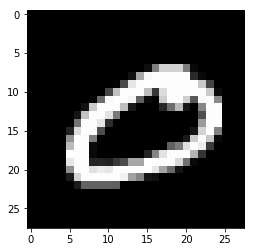

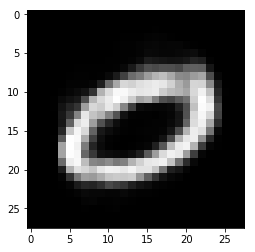

4600 30.342728 21.42426 8.918469
4601 30.342728 21.42426 8.918469
4602 30.342728 21.42426 8.918469
4603 30.342728 21.42426 8.918469
4604 30.342728 21.42426 8.918469
4605 30.342728 21.42426 8.918469
4606 30.342728 21.42426 8.918469
4607 30.342728 21.42426 8.918469
4608 30.342728 21.42426 8.918469
4609 30.342728 21.42426 8.918469
4610 30.342728 21.42426 8.918469
4611 30.342728 21.42426 8.918469
4612 30.342728 21.42426 8.918469
4613 30.342728 21.42426 8.918469
4614 30.342728 21.42426 8.918469
4615 30.342728 21.42426 8.918469
4616 30.342728 21.42426 8.918469
4617 30.342728 21.42426 8.918469
4618 30.342728 21.42426 8.918469
4619 30.342728 21.42426 8.918469
4620 30.342728 21.42426 8.918469
4621 30.342728 21.42426 8.918469
4622 30.342728 21.42426 8.918469
4623 30.342728 21.42426 8.918469
4624 30.342728 21.42426 8.918469
4625 30.342728 21.42426 8.918469
4626 30.342728 21.42426 8.918469
4627 30.342728 21.42426 8.918469
4628 30.342728 21.42426 8.918469
4629 30.342728 21.42426 8.918469
4630 30.34

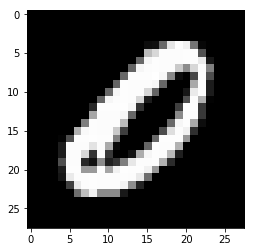

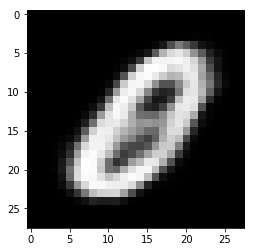

4800 32.497818 22.086884 10.410935
4801 32.497818 22.086884 10.410935
4802 32.497818 22.086884 10.410935
4803 32.497818 22.086884 10.410935
4804 32.497818 22.086884 10.410935
4805 32.497818 22.086884 10.410935
4806 32.497818 22.086884 10.410935
4807 32.497818 22.086884 10.410935
4808 32.497818 22.086884 10.410935
4809 32.497818 22.086884 10.410935
4810 32.497818 22.086884 10.410935
4811 32.497818 22.086884 10.410935
4812 32.497818 22.086884 10.410935
4813 32.497818 22.086884 10.410935
4814 32.497818 22.086884 10.410935
4815 32.497818 22.086884 10.410935
4816 32.497818 22.086884 10.410935
4817 32.497818 22.086884 10.410935
4818 32.497818 22.086884 10.410935
4819 32.497818 22.086884 10.410935
4820 32.497818 22.086884 10.410935
4821 32.497818 22.086884 10.410935
4822 32.497818 22.086884 10.410935
4823 32.497818 22.086884 10.410935
4824 32.497818 22.086884 10.410935
4825 32.497818 22.086884 10.410935
4826 32.497818 22.086884 10.410935
4827 32.497818 22.086884 10.410935
4828 32.497818 22.08

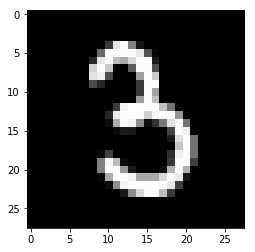

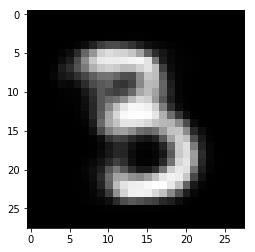

5000 25.833332 17.291397 8.541937
5001 25.833332 17.291397 8.541937
5002 25.833332 17.291397 8.541937
5003 25.833332 17.291397 8.541937
5004 25.833332 17.291397 8.541937
5005 25.833332 17.291397 8.541937
5006 25.833332 17.291397 8.541937
5007 25.833332 17.291397 8.541937
5008 25.833332 17.291397 8.541937
5009 25.833332 17.291397 8.541937
5010 25.833332 17.291397 8.541937
5011 25.833332 17.291397 8.541937
5012 25.833332 17.291397 8.541937
5013 25.833332 17.291397 8.541937
5014 25.833332 17.291397 8.541937
5015 25.833332 17.291397 8.541937
5016 25.833332 17.291397 8.541937
5017 25.833332 17.291397 8.541937
5018 25.833332 17.291397 8.541937
5019 25.833332 17.291397 8.541937
5020 25.833332 17.291397 8.541937
5021 25.833332 17.291397 8.541937
5022 25.833332 17.291397 8.541937
5023 25.833332 17.291397 8.541937
5024 25.833332 17.291397 8.541937
5025 25.833332 17.291397 8.541937
5026 25.833332 17.291397 8.541937
5027 25.833332 17.291397 8.541937
5028 25.833332 17.291397 8.541937
5029 25.833332

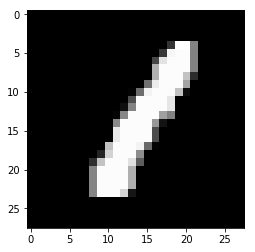

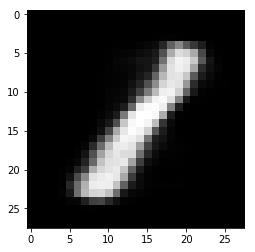

5200 35.937782 27.547235 8.390549
5201 35.937782 27.547235 8.390549
5202 35.937782 27.547235 8.390549
5203 35.937782 27.547235 8.390549
5204 35.937782 27.547235 8.390549
5205 35.937782 27.547235 8.390549
5206 35.937782 27.547235 8.390549
5207 35.937782 27.547235 8.390549
5208 35.937782 27.547235 8.390549
5209 35.937782 27.547235 8.390549
5210 35.937782 27.547235 8.390549
5211 35.937782 27.547235 8.390549
5212 35.937782 27.547235 8.390549
5213 35.937782 27.547235 8.390549
5214 35.937782 27.547235 8.390549
5215 35.937782 27.547235 8.390549
5216 35.937782 27.547235 8.390549
5217 35.937782 27.547235 8.390549
5218 35.937782 27.547235 8.390549
5219 35.937782 27.547235 8.390549
5220 35.937782 27.547235 8.390549
5221 35.937782 27.547235 8.390549
5222 35.937782 27.547235 8.390549
5223 35.937782 27.547235 8.390549
5224 35.937782 27.547235 8.390549
5225 35.937782 27.547235 8.390549
5226 35.937782 27.547235 8.390549
5227 35.937782 27.547235 8.390549
5228 35.937782 27.547235 8.390549
5229 35.937782

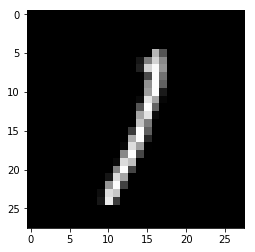

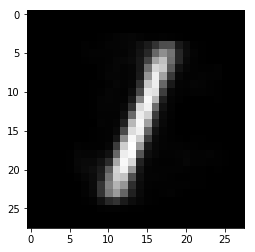

5400 32.944107 24.576618 8.367491
5401 32.944107 24.576618 8.367491
5402 32.944107 24.576618 8.367491
5403 32.944107 24.576618 8.367491
5404 32.944107 24.576618 8.367491
5405 32.944107 24.576618 8.367491
5406 32.944107 24.576618 8.367491
5407 32.944107 24.576618 8.367491
5408 32.944107 24.576618 8.367491
5409 32.944107 24.576618 8.367491
5410 32.944107 24.576618 8.367491
5411 32.944107 24.576618 8.367491
5412 32.944107 24.576618 8.367491
5413 32.944107 24.576618 8.367491
5414 32.944107 24.576618 8.367491
5415 32.944107 24.576618 8.367491
5416 32.944107 24.576618 8.367491
5417 32.944107 24.576618 8.367491
5418 32.944107 24.576618 8.367491
5419 32.944107 24.576618 8.367491
5420 32.944107 24.576618 8.367491
5421 32.944107 24.576618 8.367491
5422 32.944107 24.576618 8.367491
5423 32.944107 24.576618 8.367491
5424 32.944107 24.576618 8.367491
5425 32.944107 24.576618 8.367491
5426 32.944107 24.576618 8.367491
5427 32.944107 24.576618 8.367491
5428 32.944107 24.576618 8.367491
5429 32.944107

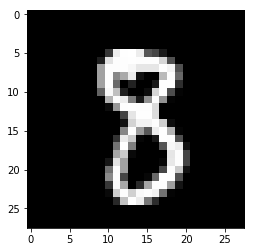

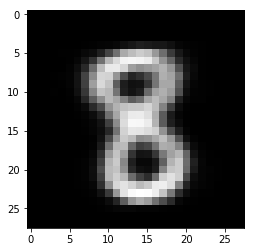

5600 30.69626 22.642904 8.053355
5601 30.69626 22.642904 8.053355
5602 30.69626 22.642904 8.053355
5603 30.69626 22.642904 8.053355
5604 30.69626 22.642904 8.053355
5605 30.69626 22.642904 8.053355
5606 30.69626 22.642904 8.053355
5607 30.69626 22.642904 8.053355
5608 30.69626 22.642904 8.053355
5609 30.69626 22.642904 8.053355
5610 30.69626 22.642904 8.053355
5611 30.69626 22.642904 8.053355
5612 30.69626 22.642904 8.053355
5613 30.69626 22.642904 8.053355
5614 30.69626 22.642904 8.053355
5615 30.69626 22.642904 8.053355
5616 30.69626 22.642904 8.053355
5617 30.69626 22.642904 8.053355
5618 30.69626 22.642904 8.053355
5619 30.69626 22.642904 8.053355
5620 30.69626 22.642904 8.053355
5621 30.69626 22.642904 8.053355
5622 30.69626 22.642904 8.053355
5623 30.69626 22.642904 8.053355
5624 30.69626 22.642904 8.053355
5625 30.69626 22.642904 8.053355
5626 30.69626 22.642904 8.053355
5627 30.69626 22.642904 8.053355
5628 30.69626 22.642904 8.053355
5629 30.69626 22.642904 8.053355
5630 30.69

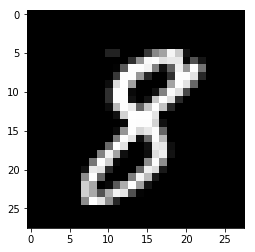

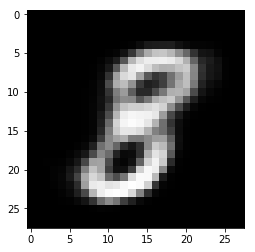

5800 27.567913 19.673885 7.8940268
5801 27.567913 19.673885 7.8940268
5802 27.567913 19.673885 7.8940268
5803 27.567913 19.673885 7.8940268
5804 27.567913 19.673885 7.8940268
5805 27.567913 19.673885 7.8940268
5806 27.567913 19.673885 7.8940268
5807 27.567913 19.673885 7.8940268
5808 27.567913 19.673885 7.8940268
5809 27.567913 19.673885 7.8940268
5810 27.567913 19.673885 7.8940268
5811 27.567913 19.673885 7.8940268
5812 27.567913 19.673885 7.8940268
5813 27.567913 19.673885 7.8940268
5814 27.567913 19.673885 7.8940268
5815 27.567913 19.673885 7.8940268
5816 27.567913 19.673885 7.8940268
5817 27.567913 19.673885 7.8940268
5818 27.567913 19.673885 7.8940268
5819 27.567913 19.673885 7.8940268
5820 27.567913 19.673885 7.8940268
5821 27.567913 19.673885 7.8940268
5822 27.567913 19.673885 7.8940268
5823 27.567913 19.673885 7.8940268
5824 27.567913 19.673885 7.8940268
5825 27.567913 19.673885 7.8940268
5826 27.567913 19.673885 7.8940268
5827 27.567913 19.673885 7.8940268
5828 27.567913 19.67

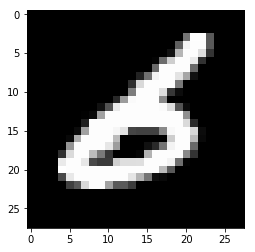

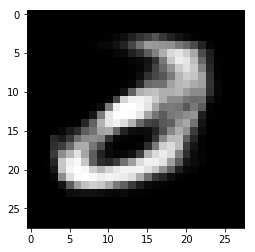

6000 34.373295 24.59365 9.779643
6001 34.373295 24.59365 9.779643
6002 34.373295 24.59365 9.779643
6003 34.373295 24.59365 9.779643
6004 34.373295 24.59365 9.779643
6005 34.373295 24.59365 9.779643
6006 34.373295 24.59365 9.779643
6007 34.373295 24.59365 9.779643
6008 34.373295 24.59365 9.779643
6009 34.373295 24.59365 9.779643
6010 34.373295 24.59365 9.779643
6011 34.373295 24.59365 9.779643
6012 34.373295 24.59365 9.779643
6013 34.373295 24.59365 9.779643
6014 34.373295 24.59365 9.779643
6015 34.373295 24.59365 9.779643
6016 34.373295 24.59365 9.779643
6017 34.373295 24.59365 9.779643
6018 34.373295 24.59365 9.779643
6019 34.373295 24.59365 9.779643
6020 34.373295 24.59365 9.779643
6021 34.373295 24.59365 9.779643
6022 34.373295 24.59365 9.779643
6023 34.373295 24.59365 9.779643
6024 34.373295 24.59365 9.779643
6025 34.373295 24.59365 9.779643
6026 34.373295 24.59365 9.779643
6027 34.373295 24.59365 9.779643
6028 34.373295 24.59365 9.779643
6029 34.373295 24.59365 9.779643
6030 34.37

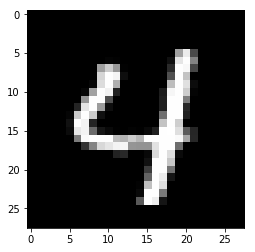

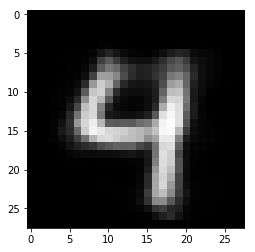

6200 30.50419 20.571613 9.932577
6201 30.50419 20.571613 9.932577
6202 30.50419 20.571613 9.932577
6203 30.50419 20.571613 9.932577
6204 30.50419 20.571613 9.932577
6205 30.50419 20.571613 9.932577
6206 30.50419 20.571613 9.932577
6207 30.50419 20.571613 9.932577
6208 30.50419 20.571613 9.932577
6209 30.50419 20.571613 9.932577
6210 30.50419 20.571613 9.932577
6211 30.50419 20.571613 9.932577
6212 30.50419 20.571613 9.932577
6213 30.50419 20.571613 9.932577
6214 30.50419 20.571613 9.932577
6215 30.50419 20.571613 9.932577
6216 30.50419 20.571613 9.932577
6217 30.50419 20.571613 9.932577
6218 30.50419 20.571613 9.932577
6219 30.50419 20.571613 9.932577
6220 30.50419 20.571613 9.932577
6221 30.50419 20.571613 9.932577
6222 30.50419 20.571613 9.932577
6223 30.50419 20.571613 9.932577
6224 30.50419 20.571613 9.932577
6225 30.50419 20.571613 9.932577
6226 30.50419 20.571613 9.932577
6227 30.50419 20.571613 9.932577
6228 30.50419 20.571613 9.932577
6229 30.50419 20.571613 9.932577
6230 30.50

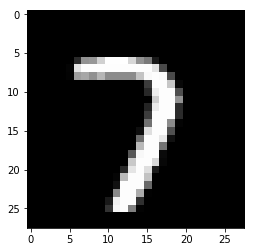

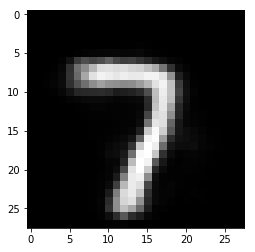

6400 32.224503 23.77343 8.451072
6401 32.224503 23.77343 8.451072
6402 32.224503 23.77343 8.451072
6403 32.224503 23.77343 8.451072
6404 32.224503 23.77343 8.451072
6405 32.224503 23.77343 8.451072
6406 32.224503 23.77343 8.451072
6407 32.224503 23.77343 8.451072
6408 32.224503 23.77343 8.451072
6409 32.224503 23.77343 8.451072
6410 32.224503 23.77343 8.451072
6411 32.224503 23.77343 8.451072
6412 32.224503 23.77343 8.451072
6413 32.224503 23.77343 8.451072
6414 32.224503 23.77343 8.451072
6415 32.224503 23.77343 8.451072
6416 32.224503 23.77343 8.451072
6417 32.224503 23.77343 8.451072
6418 32.224503 23.77343 8.451072
6419 32.224503 23.77343 8.451072
6420 32.224503 23.77343 8.451072
6421 32.224503 23.77343 8.451072
6422 32.224503 23.77343 8.451072
6423 32.224503 23.77343 8.451072
6424 32.224503 23.77343 8.451072
6425 32.224503 23.77343 8.451072
6426 32.224503 23.77343 8.451072
6427 32.224503 23.77343 8.451072
6428 32.224503 23.77343 8.451072
6429 32.224503 23.77343 8.451072
6430 32.22

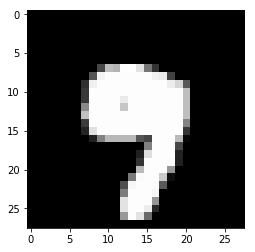

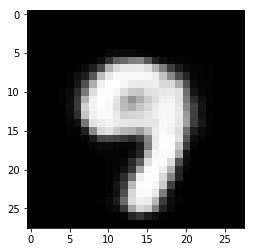

6600 31.086475 21.00843 10.078045
6601 31.086475 21.00843 10.078045
6602 31.086475 21.00843 10.078045
6603 31.086475 21.00843 10.078045
6604 31.086475 21.00843 10.078045
6605 31.086475 21.00843 10.078045
6606 31.086475 21.00843 10.078045
6607 31.086475 21.00843 10.078045
6608 31.086475 21.00843 10.078045
6609 31.086475 21.00843 10.078045
6610 31.086475 21.00843 10.078045
6611 31.086475 21.00843 10.078045
6612 31.086475 21.00843 10.078045
6613 31.086475 21.00843 10.078045
6614 31.086475 21.00843 10.078045
6615 31.086475 21.00843 10.078045
6616 31.086475 21.00843 10.078045
6617 31.086475 21.00843 10.078045
6618 31.086475 21.00843 10.078045
6619 31.086475 21.00843 10.078045
6620 31.086475 21.00843 10.078045
6621 31.086475 21.00843 10.078045
6622 31.086475 21.00843 10.078045
6623 31.086475 21.00843 10.078045
6624 31.086475 21.00843 10.078045
6625 31.086475 21.00843 10.078045
6626 31.086475 21.00843 10.078045
6627 31.086475 21.00843 10.078045
6628 31.086475 21.00843 10.078045
6629 31.086475

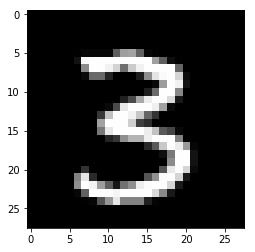

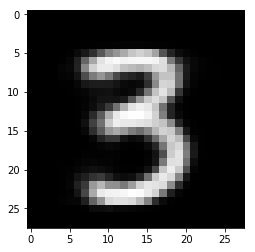

6800 31.448557 21.473206 9.975351
6801 31.448557 21.473206 9.975351
6802 31.448557 21.473206 9.975351
6803 31.448557 21.473206 9.975351
6804 31.448557 21.473206 9.975351
6805 31.448557 21.473206 9.975351
6806 31.448557 21.473206 9.975351
6807 31.448557 21.473206 9.975351
6808 31.448557 21.473206 9.975351
6809 31.448557 21.473206 9.975351
6810 31.448557 21.473206 9.975351
6811 31.448557 21.473206 9.975351
6812 31.448557 21.473206 9.975351
6813 31.448557 21.473206 9.975351
6814 31.448557 21.473206 9.975351
6815 31.448557 21.473206 9.975351
6816 31.448557 21.473206 9.975351
6817 31.448557 21.473206 9.975351
6818 31.448557 21.473206 9.975351
6819 31.448557 21.473206 9.975351
6820 31.448557 21.473206 9.975351
6821 31.448557 21.473206 9.975351
6822 31.448557 21.473206 9.975351
6823 31.448557 21.473206 9.975351
6824 31.448557 21.473206 9.975351
6825 31.448557 21.473206 9.975351
6826 31.448557 21.473206 9.975351
6827 31.448557 21.473206 9.975351
6828 31.448557 21.473206 9.975351
6829 31.448557

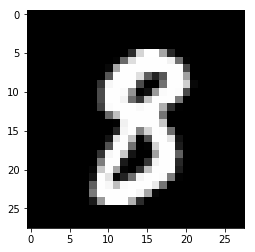

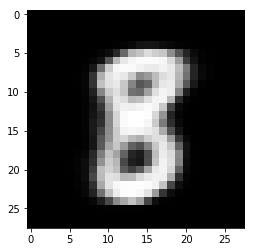

7000 29.452505 20.3497 9.102804
7001 29.452505 20.3497 9.102804
7002 29.452505 20.3497 9.102804
7003 29.452505 20.3497 9.102804
7004 29.452505 20.3497 9.102804
7005 29.452505 20.3497 9.102804
7006 29.452505 20.3497 9.102804
7007 29.452505 20.3497 9.102804
7008 29.452505 20.3497 9.102804
7009 29.452505 20.3497 9.102804
7010 29.452505 20.3497 9.102804
7011 29.452505 20.3497 9.102804
7012 29.452505 20.3497 9.102804
7013 29.452505 20.3497 9.102804
7014 29.452505 20.3497 9.102804
7015 29.452505 20.3497 9.102804
7016 29.452505 20.3497 9.102804
7017 29.452505 20.3497 9.102804
7018 29.452505 20.3497 9.102804
7019 29.452505 20.3497 9.102804
7020 29.452505 20.3497 9.102804
7021 29.452505 20.3497 9.102804
7022 29.452505 20.3497 9.102804
7023 29.452505 20.3497 9.102804
7024 29.452505 20.3497 9.102804
7025 29.452505 20.3497 9.102804
7026 29.452505 20.3497 9.102804
7027 29.452505 20.3497 9.102804
7028 29.452505 20.3497 9.102804
7029 29.452505 20.3497 9.102804
7030 29.452505 20.3497 9.102804
7031 29.

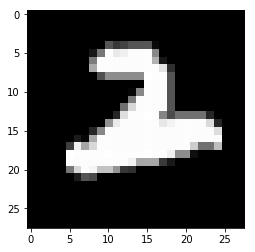

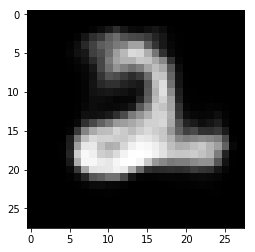

7200 27.79528 19.43589 8.359391
7201 27.79528 19.43589 8.359391
7202 27.79528 19.43589 8.359391
7203 27.79528 19.43589 8.359391
7204 27.79528 19.43589 8.359391
7205 27.79528 19.43589 8.359391
7206 27.79528 19.43589 8.359391
7207 27.79528 19.43589 8.359391
7208 27.79528 19.43589 8.359391
7209 27.79528 19.43589 8.359391
7210 27.79528 19.43589 8.359391
7211 27.79528 19.43589 8.359391
7212 27.79528 19.43589 8.359391
7213 27.79528 19.43589 8.359391
7214 27.79528 19.43589 8.359391
7215 27.79528 19.43589 8.359391
7216 27.79528 19.43589 8.359391
7217 27.79528 19.43589 8.359391
7218 27.79528 19.43589 8.359391
7219 27.79528 19.43589 8.359391
7220 27.79528 19.43589 8.359391
7221 27.79528 19.43589 8.359391
7222 27.79528 19.43589 8.359391
7223 27.79528 19.43589 8.359391
7224 27.79528 19.43589 8.359391
7225 27.79528 19.43589 8.359391
7226 27.79528 19.43589 8.359391
7227 27.79528 19.43589 8.359391
7228 27.79528 19.43589 8.359391
7229 27.79528 19.43589 8.359391
7230 27.79528 19.43589 8.359391
7231 27.

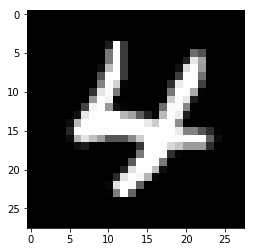

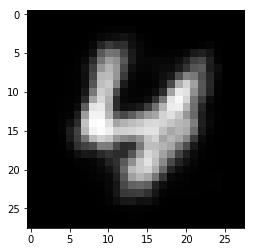

7400 29.15237 19.17841 9.973963
7401 29.15237 19.17841 9.973963
7402 29.15237 19.17841 9.973963
7403 29.15237 19.17841 9.973963
7404 29.15237 19.17841 9.973963
7405 29.15237 19.17841 9.973963
7406 29.15237 19.17841 9.973963
7407 29.15237 19.17841 9.973963
7408 29.15237 19.17841 9.973963
7409 29.15237 19.17841 9.973963
7410 29.15237 19.17841 9.973963
7411 29.15237 19.17841 9.973963
7412 29.15237 19.17841 9.973963
7413 29.15237 19.17841 9.973963
7414 29.15237 19.17841 9.973963
7415 29.15237 19.17841 9.973963
7416 29.15237 19.17841 9.973963
7417 29.15237 19.17841 9.973963
7418 29.15237 19.17841 9.973963
7419 29.15237 19.17841 9.973963
7420 29.15237 19.17841 9.973963
7421 29.15237 19.17841 9.973963
7422 29.15237 19.17841 9.973963
7423 29.15237 19.17841 9.973963
7424 29.15237 19.17841 9.973963
7425 29.15237 19.17841 9.973963
7426 29.15237 19.17841 9.973963
7427 29.15237 19.17841 9.973963
7428 29.15237 19.17841 9.973963
7429 29.15237 19.17841 9.973963
7430 29.15237 19.17841 9.973963
7431 29.

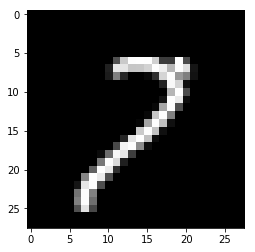

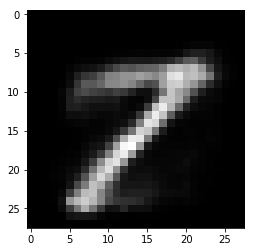

7600 38.79584 29.908958 8.886883
7601 38.79584 29.908958 8.886883
7602 38.79584 29.908958 8.886883
7603 38.79584 29.908958 8.886883
7604 38.79584 29.908958 8.886883
7605 38.79584 29.908958 8.886883
7606 38.79584 29.908958 8.886883
7607 38.79584 29.908958 8.886883
7608 38.79584 29.908958 8.886883
7609 38.79584 29.908958 8.886883
7610 38.79584 29.908958 8.886883
7611 38.79584 29.908958 8.886883
7612 38.79584 29.908958 8.886883
7613 38.79584 29.908958 8.886883
7614 38.79584 29.908958 8.886883
7615 38.79584 29.908958 8.886883
7616 38.79584 29.908958 8.886883
7617 38.79584 29.908958 8.886883
7618 38.79584 29.908958 8.886883
7619 38.79584 29.908958 8.886883
7620 38.79584 29.908958 8.886883
7621 38.79584 29.908958 8.886883
7622 38.79584 29.908958 8.886883
7623 38.79584 29.908958 8.886883
7624 38.79584 29.908958 8.886883
7625 38.79584 29.908958 8.886883
7626 38.79584 29.908958 8.886883
7627 38.79584 29.908958 8.886883
7628 38.79584 29.908958 8.886883
7629 38.79584 29.908958 8.886883
7630 38.79

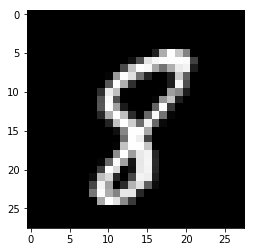

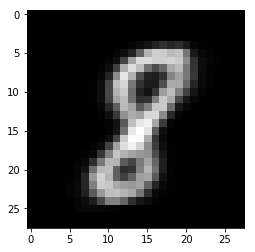

7800 28.617405 18.887772 9.729632
7801 28.617405 18.887772 9.729632
7802 28.617405 18.887772 9.729632
7803 28.617405 18.887772 9.729632
7804 28.617405 18.887772 9.729632
7805 28.617405 18.887772 9.729632
7806 28.617405 18.887772 9.729632
7807 28.617405 18.887772 9.729632
7808 28.617405 18.887772 9.729632
7809 28.617405 18.887772 9.729632
7810 28.617405 18.887772 9.729632
7811 28.617405 18.887772 9.729632
7812 28.617405 18.887772 9.729632
7813 28.617405 18.887772 9.729632
7814 28.617405 18.887772 9.729632
7815 28.617405 18.887772 9.729632
7816 28.617405 18.887772 9.729632
7817 28.617405 18.887772 9.729632
7818 28.617405 18.887772 9.729632
7819 28.617405 18.887772 9.729632
7820 28.617405 18.887772 9.729632
7821 28.617405 18.887772 9.729632
7822 28.617405 18.887772 9.729632
7823 28.617405 18.887772 9.729632
7824 28.617405 18.887772 9.729632
7825 28.617405 18.887772 9.729632
7826 28.617405 18.887772 9.729632
7827 28.617405 18.887772 9.729632
7828 28.617405 18.887772 9.729632
7829 28.617405

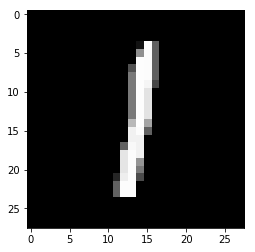

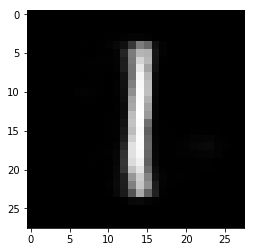

8000 28.5752 18.550734 10.024466
8001 28.5752 18.550734 10.024466
8002 28.5752 18.550734 10.024466
8003 28.5752 18.550734 10.024466
8004 28.5752 18.550734 10.024466
8005 28.5752 18.550734 10.024466
8006 28.5752 18.550734 10.024466
8007 28.5752 18.550734 10.024466
8008 28.5752 18.550734 10.024466
8009 28.5752 18.550734 10.024466
8010 28.5752 18.550734 10.024466
8011 28.5752 18.550734 10.024466
8012 28.5752 18.550734 10.024466
8013 28.5752 18.550734 10.024466
8014 28.5752 18.550734 10.024466
8015 28.5752 18.550734 10.024466
8016 28.5752 18.550734 10.024466
8017 28.5752 18.550734 10.024466
8018 28.5752 18.550734 10.024466
8019 28.5752 18.550734 10.024466
8020 28.5752 18.550734 10.024466
8021 28.5752 18.550734 10.024466
8022 28.5752 18.550734 10.024466
8023 28.5752 18.550734 10.024466
8024 28.5752 18.550734 10.024466
8025 28.5752 18.550734 10.024466
8026 28.5752 18.550734 10.024466
8027 28.5752 18.550734 10.024466
8028 28.5752 18.550734 10.024466
8029 28.5752 18.550734 10.024466
8030 28.57

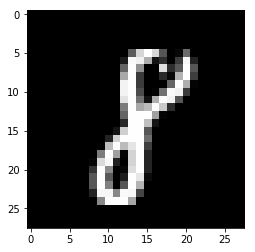

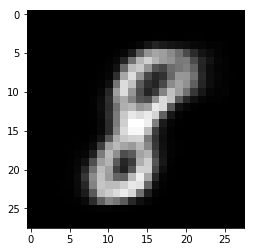

8200 32.402603 22.34807 10.054531
8201 32.402603 22.34807 10.054531
8202 32.402603 22.34807 10.054531
8203 32.402603 22.34807 10.054531
8204 32.402603 22.34807 10.054531
8205 32.402603 22.34807 10.054531
8206 32.402603 22.34807 10.054531
8207 32.402603 22.34807 10.054531
8208 32.402603 22.34807 10.054531
8209 32.402603 22.34807 10.054531
8210 32.402603 22.34807 10.054531
8211 32.402603 22.34807 10.054531
8212 32.402603 22.34807 10.054531
8213 32.402603 22.34807 10.054531
8214 32.402603 22.34807 10.054531
8215 32.402603 22.34807 10.054531
8216 32.402603 22.34807 10.054531
8217 32.402603 22.34807 10.054531
8218 32.402603 22.34807 10.054531
8219 32.402603 22.34807 10.054531
8220 32.402603 22.34807 10.054531
8221 32.402603 22.34807 10.054531
8222 32.402603 22.34807 10.054531
8223 32.402603 22.34807 10.054531
8224 32.402603 22.34807 10.054531
8225 32.402603 22.34807 10.054531
8226 32.402603 22.34807 10.054531
8227 32.402603 22.34807 10.054531
8228 32.402603 22.34807 10.054531
8229 32.402603

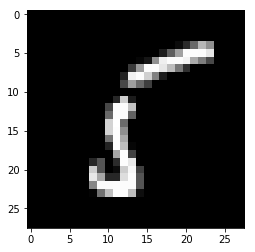

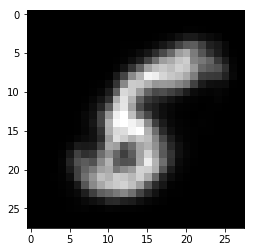

8400 34.492466 25.018124 9.474342
8401 34.492466 25.018124 9.474342
8402 34.492466 25.018124 9.474342
8403 34.492466 25.018124 9.474342
8404 34.492466 25.018124 9.474342
8405 34.492466 25.018124 9.474342
8406 34.492466 25.018124 9.474342
8407 34.492466 25.018124 9.474342
8408 34.492466 25.018124 9.474342
8409 34.492466 25.018124 9.474342
8410 34.492466 25.018124 9.474342
8411 34.492466 25.018124 9.474342
8412 34.492466 25.018124 9.474342
8413 34.492466 25.018124 9.474342
8414 34.492466 25.018124 9.474342
8415 34.492466 25.018124 9.474342
8416 34.492466 25.018124 9.474342
8417 34.492466 25.018124 9.474342
8418 34.492466 25.018124 9.474342
8419 34.492466 25.018124 9.474342
8420 34.492466 25.018124 9.474342
8421 34.492466 25.018124 9.474342
8422 34.492466 25.018124 9.474342
8423 34.492466 25.018124 9.474342
8424 34.492466 25.018124 9.474342
8425 34.492466 25.018124 9.474342
8426 34.492466 25.018124 9.474342
8427 34.492466 25.018124 9.474342
8428 34.492466 25.018124 9.474342
8429 34.492466

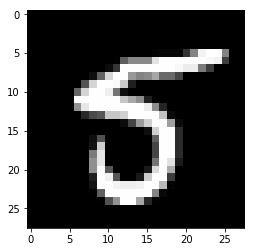

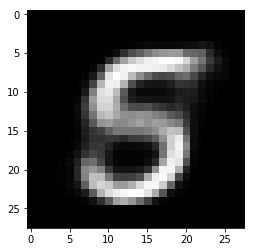

8600 28.219776 19.34962 8.870155
8601 28.219776 19.34962 8.870155
8602 28.219776 19.34962 8.870155
8603 28.219776 19.34962 8.870155
8604 28.219776 19.34962 8.870155
8605 28.219776 19.34962 8.870155
8606 28.219776 19.34962 8.870155
8607 28.219776 19.34962 8.870155
8608 28.219776 19.34962 8.870155
8609 28.219776 19.34962 8.870155
8610 28.219776 19.34962 8.870155
8611 28.219776 19.34962 8.870155
8612 28.219776 19.34962 8.870155
8613 28.219776 19.34962 8.870155
8614 28.219776 19.34962 8.870155
8615 28.219776 19.34962 8.870155
8616 28.219776 19.34962 8.870155
8617 28.219776 19.34962 8.870155
8618 28.219776 19.34962 8.870155
8619 28.219776 19.34962 8.870155
8620 28.219776 19.34962 8.870155
8621 28.219776 19.34962 8.870155
8622 28.219776 19.34962 8.870155
8623 28.219776 19.34962 8.870155
8624 28.219776 19.34962 8.870155
8625 28.219776 19.34962 8.870155
8626 28.219776 19.34962 8.870155
8627 28.219776 19.34962 8.870155
8628 28.219776 19.34962 8.870155
8629 28.219776 19.34962 8.870155
8630 28.21

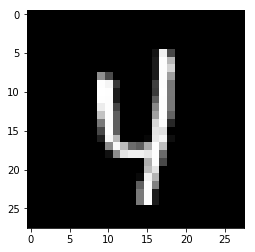

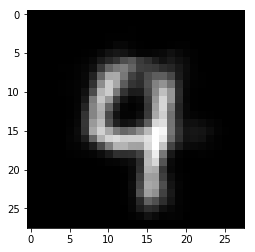

8800 32.13019 21.260227 10.869964
8801 32.13019 21.260227 10.869964
8802 32.13019 21.260227 10.869964
8803 32.13019 21.260227 10.869964
8804 32.13019 21.260227 10.869964
8805 32.13019 21.260227 10.869964
8806 32.13019 21.260227 10.869964
8807 32.13019 21.260227 10.869964
8808 32.13019 21.260227 10.869964
8809 32.13019 21.260227 10.869964
8810 32.13019 21.260227 10.869964
8811 32.13019 21.260227 10.869964
8812 32.13019 21.260227 10.869964
8813 32.13019 21.260227 10.869964
8814 32.13019 21.260227 10.869964
8815 32.13019 21.260227 10.869964
8816 32.13019 21.260227 10.869964
8817 32.13019 21.260227 10.869964
8818 32.13019 21.260227 10.869964
8819 32.13019 21.260227 10.869964
8820 32.13019 21.260227 10.869964
8821 32.13019 21.260227 10.869964
8822 32.13019 21.260227 10.869964
8823 32.13019 21.260227 10.869964
8824 32.13019 21.260227 10.869964
8825 32.13019 21.260227 10.869964
8826 32.13019 21.260227 10.869964
8827 32.13019 21.260227 10.869964
8828 32.13019 21.260227 10.869964
8829 32.13019 

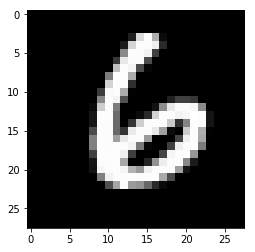

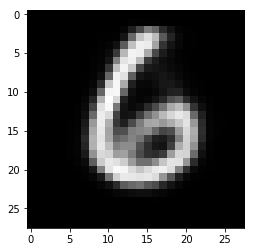

9000 30.697216 19.973387 10.723829
9001 30.697216 19.973387 10.723829
9002 30.697216 19.973387 10.723829
9003 30.697216 19.973387 10.723829
9004 30.697216 19.973387 10.723829
9005 30.697216 19.973387 10.723829
9006 30.697216 19.973387 10.723829
9007 30.697216 19.973387 10.723829
9008 30.697216 19.973387 10.723829
9009 30.697216 19.973387 10.723829
9010 30.697216 19.973387 10.723829
9011 30.697216 19.973387 10.723829
9012 30.697216 19.973387 10.723829
9013 30.697216 19.973387 10.723829
9014 30.697216 19.973387 10.723829
9015 30.697216 19.973387 10.723829
9016 30.697216 19.973387 10.723829
9017 30.697216 19.973387 10.723829
9018 30.697216 19.973387 10.723829
9019 30.697216 19.973387 10.723829
9020 30.697216 19.973387 10.723829
9021 30.697216 19.973387 10.723829
9022 30.697216 19.973387 10.723829
9023 30.697216 19.973387 10.723829
9024 30.697216 19.973387 10.723829
9025 30.697216 19.973387 10.723829
9026 30.697216 19.973387 10.723829
9027 30.697216 19.973387 10.723829
9028 30.697216 19.97

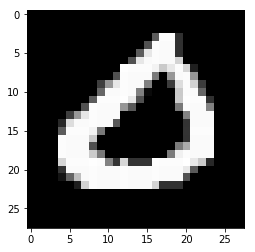

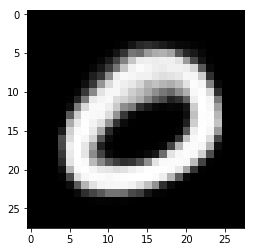

9200 33.242302 23.371134 9.871166
9201 33.242302 23.371134 9.871166
9202 33.242302 23.371134 9.871166
9203 33.242302 23.371134 9.871166
9204 33.242302 23.371134 9.871166
9205 33.242302 23.371134 9.871166
9206 33.242302 23.371134 9.871166
9207 33.242302 23.371134 9.871166
9208 33.242302 23.371134 9.871166
9209 33.242302 23.371134 9.871166
9210 33.242302 23.371134 9.871166
9211 33.242302 23.371134 9.871166
9212 33.242302 23.371134 9.871166
9213 33.242302 23.371134 9.871166
9214 33.242302 23.371134 9.871166
9215 33.242302 23.371134 9.871166
9216 33.242302 23.371134 9.871166
9217 33.242302 23.371134 9.871166
9218 33.242302 23.371134 9.871166
9219 33.242302 23.371134 9.871166
9220 33.242302 23.371134 9.871166
9221 33.242302 23.371134 9.871166
9222 33.242302 23.371134 9.871166
9223 33.242302 23.371134 9.871166
9224 33.242302 23.371134 9.871166
9225 33.242302 23.371134 9.871166
9226 33.242302 23.371134 9.871166
9227 33.242302 23.371134 9.871166
9228 33.242302 23.371134 9.871166
9229 33.242302

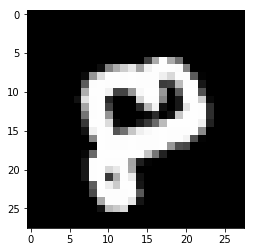

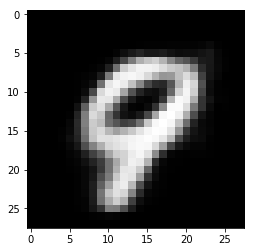

9400 31.383621 23.045456 8.338166
9401 31.383621 23.045456 8.338166
9402 31.383621 23.045456 8.338166
9403 31.383621 23.045456 8.338166
9404 31.383621 23.045456 8.338166
9405 31.383621 23.045456 8.338166
9406 31.383621 23.045456 8.338166
9407 31.383621 23.045456 8.338166
9408 31.383621 23.045456 8.338166
9409 31.383621 23.045456 8.338166
9410 31.383621 23.045456 8.338166
9411 31.383621 23.045456 8.338166
9412 31.383621 23.045456 8.338166
9413 31.383621 23.045456 8.338166
9414 31.383621 23.045456 8.338166
9415 31.383621 23.045456 8.338166
9416 31.383621 23.045456 8.338166
9417 31.383621 23.045456 8.338166
9418 31.383621 23.045456 8.338166
9419 31.383621 23.045456 8.338166
9420 31.383621 23.045456 8.338166
9421 31.383621 23.045456 8.338166
9422 31.383621 23.045456 8.338166
9423 31.383621 23.045456 8.338166
9424 31.383621 23.045456 8.338166
9425 31.383621 23.045456 8.338166
9426 31.383621 23.045456 8.338166
9427 31.383621 23.045456 8.338166
9428 31.383621 23.045456 8.338166
9429 31.383621

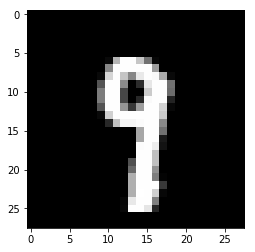

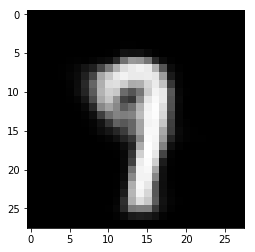

9600 28.866222 19.792452 9.0737705
9601 28.866222 19.792452 9.0737705
9602 28.866222 19.792452 9.0737705
9603 28.866222 19.792452 9.0737705
9604 28.866222 19.792452 9.0737705
9605 28.866222 19.792452 9.0737705
9606 28.866222 19.792452 9.0737705
9607 28.866222 19.792452 9.0737705
9608 28.866222 19.792452 9.0737705
9609 28.866222 19.792452 9.0737705
9610 28.866222 19.792452 9.0737705
9611 28.866222 19.792452 9.0737705
9612 28.866222 19.792452 9.0737705
9613 28.866222 19.792452 9.0737705
9614 28.866222 19.792452 9.0737705
9615 28.866222 19.792452 9.0737705
9616 28.866222 19.792452 9.0737705
9617 28.866222 19.792452 9.0737705
9618 28.866222 19.792452 9.0737705
9619 28.866222 19.792452 9.0737705
9620 28.866222 19.792452 9.0737705
9621 28.866222 19.792452 9.0737705
9622 28.866222 19.792452 9.0737705
9623 28.866222 19.792452 9.0737705
9624 28.866222 19.792452 9.0737705
9625 28.866222 19.792452 9.0737705
9626 28.866222 19.792452 9.0737705
9627 28.866222 19.792452 9.0737705
9628 28.866222 19.79

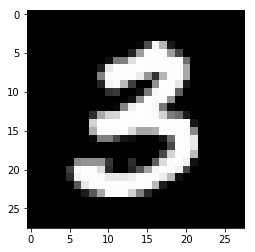

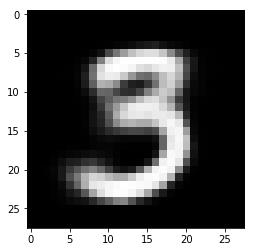

9800 28.868944 20.245392 8.623552
9801 28.868944 20.245392 8.623552
9802 28.868944 20.245392 8.623552
9803 28.868944 20.245392 8.623552
9804 28.868944 20.245392 8.623552
9805 28.868944 20.245392 8.623552
9806 28.868944 20.245392 8.623552
9807 28.868944 20.245392 8.623552
9808 28.868944 20.245392 8.623552
9809 28.868944 20.245392 8.623552
9810 28.868944 20.245392 8.623552
9811 28.868944 20.245392 8.623552
9812 28.868944 20.245392 8.623552
9813 28.868944 20.245392 8.623552
9814 28.868944 20.245392 8.623552
9815 28.868944 20.245392 8.623552
9816 28.868944 20.245392 8.623552
9817 28.868944 20.245392 8.623552
9818 28.868944 20.245392 8.623552
9819 28.868944 20.245392 8.623552
9820 28.868944 20.245392 8.623552
9821 28.868944 20.245392 8.623552
9822 28.868944 20.245392 8.623552
9823 28.868944 20.245392 8.623552
9824 28.868944 20.245392 8.623552
9825 28.868944 20.245392 8.623552
9826 28.868944 20.245392 8.623552
9827 28.868944 20.245392 8.623552
9828 28.868944 20.245392 8.623552
9829 28.868944

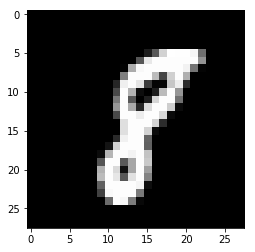

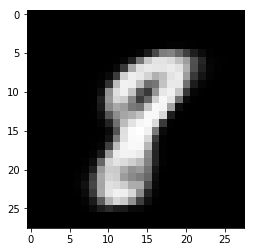

10000 29.360088 19.312523 10.0475645
10001 29.360088 19.312523 10.0475645
10002 29.360088 19.312523 10.0475645
10003 29.360088 19.312523 10.0475645
10004 29.360088 19.312523 10.0475645
10005 29.360088 19.312523 10.0475645
10006 29.360088 19.312523 10.0475645
10007 29.360088 19.312523 10.0475645
10008 29.360088 19.312523 10.0475645
10009 29.360088 19.312523 10.0475645
10010 29.360088 19.312523 10.0475645
10011 29.360088 19.312523 10.0475645
10012 29.360088 19.312523 10.0475645
10013 29.360088 19.312523 10.0475645
10014 29.360088 19.312523 10.0475645
10015 29.360088 19.312523 10.0475645
10016 29.360088 19.312523 10.0475645
10017 29.360088 19.312523 10.0475645
10018 29.360088 19.312523 10.0475645
10019 29.360088 19.312523 10.0475645
10020 29.360088 19.312523 10.0475645
10021 29.360088 19.312523 10.0475645
10022 29.360088 19.312523 10.0475645
10023 29.360088 19.312523 10.0475645
10024 29.360088 19.312523 10.0475645
10025 29.360088 19.312523 10.0475645
10026 29.360088 19.312523 10.0475645
1

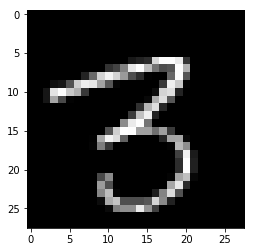

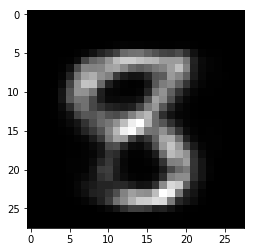

10200 31.46281 21.28769 10.175122
10201 31.46281 21.28769 10.175122
10202 31.46281 21.28769 10.175122
10203 31.46281 21.28769 10.175122
10204 31.46281 21.28769 10.175122
10205 31.46281 21.28769 10.175122
10206 31.46281 21.28769 10.175122
10207 31.46281 21.28769 10.175122
10208 31.46281 21.28769 10.175122
10209 31.46281 21.28769 10.175122
10210 31.46281 21.28769 10.175122
10211 31.46281 21.28769 10.175122
10212 31.46281 21.28769 10.175122
10213 31.46281 21.28769 10.175122
10214 31.46281 21.28769 10.175122
10215 31.46281 21.28769 10.175122
10216 31.46281 21.28769 10.175122
10217 31.46281 21.28769 10.175122
10218 31.46281 21.28769 10.175122
10219 31.46281 21.28769 10.175122
10220 31.46281 21.28769 10.175122
10221 31.46281 21.28769 10.175122
10222 31.46281 21.28769 10.175122
10223 31.46281 21.28769 10.175122
10224 31.46281 21.28769 10.175122
10225 31.46281 21.28769 10.175122
10226 31.46281 21.28769 10.175122
10227 31.46281 21.28769 10.175122
10228 31.46281 21.28769 10.175122
10229 31.46281

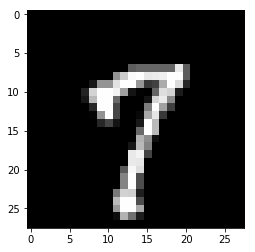

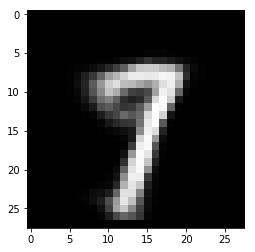

10400 26.69814 17.141445 9.556695
10401 26.69814 17.141445 9.556695
10402 26.69814 17.141445 9.556695
10403 26.69814 17.141445 9.556695
10404 26.69814 17.141445 9.556695
10405 26.69814 17.141445 9.556695
10406 26.69814 17.141445 9.556695
10407 26.69814 17.141445 9.556695
10408 26.69814 17.141445 9.556695
10409 26.69814 17.141445 9.556695
10410 26.69814 17.141445 9.556695
10411 26.69814 17.141445 9.556695
10412 26.69814 17.141445 9.556695
10413 26.69814 17.141445 9.556695
10414 26.69814 17.141445 9.556695
10415 26.69814 17.141445 9.556695
10416 26.69814 17.141445 9.556695
10417 26.69814 17.141445 9.556695
10418 26.69814 17.141445 9.556695
10419 26.69814 17.141445 9.556695
10420 26.69814 17.141445 9.556695
10421 26.69814 17.141445 9.556695
10422 26.69814 17.141445 9.556695
10423 26.69814 17.141445 9.556695
10424 26.69814 17.141445 9.556695
10425 26.69814 17.141445 9.556695
10426 26.69814 17.141445 9.556695
10427 26.69814 17.141445 9.556695
10428 26.69814 17.141445 9.556695
10429 26.69814

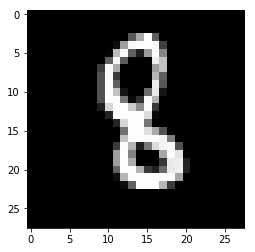

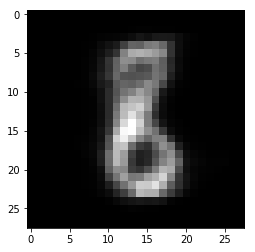

10600 36.395164 27.019188 9.375975
10601 36.395164 27.019188 9.375975
10602 36.395164 27.019188 9.375975
10603 36.395164 27.019188 9.375975
10604 36.395164 27.019188 9.375975
10605 36.395164 27.019188 9.375975
10606 36.395164 27.019188 9.375975
10607 36.395164 27.019188 9.375975
10608 36.395164 27.019188 9.375975
10609 36.395164 27.019188 9.375975
10610 36.395164 27.019188 9.375975
10611 36.395164 27.019188 9.375975
10612 36.395164 27.019188 9.375975
10613 36.395164 27.019188 9.375975
10614 36.395164 27.019188 9.375975
10615 36.395164 27.019188 9.375975
10616 36.395164 27.019188 9.375975
10617 36.395164 27.019188 9.375975
10618 36.395164 27.019188 9.375975
10619 36.395164 27.019188 9.375975
10620 36.395164 27.019188 9.375975
10621 36.395164 27.019188 9.375975
10622 36.395164 27.019188 9.375975
10623 36.395164 27.019188 9.375975
10624 36.395164 27.019188 9.375975
10625 36.395164 27.019188 9.375975
10626 36.395164 27.019188 9.375975
10627 36.395164 27.019188 9.375975
10628 36.395164 27.0

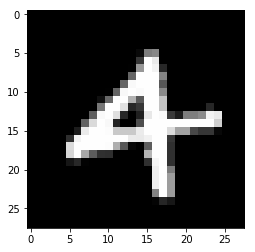

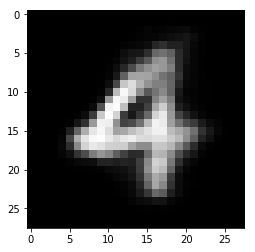

10800 34.92012 25.060741 9.859381
10801 34.92012 25.060741 9.859381
10802 34.92012 25.060741 9.859381
10803 34.92012 25.060741 9.859381
10804 34.92012 25.060741 9.859381
10805 34.92012 25.060741 9.859381
10806 34.92012 25.060741 9.859381
10807 34.92012 25.060741 9.859381
10808 34.92012 25.060741 9.859381
10809 34.92012 25.060741 9.859381
10810 34.92012 25.060741 9.859381
10811 34.92012 25.060741 9.859381
10812 34.92012 25.060741 9.859381
10813 34.92012 25.060741 9.859381
10814 34.92012 25.060741 9.859381
10815 34.92012 25.060741 9.859381
10816 34.92012 25.060741 9.859381
10817 34.92012 25.060741 9.859381
10818 34.92012 25.060741 9.859381
10819 34.92012 25.060741 9.859381
10820 34.92012 25.060741 9.859381
10821 34.92012 25.060741 9.859381
10822 34.92012 25.060741 9.859381
10823 34.92012 25.060741 9.859381
10824 34.92012 25.060741 9.859381
10825 34.92012 25.060741 9.859381
10826 34.92012 25.060741 9.859381
10827 34.92012 25.060741 9.859381
10828 34.92012 25.060741 9.859381
10829 34.92012

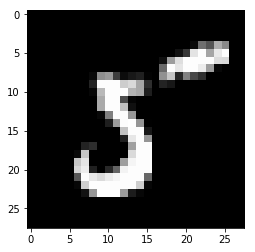

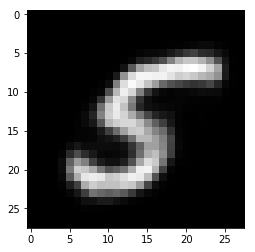

11000 39.510384 29.913685 9.596699
11001 39.510384 29.913685 9.596699
11002 39.510384 29.913685 9.596699
11003 39.510384 29.913685 9.596699
11004 39.510384 29.913685 9.596699
11005 39.510384 29.913685 9.596699
11006 39.510384 29.913685 9.596699
11007 39.510384 29.913685 9.596699
11008 39.510384 29.913685 9.596699
11009 39.510384 29.913685 9.596699
11010 39.510384 29.913685 9.596699
11011 39.510384 29.913685 9.596699
11012 39.510384 29.913685 9.596699
11013 39.510384 29.913685 9.596699
11014 39.510384 29.913685 9.596699
11015 39.510384 29.913685 9.596699
11016 39.510384 29.913685 9.596699
11017 39.510384 29.913685 9.596699
11018 39.510384 29.913685 9.596699
11019 39.510384 29.913685 9.596699
11020 39.510384 29.913685 9.596699
11021 39.510384 29.913685 9.596699
11022 39.510384 29.913685 9.596699
11023 39.510384 29.913685 9.596699
11024 39.510384 29.913685 9.596699
11025 39.510384 29.913685 9.596699
11026 39.510384 29.913685 9.596699
11027 39.510384 29.913685 9.596699
11028 39.510384 29.9

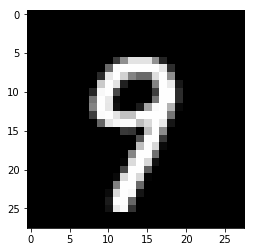

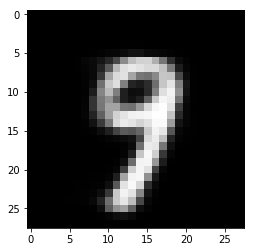

11200 31.400967 20.963495 10.437471
11201 31.400967 20.963495 10.437471
11202 31.400967 20.963495 10.437471
11203 31.400967 20.963495 10.437471
11204 31.400967 20.963495 10.437471
11205 31.400967 20.963495 10.437471
11206 31.400967 20.963495 10.437471
11207 31.400967 20.963495 10.437471
11208 31.400967 20.963495 10.437471
11209 31.400967 20.963495 10.437471
11210 31.400967 20.963495 10.437471
11211 31.400967 20.963495 10.437471
11212 31.400967 20.963495 10.437471
11213 31.400967 20.963495 10.437471
11214 31.400967 20.963495 10.437471
11215 31.400967 20.963495 10.437471
11216 31.400967 20.963495 10.437471
11217 31.400967 20.963495 10.437471
11218 31.400967 20.963495 10.437471
11219 31.400967 20.963495 10.437471
11220 31.400967 20.963495 10.437471
11221 31.400967 20.963495 10.437471
11222 31.400967 20.963495 10.437471
11223 31.400967 20.963495 10.437471
11224 31.400967 20.963495 10.437471
11225 31.400967 20.963495 10.437471
11226 31.400967 20.963495 10.437471
11227 31.400967 20.963495 10

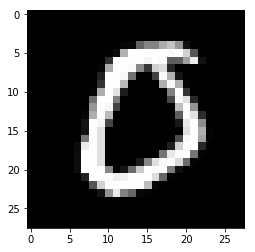

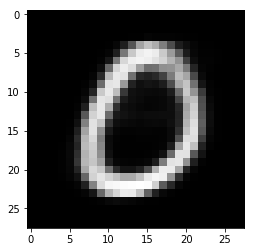

11400 26.662313 16.422775 10.239538
11401 26.662313 16.422775 10.239538
11402 26.662313 16.422775 10.239538
11403 26.662313 16.422775 10.239538
11404 26.662313 16.422775 10.239538
11405 26.662313 16.422775 10.239538
11406 26.662313 16.422775 10.239538
11407 26.662313 16.422775 10.239538
11408 26.662313 16.422775 10.239538
11409 26.662313 16.422775 10.239538
11410 26.662313 16.422775 10.239538
11411 26.662313 16.422775 10.239538
11412 26.662313 16.422775 10.239538
11413 26.662313 16.422775 10.239538
11414 26.662313 16.422775 10.239538
11415 26.662313 16.422775 10.239538
11416 26.662313 16.422775 10.239538
11417 26.662313 16.422775 10.239538
11418 26.662313 16.422775 10.239538
11419 26.662313 16.422775 10.239538
11420 26.662313 16.422775 10.239538
11421 26.662313 16.422775 10.239538
11422 26.662313 16.422775 10.239538
11423 26.662313 16.422775 10.239538
11424 26.662313 16.422775 10.239538
11425 26.662313 16.422775 10.239538
11426 26.662313 16.422775 10.239538
11427 26.662313 16.422775 10

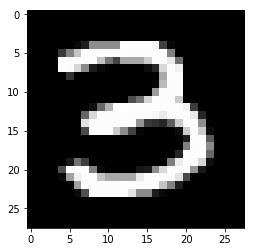

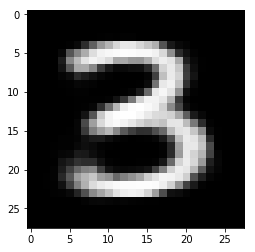

11600 34.763565 23.83674 10.926825
11601 34.763565 23.83674 10.926825
11602 34.763565 23.83674 10.926825
11603 34.763565 23.83674 10.926825
11604 34.763565 23.83674 10.926825
11605 34.763565 23.83674 10.926825
11606 34.763565 23.83674 10.926825
11607 34.763565 23.83674 10.926825
11608 34.763565 23.83674 10.926825
11609 34.763565 23.83674 10.926825
11610 34.763565 23.83674 10.926825
11611 34.763565 23.83674 10.926825
11612 34.763565 23.83674 10.926825
11613 34.763565 23.83674 10.926825
11614 34.763565 23.83674 10.926825
11615 34.763565 23.83674 10.926825
11616 34.763565 23.83674 10.926825
11617 34.763565 23.83674 10.926825
11618 34.763565 23.83674 10.926825
11619 34.763565 23.83674 10.926825
11620 34.763565 23.83674 10.926825
11621 34.763565 23.83674 10.926825
11622 34.763565 23.83674 10.926825
11623 34.763565 23.83674 10.926825
11624 34.763565 23.83674 10.926825
11625 34.763565 23.83674 10.926825
11626 34.763565 23.83674 10.926825
11627 34.763565 23.83674 10.926825
11628 34.763565 23.8

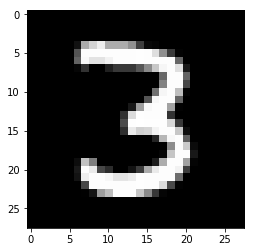

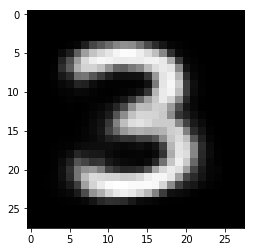

11800 31.715183 21.013222 10.7019615
11801 31.715183 21.013222 10.7019615
11802 31.715183 21.013222 10.7019615
11803 31.715183 21.013222 10.7019615
11804 31.715183 21.013222 10.7019615
11805 31.715183 21.013222 10.7019615
11806 31.715183 21.013222 10.7019615
11807 31.715183 21.013222 10.7019615
11808 31.715183 21.013222 10.7019615
11809 31.715183 21.013222 10.7019615
11810 31.715183 21.013222 10.7019615
11811 31.715183 21.013222 10.7019615
11812 31.715183 21.013222 10.7019615
11813 31.715183 21.013222 10.7019615
11814 31.715183 21.013222 10.7019615
11815 31.715183 21.013222 10.7019615
11816 31.715183 21.013222 10.7019615
11817 31.715183 21.013222 10.7019615
11818 31.715183 21.013222 10.7019615
11819 31.715183 21.013222 10.7019615
11820 31.715183 21.013222 10.7019615
11821 31.715183 21.013222 10.7019615
11822 31.715183 21.013222 10.7019615
11823 31.715183 21.013222 10.7019615
11824 31.715183 21.013222 10.7019615
11825 31.715183 21.013222 10.7019615
11826 31.715183 21.013222 10.7019615
1

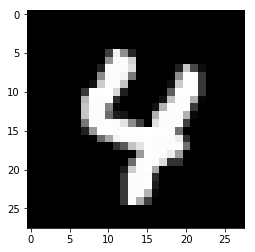

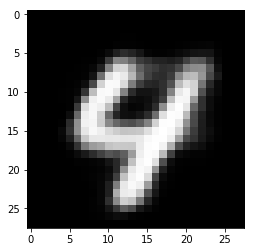

12000 31.198315 20.988718 10.209598
12001 31.198315 20.988718 10.209598
12002 31.198315 20.988718 10.209598
12003 31.198315 20.988718 10.209598
12004 31.198315 20.988718 10.209598
12005 31.198315 20.988718 10.209598
12006 31.198315 20.988718 10.209598
12007 31.198315 20.988718 10.209598
12008 31.198315 20.988718 10.209598
12009 31.198315 20.988718 10.209598
12010 31.198315 20.988718 10.209598
12011 31.198315 20.988718 10.209598
12012 31.198315 20.988718 10.209598
12013 31.198315 20.988718 10.209598
12014 31.198315 20.988718 10.209598
12015 31.198315 20.988718 10.209598
12016 31.198315 20.988718 10.209598
12017 31.198315 20.988718 10.209598
12018 31.198315 20.988718 10.209598
12019 31.198315 20.988718 10.209598
12020 31.198315 20.988718 10.209598
12021 31.198315 20.988718 10.209598
12022 31.198315 20.988718 10.209598
12023 31.198315 20.988718 10.209598
12024 31.198315 20.988718 10.209598
12025 31.198315 20.988718 10.209598
12026 31.198315 20.988718 10.209598
12027 31.198315 20.988718 10

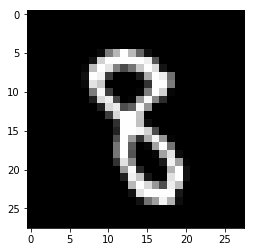

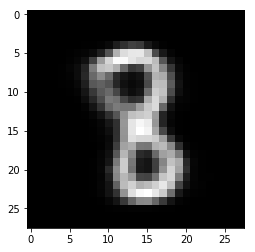

12200 30.21158 20.472061 9.739521
12201 30.21158 20.472061 9.739521
12202 30.21158 20.472061 9.739521
12203 30.21158 20.472061 9.739521
12204 30.21158 20.472061 9.739521
12205 30.21158 20.472061 9.739521
12206 30.21158 20.472061 9.739521
12207 30.21158 20.472061 9.739521
12208 30.21158 20.472061 9.739521
12209 30.21158 20.472061 9.739521
12210 30.21158 20.472061 9.739521
12211 30.21158 20.472061 9.739521
12212 30.21158 20.472061 9.739521
12213 30.21158 20.472061 9.739521
12214 30.21158 20.472061 9.739521
12215 30.21158 20.472061 9.739521
12216 30.21158 20.472061 9.739521
12217 30.21158 20.472061 9.739521
12218 30.21158 20.472061 9.739521
12219 30.21158 20.472061 9.739521
12220 30.21158 20.472061 9.739521
12221 30.21158 20.472061 9.739521
12222 30.21158 20.472061 9.739521
12223 30.21158 20.472061 9.739521
12224 30.21158 20.472061 9.739521
12225 30.21158 20.472061 9.739521
12226 30.21158 20.472061 9.739521
12227 30.21158 20.472061 9.739521
12228 30.21158 20.472061 9.739521
12229 30.21158

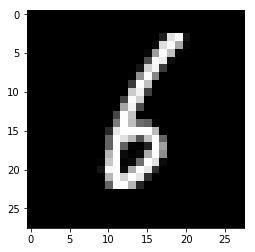

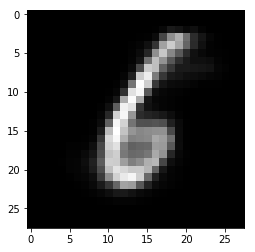

12400 27.9967 17.408442 10.588259
12401 27.9967 17.408442 10.588259
12402 27.9967 17.408442 10.588259
12403 27.9967 17.408442 10.588259
12404 27.9967 17.408442 10.588259
12405 27.9967 17.408442 10.588259
12406 27.9967 17.408442 10.588259
12407 27.9967 17.408442 10.588259
12408 27.9967 17.408442 10.588259
12409 27.9967 17.408442 10.588259
12410 27.9967 17.408442 10.588259
12411 27.9967 17.408442 10.588259
12412 27.9967 17.408442 10.588259
12413 27.9967 17.408442 10.588259
12414 27.9967 17.408442 10.588259
12415 27.9967 17.408442 10.588259
12416 27.9967 17.408442 10.588259
12417 27.9967 17.408442 10.588259
12418 27.9967 17.408442 10.588259
12419 27.9967 17.408442 10.588259
12420 27.9967 17.408442 10.588259
12421 27.9967 17.408442 10.588259
12422 27.9967 17.408442 10.588259
12423 27.9967 17.408442 10.588259
12424 27.9967 17.408442 10.588259
12425 27.9967 17.408442 10.588259
12426 27.9967 17.408442 10.588259
12427 27.9967 17.408442 10.588259
12428 27.9967 17.408442 10.588259
12429 27.9967 

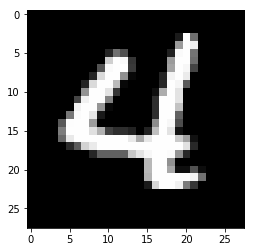

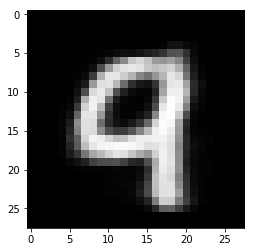

12600 25.992981 15.667455 10.325527
12601 25.992981 15.667455 10.325527
12602 25.992981 15.667455 10.325527
12603 25.992981 15.667455 10.325527
12604 25.992981 15.667455 10.325527
12605 25.992981 15.667455 10.325527
12606 25.992981 15.667455 10.325527
12607 25.992981 15.667455 10.325527
12608 25.992981 15.667455 10.325527
12609 25.992981 15.667455 10.325527
12610 25.992981 15.667455 10.325527
12611 25.992981 15.667455 10.325527
12612 25.992981 15.667455 10.325527
12613 25.992981 15.667455 10.325527
12614 25.992981 15.667455 10.325527
12615 25.992981 15.667455 10.325527
12616 25.992981 15.667455 10.325527
12617 25.992981 15.667455 10.325527
12618 25.992981 15.667455 10.325527
12619 25.992981 15.667455 10.325527
12620 25.992981 15.667455 10.325527
12621 25.992981 15.667455 10.325527
12622 25.992981 15.667455 10.325527
12623 25.992981 15.667455 10.325527
12624 25.992981 15.667455 10.325527
12625 25.992981 15.667455 10.325527
12626 25.992981 15.667455 10.325527
12627 25.992981 15.667455 10

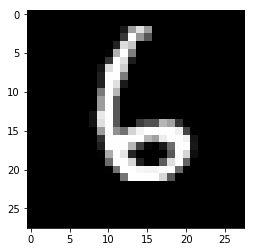

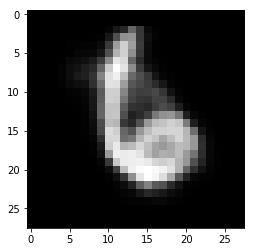

12800 29.222267 19.666304 9.555963
12801 29.222267 19.666304 9.555963
12802 29.222267 19.666304 9.555963
12803 29.222267 19.666304 9.555963
12804 29.222267 19.666304 9.555963
12805 29.222267 19.666304 9.555963
12806 29.222267 19.666304 9.555963
12807 29.222267 19.666304 9.555963
12808 29.222267 19.666304 9.555963
12809 29.222267 19.666304 9.555963
12810 29.222267 19.666304 9.555963
12811 29.222267 19.666304 9.555963
12812 29.222267 19.666304 9.555963
12813 29.222267 19.666304 9.555963
12814 29.222267 19.666304 9.555963
12815 29.222267 19.666304 9.555963
12816 29.222267 19.666304 9.555963
12817 29.222267 19.666304 9.555963
12818 29.222267 19.666304 9.555963
12819 29.222267 19.666304 9.555963
12820 29.222267 19.666304 9.555963
12821 29.222267 19.666304 9.555963
12822 29.222267 19.666304 9.555963
12823 29.222267 19.666304 9.555963
12824 29.222267 19.666304 9.555963
12825 29.222267 19.666304 9.555963
12826 29.222267 19.666304 9.555963
12827 29.222267 19.666304 9.555963
12828 29.222267 19.6

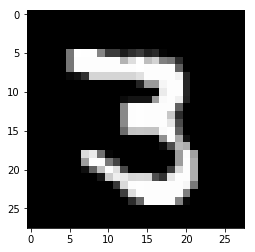

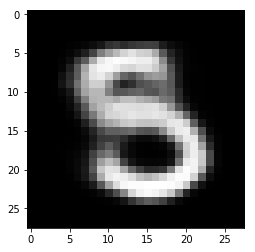

13000 31.743925 22.62717 9.116753
13001 31.743925 22.62717 9.116753
13002 31.743925 22.62717 9.116753
13003 31.743925 22.62717 9.116753
13004 31.743925 22.62717 9.116753
13005 31.743925 22.62717 9.116753
13006 31.743925 22.62717 9.116753
13007 31.743925 22.62717 9.116753
13008 31.743925 22.62717 9.116753
13009 31.743925 22.62717 9.116753
13010 31.743925 22.62717 9.116753
13011 31.743925 22.62717 9.116753
13012 31.743925 22.62717 9.116753
13013 31.743925 22.62717 9.116753
13014 31.743925 22.62717 9.116753
13015 31.743925 22.62717 9.116753
13016 31.743925 22.62717 9.116753
13017 31.743925 22.62717 9.116753
13018 31.743925 22.62717 9.116753
13019 31.743925 22.62717 9.116753
13020 31.743925 22.62717 9.116753
13021 31.743925 22.62717 9.116753
13022 31.743925 22.62717 9.116753
13023 31.743925 22.62717 9.116753
13024 31.743925 22.62717 9.116753
13025 31.743925 22.62717 9.116753
13026 31.743925 22.62717 9.116753
13027 31.743925 22.62717 9.116753
13028 31.743925 22.62717 9.116753
13029 31.74392

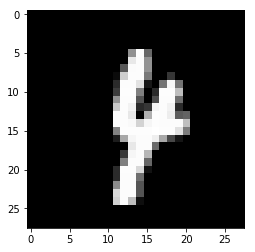

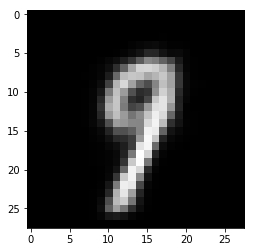

13200 34.460033 25.438238 9.021798
13201 34.460033 25.438238 9.021798
13202 34.460033 25.438238 9.021798
13203 34.460033 25.438238 9.021798
13204 34.460033 25.438238 9.021798
13205 34.460033 25.438238 9.021798
13206 34.460033 25.438238 9.021798
13207 34.460033 25.438238 9.021798
13208 34.460033 25.438238 9.021798
13209 34.460033 25.438238 9.021798
13210 34.460033 25.438238 9.021798
13211 34.460033 25.438238 9.021798
13212 34.460033 25.438238 9.021798
13213 34.460033 25.438238 9.021798
13214 34.460033 25.438238 9.021798
13215 34.460033 25.438238 9.021798
13216 34.460033 25.438238 9.021798
13217 34.460033 25.438238 9.021798
13218 34.460033 25.438238 9.021798
13219 34.460033 25.438238 9.021798
13220 34.460033 25.438238 9.021798
13221 34.460033 25.438238 9.021798
13222 34.460033 25.438238 9.021798
13223 34.460033 25.438238 9.021798
13224 34.460033 25.438238 9.021798
13225 34.460033 25.438238 9.021798
13226 34.460033 25.438238 9.021798
13227 34.460033 25.438238 9.021798
13228 34.460033 25.4

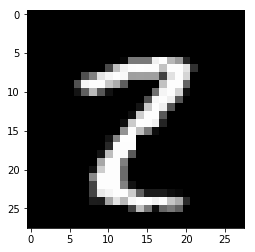

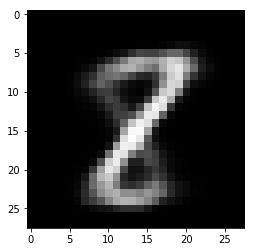

13400 37.703495 27.262665 10.44083
13401 37.703495 27.262665 10.44083
13402 37.703495 27.262665 10.44083
13403 37.703495 27.262665 10.44083
13404 37.703495 27.262665 10.44083
13405 37.703495 27.262665 10.44083
13406 37.703495 27.262665 10.44083
13407 37.703495 27.262665 10.44083
13408 37.703495 27.262665 10.44083
13409 37.703495 27.262665 10.44083
13410 37.703495 27.262665 10.44083
13411 37.703495 27.262665 10.44083
13412 37.703495 27.262665 10.44083
13413 37.703495 27.262665 10.44083
13414 37.703495 27.262665 10.44083
13415 37.703495 27.262665 10.44083
13416 37.703495 27.262665 10.44083
13417 37.703495 27.262665 10.44083
13418 37.703495 27.262665 10.44083
13419 37.703495 27.262665 10.44083
13420 37.703495 27.262665 10.44083
13421 37.703495 27.262665 10.44083
13422 37.703495 27.262665 10.44083
13423 37.703495 27.262665 10.44083
13424 37.703495 27.262665 10.44083
13425 37.703495 27.262665 10.44083
13426 37.703495 27.262665 10.44083
13427 37.703495 27.262665 10.44083
13428 37.703495 27.2

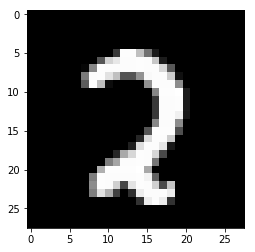

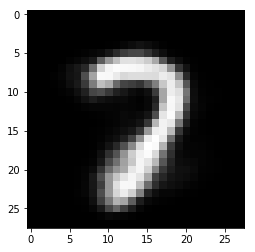

13600 28.12827 18.529951 9.598318
13601 28.12827 18.529951 9.598318
13602 28.12827 18.529951 9.598318
13603 28.12827 18.529951 9.598318
13604 28.12827 18.529951 9.598318
13605 28.12827 18.529951 9.598318
13606 28.12827 18.529951 9.598318
13607 28.12827 18.529951 9.598318
13608 28.12827 18.529951 9.598318
13609 28.12827 18.529951 9.598318
13610 28.12827 18.529951 9.598318
13611 28.12827 18.529951 9.598318
13612 28.12827 18.529951 9.598318
13613 28.12827 18.529951 9.598318
13614 28.12827 18.529951 9.598318
13615 28.12827 18.529951 9.598318
13616 28.12827 18.529951 9.598318
13617 28.12827 18.529951 9.598318
13618 28.12827 18.529951 9.598318
13619 28.12827 18.529951 9.598318
13620 28.12827 18.529951 9.598318
13621 28.12827 18.529951 9.598318
13622 28.12827 18.529951 9.598318
13623 28.12827 18.529951 9.598318
13624 28.12827 18.529951 9.598318
13625 28.12827 18.529951 9.598318
13626 28.12827 18.529951 9.598318
13627 28.12827 18.529951 9.598318
13628 28.12827 18.529951 9.598318
13629 28.12827

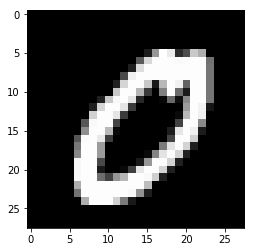

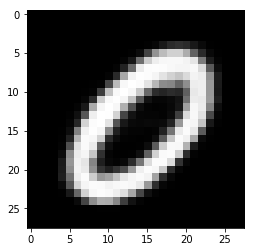

13800 30.812447 21.444038 9.368408
13801 30.812447 21.444038 9.368408
13802 30.812447 21.444038 9.368408
13803 30.812447 21.444038 9.368408
13804 30.812447 21.444038 9.368408
13805 30.812447 21.444038 9.368408
13806 30.812447 21.444038 9.368408
13807 30.812447 21.444038 9.368408
13808 30.812447 21.444038 9.368408
13809 30.812447 21.444038 9.368408
13810 30.812447 21.444038 9.368408
13811 30.812447 21.444038 9.368408
13812 30.812447 21.444038 9.368408
13813 30.812447 21.444038 9.368408
13814 30.812447 21.444038 9.368408
13815 30.812447 21.444038 9.368408
13816 30.812447 21.444038 9.368408
13817 30.812447 21.444038 9.368408
13818 30.812447 21.444038 9.368408
13819 30.812447 21.444038 9.368408
13820 30.812447 21.444038 9.368408
13821 30.812447 21.444038 9.368408
13822 30.812447 21.444038 9.368408
13823 30.812447 21.444038 9.368408
13824 30.812447 21.444038 9.368408
13825 30.812447 21.444038 9.368408
13826 30.812447 21.444038 9.368408
13827 30.812447 21.444038 9.368408
13828 30.812447 21.4

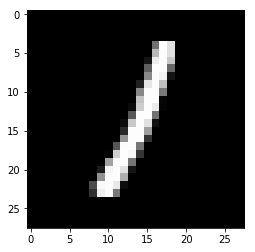

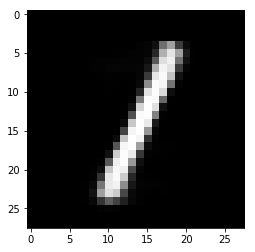

14000 27.888475 17.580893 10.307583
14001 27.888475 17.580893 10.307583
14002 27.888475 17.580893 10.307583
14003 27.888475 17.580893 10.307583
14004 27.888475 17.580893 10.307583
14005 27.888475 17.580893 10.307583
14006 27.888475 17.580893 10.307583
14007 27.888475 17.580893 10.307583
14008 27.888475 17.580893 10.307583
14009 27.888475 17.580893 10.307583
14010 27.888475 17.580893 10.307583
14011 27.888475 17.580893 10.307583
14012 27.888475 17.580893 10.307583
14013 27.888475 17.580893 10.307583
14014 27.888475 17.580893 10.307583
14015 27.888475 17.580893 10.307583
14016 27.888475 17.580893 10.307583
14017 27.888475 17.580893 10.307583
14018 27.888475 17.580893 10.307583
14019 27.888475 17.580893 10.307583
14020 27.888475 17.580893 10.307583
14021 27.888475 17.580893 10.307583
14022 27.888475 17.580893 10.307583
14023 27.888475 17.580893 10.307583
14024 27.888475 17.580893 10.307583
14025 27.888475 17.580893 10.307583
14026 27.888475 17.580893 10.307583
14027 27.888475 17.580893 10

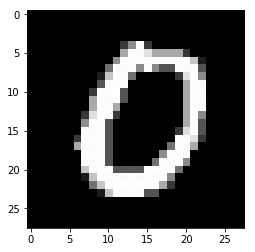

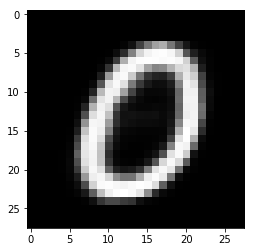

14200 26.907204 17.097654 9.809549
14201 26.907204 17.097654 9.809549
14202 26.907204 17.097654 9.809549
14203 26.907204 17.097654 9.809549
14204 26.907204 17.097654 9.809549
14205 26.907204 17.097654 9.809549
14206 26.907204 17.097654 9.809549
14207 26.907204 17.097654 9.809549
14208 26.907204 17.097654 9.809549
14209 26.907204 17.097654 9.809549
14210 26.907204 17.097654 9.809549
14211 26.907204 17.097654 9.809549
14212 26.907204 17.097654 9.809549
14213 26.907204 17.097654 9.809549
14214 26.907204 17.097654 9.809549
14215 26.907204 17.097654 9.809549
14216 26.907204 17.097654 9.809549
14217 26.907204 17.097654 9.809549
14218 26.907204 17.097654 9.809549
14219 26.907204 17.097654 9.809549
14220 26.907204 17.097654 9.809549
14221 26.907204 17.097654 9.809549
14222 26.907204 17.097654 9.809549
14223 26.907204 17.097654 9.809549
14224 26.907204 17.097654 9.809549
14225 26.907204 17.097654 9.809549
14226 26.907204 17.097654 9.809549
14227 26.907204 17.097654 9.809549
14228 26.907204 17.0

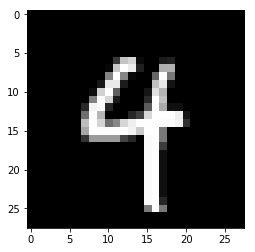

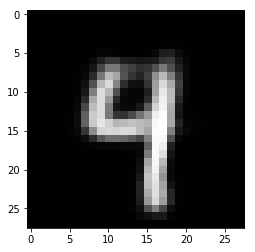

14400 32.89125 22.700111 10.19114
14401 32.89125 22.700111 10.19114
14402 32.89125 22.700111 10.19114
14403 32.89125 22.700111 10.19114
14404 32.89125 22.700111 10.19114
14405 32.89125 22.700111 10.19114
14406 32.89125 22.700111 10.19114
14407 32.89125 22.700111 10.19114
14408 32.89125 22.700111 10.19114
14409 32.89125 22.700111 10.19114
14410 32.89125 22.700111 10.19114
14411 32.89125 22.700111 10.19114
14412 32.89125 22.700111 10.19114
14413 32.89125 22.700111 10.19114
14414 32.89125 22.700111 10.19114
14415 32.89125 22.700111 10.19114
14416 32.89125 22.700111 10.19114
14417 32.89125 22.700111 10.19114
14418 32.89125 22.700111 10.19114
14419 32.89125 22.700111 10.19114
14420 32.89125 22.700111 10.19114
14421 32.89125 22.700111 10.19114
14422 32.89125 22.700111 10.19114
14423 32.89125 22.700111 10.19114
14424 32.89125 22.700111 10.19114
14425 32.89125 22.700111 10.19114
14426 32.89125 22.700111 10.19114
14427 32.89125 22.700111 10.19114
14428 32.89125 22.700111 10.19114
14429 32.89125

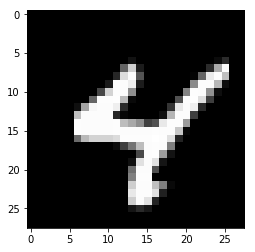

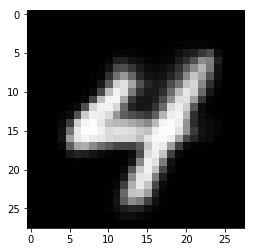

14600 30.451233 20.900646 9.550586
14601 30.451233 20.900646 9.550586
14602 30.451233 20.900646 9.550586
14603 30.451233 20.900646 9.550586
14604 30.451233 20.900646 9.550586
14605 30.451233 20.900646 9.550586
14606 30.451233 20.900646 9.550586
14607 30.451233 20.900646 9.550586
14608 30.451233 20.900646 9.550586
14609 30.451233 20.900646 9.550586
14610 30.451233 20.900646 9.550586
14611 30.451233 20.900646 9.550586
14612 30.451233 20.900646 9.550586
14613 30.451233 20.900646 9.550586
14614 30.451233 20.900646 9.550586
14615 30.451233 20.900646 9.550586
14616 30.451233 20.900646 9.550586
14617 30.451233 20.900646 9.550586
14618 30.451233 20.900646 9.550586
14619 30.451233 20.900646 9.550586
14620 30.451233 20.900646 9.550586
14621 30.451233 20.900646 9.550586
14622 30.451233 20.900646 9.550586
14623 30.451233 20.900646 9.550586
14624 30.451233 20.900646 9.550586
14625 30.451233 20.900646 9.550586
14626 30.451233 20.900646 9.550586
14627 30.451233 20.900646 9.550586
14628 30.451233 20.9

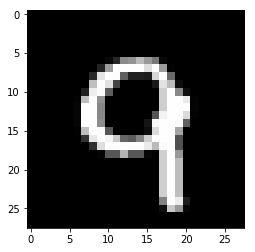

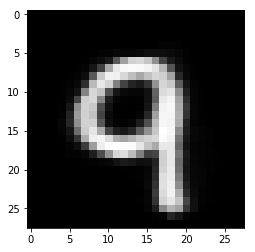

14800 27.393772 18.778835 8.614937
14801 27.393772 18.778835 8.614937
14802 27.393772 18.778835 8.614937
14803 27.393772 18.778835 8.614937
14804 27.393772 18.778835 8.614937
14805 27.393772 18.778835 8.614937
14806 27.393772 18.778835 8.614937
14807 27.393772 18.778835 8.614937
14808 27.393772 18.778835 8.614937
14809 27.393772 18.778835 8.614937
14810 27.393772 18.778835 8.614937
14811 27.393772 18.778835 8.614937
14812 27.393772 18.778835 8.614937
14813 27.393772 18.778835 8.614937
14814 27.393772 18.778835 8.614937
14815 27.393772 18.778835 8.614937
14816 27.393772 18.778835 8.614937
14817 27.393772 18.778835 8.614937
14818 27.393772 18.778835 8.614937
14819 27.393772 18.778835 8.614937
14820 27.393772 18.778835 8.614937
14821 27.393772 18.778835 8.614937
14822 27.393772 18.778835 8.614937
14823 27.393772 18.778835 8.614937
14824 27.393772 18.778835 8.614937
14825 27.393772 18.778835 8.614937
14826 27.393772 18.778835 8.614937
14827 27.393772 18.778835 8.614937
14828 27.393772 18.7

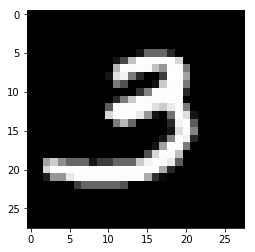

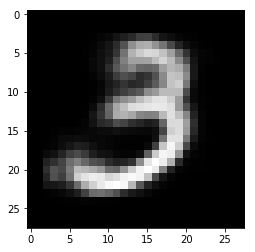

15000 30.251791 20.456728 9.795063
15001 30.251791 20.456728 9.795063
15002 30.251791 20.456728 9.795063
15003 30.251791 20.456728 9.795063
15004 30.251791 20.456728 9.795063
15005 30.251791 20.456728 9.795063
15006 30.251791 20.456728 9.795063
15007 30.251791 20.456728 9.795063
15008 30.251791 20.456728 9.795063
15009 30.251791 20.456728 9.795063
15010 30.251791 20.456728 9.795063
15011 30.251791 20.456728 9.795063
15012 30.251791 20.456728 9.795063
15013 30.251791 20.456728 9.795063
15014 30.251791 20.456728 9.795063
15015 30.251791 20.456728 9.795063
15016 30.251791 20.456728 9.795063
15017 30.251791 20.456728 9.795063
15018 30.251791 20.456728 9.795063
15019 30.251791 20.456728 9.795063
15020 30.251791 20.456728 9.795063
15021 30.251791 20.456728 9.795063
15022 30.251791 20.456728 9.795063
15023 30.251791 20.456728 9.795063
15024 30.251791 20.456728 9.795063
15025 30.251791 20.456728 9.795063
15026 30.251791 20.456728 9.795063
15027 30.251791 20.456728 9.795063
15028 30.251791 20.4

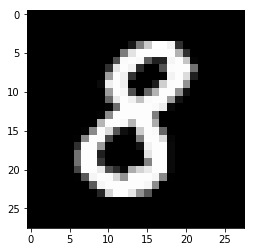

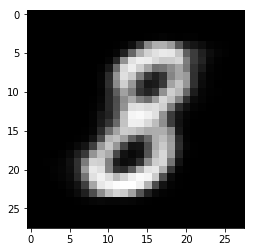

15200 28.605469 20.283916 8.321552
15201 28.605469 20.283916 8.321552
15202 28.605469 20.283916 8.321552
15203 28.605469 20.283916 8.321552
15204 28.605469 20.283916 8.321552
15205 28.605469 20.283916 8.321552
15206 28.605469 20.283916 8.321552
15207 28.605469 20.283916 8.321552
15208 28.605469 20.283916 8.321552
15209 28.605469 20.283916 8.321552
15210 28.605469 20.283916 8.321552
15211 28.605469 20.283916 8.321552
15212 28.605469 20.283916 8.321552
15213 28.605469 20.283916 8.321552
15214 28.605469 20.283916 8.321552
15215 28.605469 20.283916 8.321552
15216 28.605469 20.283916 8.321552
15217 28.605469 20.283916 8.321552
15218 28.605469 20.283916 8.321552
15219 28.605469 20.283916 8.321552
15220 28.605469 20.283916 8.321552
15221 28.605469 20.283916 8.321552
15222 28.605469 20.283916 8.321552
15223 28.605469 20.283916 8.321552
15224 28.605469 20.283916 8.321552
15225 28.605469 20.283916 8.321552
15226 28.605469 20.283916 8.321552
15227 28.605469 20.283916 8.321552
15228 28.605469 20.2

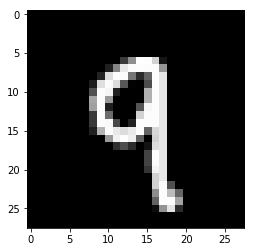

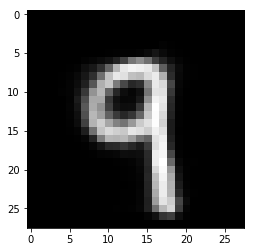

15400 27.892073 17.389719 10.502354
15401 27.892073 17.389719 10.502354
15402 27.892073 17.389719 10.502354
15403 27.892073 17.389719 10.502354
15404 27.892073 17.389719 10.502354
15405 27.892073 17.389719 10.502354
15406 27.892073 17.389719 10.502354
15407 27.892073 17.389719 10.502354
15408 27.892073 17.389719 10.502354
15409 27.892073 17.389719 10.502354
15410 27.892073 17.389719 10.502354
15411 27.892073 17.389719 10.502354
15412 27.892073 17.389719 10.502354
15413 27.892073 17.389719 10.502354
15414 27.892073 17.389719 10.502354
15415 27.892073 17.389719 10.502354
15416 27.892073 17.389719 10.502354
15417 27.892073 17.389719 10.502354
15418 27.892073 17.389719 10.502354
15419 27.892073 17.389719 10.502354
15420 27.892073 17.389719 10.502354
15421 27.892073 17.389719 10.502354
15422 27.892073 17.389719 10.502354
15423 27.892073 17.389719 10.502354
15424 27.892073 17.389719 10.502354
15425 27.892073 17.389719 10.502354
15426 27.892073 17.389719 10.502354
15427 27.892073 17.389719 10

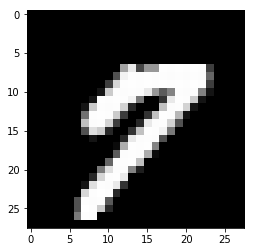

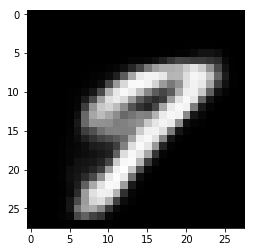

15600 33.156887 22.49645 10.660437
15601 33.156887 22.49645 10.660437
15602 33.156887 22.49645 10.660437
15603 33.156887 22.49645 10.660437
15604 33.156887 22.49645 10.660437
15605 33.156887 22.49645 10.660437
15606 33.156887 22.49645 10.660437
15607 33.156887 22.49645 10.660437
15608 33.156887 22.49645 10.660437
15609 33.156887 22.49645 10.660437
15610 33.156887 22.49645 10.660437
15611 33.156887 22.49645 10.660437
15612 33.156887 22.49645 10.660437
15613 33.156887 22.49645 10.660437
15614 33.156887 22.49645 10.660437
15615 33.156887 22.49645 10.660437
15616 33.156887 22.49645 10.660437
15617 33.156887 22.49645 10.660437
15618 33.156887 22.49645 10.660437
15619 33.156887 22.49645 10.660437
15620 33.156887 22.49645 10.660437
15621 33.156887 22.49645 10.660437
15622 33.156887 22.49645 10.660437
15623 33.156887 22.49645 10.660437
15624 33.156887 22.49645 10.660437
15625 33.156887 22.49645 10.660437
15626 33.156887 22.49645 10.660437
15627 33.156887 22.49645 10.660437
15628 33.156887 22.4

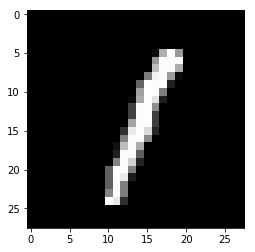

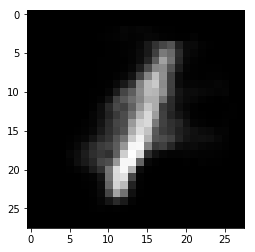

15800 27.145811 16.80997 10.335842
15801 27.145811 16.80997 10.335842
15802 27.145811 16.80997 10.335842
15803 27.145811 16.80997 10.335842
15804 27.145811 16.80997 10.335842
15805 27.145811 16.80997 10.335842
15806 27.145811 16.80997 10.335842
15807 27.145811 16.80997 10.335842
15808 27.145811 16.80997 10.335842
15809 27.145811 16.80997 10.335842
15810 27.145811 16.80997 10.335842
15811 27.145811 16.80997 10.335842
15812 27.145811 16.80997 10.335842
15813 27.145811 16.80997 10.335842
15814 27.145811 16.80997 10.335842
15815 27.145811 16.80997 10.335842
15816 27.145811 16.80997 10.335842
15817 27.145811 16.80997 10.335842
15818 27.145811 16.80997 10.335842
15819 27.145811 16.80997 10.335842
15820 27.145811 16.80997 10.335842
15821 27.145811 16.80997 10.335842
15822 27.145811 16.80997 10.335842
15823 27.145811 16.80997 10.335842
15824 27.145811 16.80997 10.335842
15825 27.145811 16.80997 10.335842
15826 27.145811 16.80997 10.335842
15827 27.145811 16.80997 10.335842
15828 27.145811 16.8

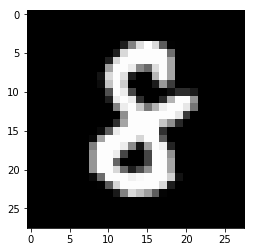

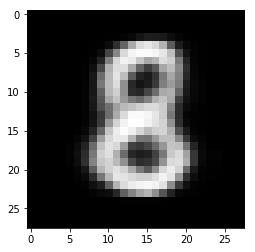

16000 35.152683 24.424234 10.728451
16001 35.152683 24.424234 10.728451
16002 35.152683 24.424234 10.728451
16003 35.152683 24.424234 10.728451
16004 35.152683 24.424234 10.728451
16005 35.152683 24.424234 10.728451
16006 35.152683 24.424234 10.728451
16007 35.152683 24.424234 10.728451
16008 35.152683 24.424234 10.728451
16009 35.152683 24.424234 10.728451
16010 35.152683 24.424234 10.728451
16011 35.152683 24.424234 10.728451
16012 35.152683 24.424234 10.728451
16013 35.152683 24.424234 10.728451
16014 35.152683 24.424234 10.728451
16015 35.152683 24.424234 10.728451
16016 35.152683 24.424234 10.728451
16017 35.152683 24.424234 10.728451
16018 35.152683 24.424234 10.728451
16019 35.152683 24.424234 10.728451
16020 35.152683 24.424234 10.728451
16021 35.152683 24.424234 10.728451
16022 35.152683 24.424234 10.728451
16023 35.152683 24.424234 10.728451
16024 35.152683 24.424234 10.728451
16025 35.152683 24.424234 10.728451
16026 35.152683 24.424234 10.728451
16027 35.152683 24.424234 10

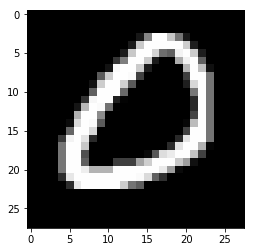

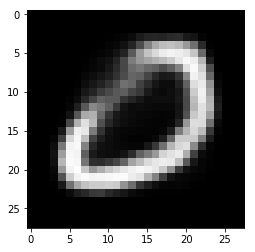

16200 42.80028 31.600676 11.199606
16201 42.80028 31.600676 11.199606
16202 42.80028 31.600676 11.199606
16203 42.80028 31.600676 11.199606
16204 42.80028 31.600676 11.199606
16205 42.80028 31.600676 11.199606
16206 42.80028 31.600676 11.199606
16207 42.80028 31.600676 11.199606
16208 42.80028 31.600676 11.199606
16209 42.80028 31.600676 11.199606
16210 42.80028 31.600676 11.199606
16211 42.80028 31.600676 11.199606
16212 42.80028 31.600676 11.199606
16213 42.80028 31.600676 11.199606
16214 42.80028 31.600676 11.199606
16215 42.80028 31.600676 11.199606
16216 42.80028 31.600676 11.199606
16217 42.80028 31.600676 11.199606
16218 42.80028 31.600676 11.199606
16219 42.80028 31.600676 11.199606
16220 42.80028 31.600676 11.199606
16221 42.80028 31.600676 11.199606
16222 42.80028 31.600676 11.199606
16223 42.80028 31.600676 11.199606
16224 42.80028 31.600676 11.199606
16225 42.80028 31.600676 11.199606
16226 42.80028 31.600676 11.199606
16227 42.80028 31.600676 11.199606
16228 42.80028 31.60

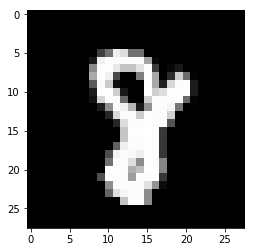

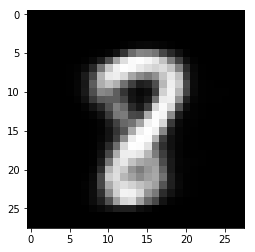

16400 37.05541 27.307041 9.748366
16401 37.05541 27.307041 9.748366
16402 37.05541 27.307041 9.748366
16403 37.05541 27.307041 9.748366
16404 37.05541 27.307041 9.748366
16405 37.05541 27.307041 9.748366
16406 37.05541 27.307041 9.748366
16407 37.05541 27.307041 9.748366
16408 37.05541 27.307041 9.748366
16409 37.05541 27.307041 9.748366
16410 37.05541 27.307041 9.748366
16411 37.05541 27.307041 9.748366
16412 37.05541 27.307041 9.748366
16413 37.05541 27.307041 9.748366
16414 37.05541 27.307041 9.748366
16415 37.05541 27.307041 9.748366
16416 37.05541 27.307041 9.748366
16417 37.05541 27.307041 9.748366
16418 37.05541 27.307041 9.748366
16419 37.05541 27.307041 9.748366
16420 37.05541 27.307041 9.748366
16421 37.05541 27.307041 9.748366
16422 37.05541 27.307041 9.748366
16423 37.05541 27.307041 9.748366
16424 37.05541 27.307041 9.748366
16425 37.05541 27.307041 9.748366
16426 37.05541 27.307041 9.748366
16427 37.05541 27.307041 9.748366
16428 37.05541 27.307041 9.748366
16429 37.05541

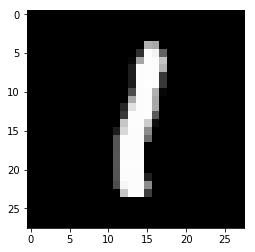

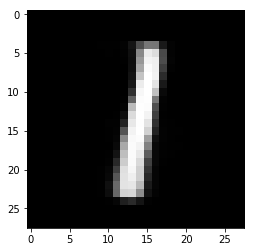

16600 27.07002 17.601452 9.468569
16601 27.07002 17.601452 9.468569
16602 27.07002 17.601452 9.468569
16603 27.07002 17.601452 9.468569
16604 27.07002 17.601452 9.468569
16605 27.07002 17.601452 9.468569
16606 27.07002 17.601452 9.468569
16607 27.07002 17.601452 9.468569
16608 27.07002 17.601452 9.468569
16609 27.07002 17.601452 9.468569
16610 27.07002 17.601452 9.468569
16611 27.07002 17.601452 9.468569
16612 27.07002 17.601452 9.468569
16613 27.07002 17.601452 9.468569
16614 27.07002 17.601452 9.468569
16615 27.07002 17.601452 9.468569
16616 27.07002 17.601452 9.468569
16617 27.07002 17.601452 9.468569
16618 27.07002 17.601452 9.468569
16619 27.07002 17.601452 9.468569
16620 27.07002 17.601452 9.468569
16621 27.07002 17.601452 9.468569
16622 27.07002 17.601452 9.468569
16623 27.07002 17.601452 9.468569
16624 27.07002 17.601452 9.468569
16625 27.07002 17.601452 9.468569
16626 27.07002 17.601452 9.468569
16627 27.07002 17.601452 9.468569
16628 27.07002 17.601452 9.468569
16629 27.07002

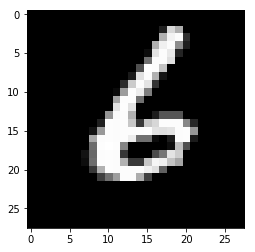

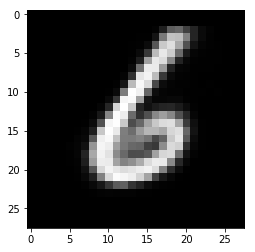

16800 34.10492 22.66174 11.443178
16801 34.10492 22.66174 11.443178
16802 34.10492 22.66174 11.443178
16803 34.10492 22.66174 11.443178
16804 34.10492 22.66174 11.443178
16805 34.10492 22.66174 11.443178
16806 34.10492 22.66174 11.443178
16807 34.10492 22.66174 11.443178
16808 34.10492 22.66174 11.443178
16809 34.10492 22.66174 11.443178
16810 34.10492 22.66174 11.443178
16811 34.10492 22.66174 11.443178
16812 34.10492 22.66174 11.443178
16813 34.10492 22.66174 11.443178
16814 34.10492 22.66174 11.443178
16815 34.10492 22.66174 11.443178
16816 34.10492 22.66174 11.443178
16817 34.10492 22.66174 11.443178
16818 34.10492 22.66174 11.443178
16819 34.10492 22.66174 11.443178
16820 34.10492 22.66174 11.443178
16821 34.10492 22.66174 11.443178
16822 34.10492 22.66174 11.443178
16823 34.10492 22.66174 11.443178
16824 34.10492 22.66174 11.443178
16825 34.10492 22.66174 11.443178
16826 34.10492 22.66174 11.443178
16827 34.10492 22.66174 11.443178
16828 34.10492 22.66174 11.443178
16829 34.10492

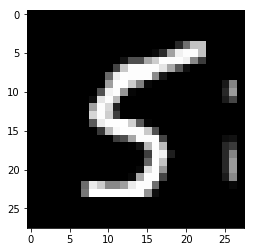

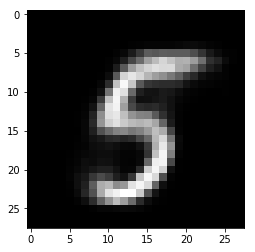

17000 37.37695 28.421421 8.955528
17001 37.37695 28.421421 8.955528
17002 37.37695 28.421421 8.955528
17003 37.37695 28.421421 8.955528
17004 37.37695 28.421421 8.955528
17005 37.37695 28.421421 8.955528
17006 37.37695 28.421421 8.955528
17007 37.37695 28.421421 8.955528
17008 37.37695 28.421421 8.955528
17009 37.37695 28.421421 8.955528
17010 37.37695 28.421421 8.955528
17011 37.37695 28.421421 8.955528
17012 37.37695 28.421421 8.955528
17013 37.37695 28.421421 8.955528
17014 37.37695 28.421421 8.955528
17015 37.37695 28.421421 8.955528
17016 37.37695 28.421421 8.955528
17017 37.37695 28.421421 8.955528
17018 37.37695 28.421421 8.955528
17019 37.37695 28.421421 8.955528
17020 37.37695 28.421421 8.955528
17021 37.37695 28.421421 8.955528
17022 37.37695 28.421421 8.955528
17023 37.37695 28.421421 8.955528
17024 37.37695 28.421421 8.955528
17025 37.37695 28.421421 8.955528
17026 37.37695 28.421421 8.955528
17027 37.37695 28.421421 8.955528
17028 37.37695 28.421421 8.955528
17029 37.37695

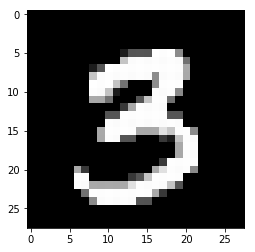

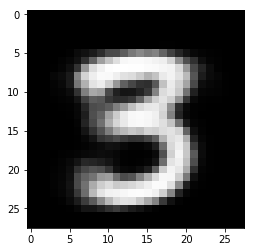

17200 32.25202 22.913929 9.338094
17201 32.25202 22.913929 9.338094
17202 32.25202 22.913929 9.338094
17203 32.25202 22.913929 9.338094
17204 32.25202 22.913929 9.338094
17205 32.25202 22.913929 9.338094
17206 32.25202 22.913929 9.338094
17207 32.25202 22.913929 9.338094
17208 32.25202 22.913929 9.338094
17209 32.25202 22.913929 9.338094
17210 32.25202 22.913929 9.338094
17211 32.25202 22.913929 9.338094
17212 32.25202 22.913929 9.338094
17213 32.25202 22.913929 9.338094
17214 32.25202 22.913929 9.338094
17215 32.25202 22.913929 9.338094
17216 32.25202 22.913929 9.338094
17217 32.25202 22.913929 9.338094
17218 32.25202 22.913929 9.338094
17219 32.25202 22.913929 9.338094
17220 32.25202 22.913929 9.338094
17221 32.25202 22.913929 9.338094
17222 32.25202 22.913929 9.338094
17223 32.25202 22.913929 9.338094
17224 32.25202 22.913929 9.338094
17225 32.25202 22.913929 9.338094
17226 32.25202 22.913929 9.338094
17227 32.25202 22.913929 9.338094
17228 32.25202 22.913929 9.338094
17229 32.25202

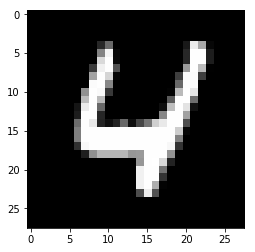

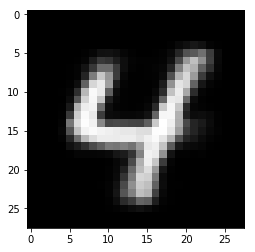

17400 30.304855 20.035908 10.268946
17401 30.304855 20.035908 10.268946
17402 30.304855 20.035908 10.268946
17403 30.304855 20.035908 10.268946
17404 30.304855 20.035908 10.268946
17405 30.304855 20.035908 10.268946
17406 30.304855 20.035908 10.268946
17407 30.304855 20.035908 10.268946
17408 30.304855 20.035908 10.268946
17409 30.304855 20.035908 10.268946
17410 30.304855 20.035908 10.268946
17411 30.304855 20.035908 10.268946
17412 30.304855 20.035908 10.268946
17413 30.304855 20.035908 10.268946
17414 30.304855 20.035908 10.268946
17415 30.304855 20.035908 10.268946
17416 30.304855 20.035908 10.268946
17417 30.304855 20.035908 10.268946
17418 30.304855 20.035908 10.268946
17419 30.304855 20.035908 10.268946
17420 30.304855 20.035908 10.268946
17421 30.304855 20.035908 10.268946
17422 30.304855 20.035908 10.268946
17423 30.304855 20.035908 10.268946
17424 30.304855 20.035908 10.268946
17425 30.304855 20.035908 10.268946
17426 30.304855 20.035908 10.268946
17427 30.304855 20.035908 10

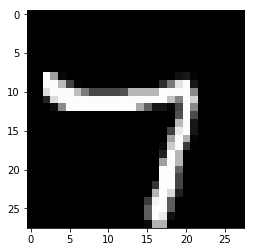

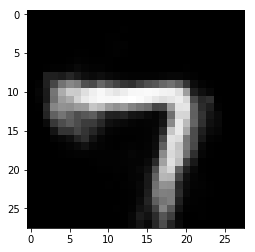

17600 25.412758 15.269067 10.143691
17601 25.412758 15.269067 10.143691
17602 25.412758 15.269067 10.143691
17603 25.412758 15.269067 10.143691
17604 25.412758 15.269067 10.143691
17605 25.412758 15.269067 10.143691
17606 25.412758 15.269067 10.143691
17607 25.412758 15.269067 10.143691
17608 25.412758 15.269067 10.143691
17609 25.412758 15.269067 10.143691
17610 25.412758 15.269067 10.143691
17611 25.412758 15.269067 10.143691
17612 25.412758 15.269067 10.143691
17613 25.412758 15.269067 10.143691
17614 25.412758 15.269067 10.143691
17615 25.412758 15.269067 10.143691
17616 25.412758 15.269067 10.143691
17617 25.412758 15.269067 10.143691
17618 25.412758 15.269067 10.143691
17619 25.412758 15.269067 10.143691
17620 25.412758 15.269067 10.143691
17621 25.412758 15.269067 10.143691
17622 25.412758 15.269067 10.143691
17623 25.412758 15.269067 10.143691
17624 25.412758 15.269067 10.143691
17625 25.412758 15.269067 10.143691
17626 25.412758 15.269067 10.143691
17627 25.412758 15.269067 10

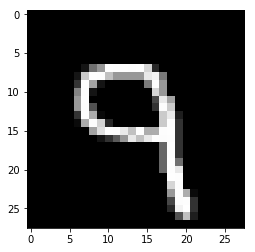

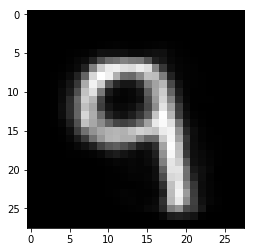

17800 29.56652 19.265778 10.300743
17801 29.56652 19.265778 10.300743
17802 29.56652 19.265778 10.300743
17803 29.56652 19.265778 10.300743
17804 29.56652 19.265778 10.300743
17805 29.56652 19.265778 10.300743
17806 29.56652 19.265778 10.300743
17807 29.56652 19.265778 10.300743
17808 29.56652 19.265778 10.300743
17809 29.56652 19.265778 10.300743
17810 29.56652 19.265778 10.300743
17811 29.56652 19.265778 10.300743
17812 29.56652 19.265778 10.300743
17813 29.56652 19.265778 10.300743
17814 29.56652 19.265778 10.300743
17815 29.56652 19.265778 10.300743
17816 29.56652 19.265778 10.300743
17817 29.56652 19.265778 10.300743
17818 29.56652 19.265778 10.300743
17819 29.56652 19.265778 10.300743
17820 29.56652 19.265778 10.300743
17821 29.56652 19.265778 10.300743
17822 29.56652 19.265778 10.300743
17823 29.56652 19.265778 10.300743
17824 29.56652 19.265778 10.300743
17825 29.56652 19.265778 10.300743
17826 29.56652 19.265778 10.300743
17827 29.56652 19.265778 10.300743
17828 29.56652 19.26

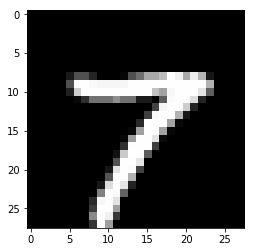

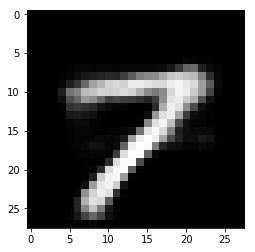

18000 26.93769 16.661158 10.276531
18001 26.93769 16.661158 10.276531
18002 26.93769 16.661158 10.276531
18003 26.93769 16.661158 10.276531
18004 26.93769 16.661158 10.276531
18005 26.93769 16.661158 10.276531
18006 26.93769 16.661158 10.276531
18007 26.93769 16.661158 10.276531
18008 26.93769 16.661158 10.276531
18009 26.93769 16.661158 10.276531
18010 26.93769 16.661158 10.276531
18011 26.93769 16.661158 10.276531
18012 26.93769 16.661158 10.276531
18013 26.93769 16.661158 10.276531
18014 26.93769 16.661158 10.276531
18015 26.93769 16.661158 10.276531
18016 26.93769 16.661158 10.276531
18017 26.93769 16.661158 10.276531
18018 26.93769 16.661158 10.276531
18019 26.93769 16.661158 10.276531
18020 26.93769 16.661158 10.276531
18021 26.93769 16.661158 10.276531
18022 26.93769 16.661158 10.276531
18023 26.93769 16.661158 10.276531
18024 26.93769 16.661158 10.276531
18025 26.93769 16.661158 10.276531
18026 26.93769 16.661158 10.276531
18027 26.93769 16.661158 10.276531
18028 26.93769 16.66

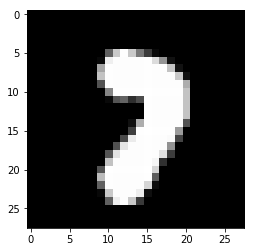

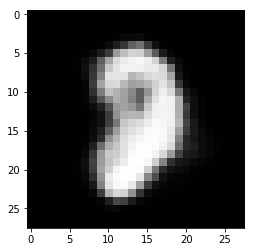

18200 28.286951 20.239338 8.047614
18201 28.286951 20.239338 8.047614
18202 28.286951 20.239338 8.047614
18203 28.286951 20.239338 8.047614
18204 28.286951 20.239338 8.047614
18205 28.286951 20.239338 8.047614
18206 28.286951 20.239338 8.047614
18207 28.286951 20.239338 8.047614
18208 28.286951 20.239338 8.047614
18209 28.286951 20.239338 8.047614
18210 28.286951 20.239338 8.047614
18211 28.286951 20.239338 8.047614
18212 28.286951 20.239338 8.047614
18213 28.286951 20.239338 8.047614
18214 28.286951 20.239338 8.047614
18215 28.286951 20.239338 8.047614
18216 28.286951 20.239338 8.047614
18217 28.286951 20.239338 8.047614
18218 28.286951 20.239338 8.047614
18219 28.286951 20.239338 8.047614
18220 28.286951 20.239338 8.047614
18221 28.286951 20.239338 8.047614
18222 28.286951 20.239338 8.047614
18223 28.286951 20.239338 8.047614
18224 28.286951 20.239338 8.047614
18225 28.286951 20.239338 8.047614
18226 28.286951 20.239338 8.047614
18227 28.286951 20.239338 8.047614
18228 28.286951 20.2

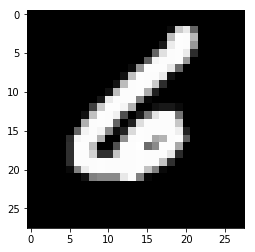

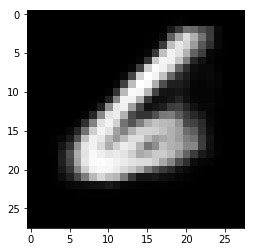

18400 25.66046 16.163506 9.496955
18401 25.66046 16.163506 9.496955
18402 25.66046 16.163506 9.496955
18403 25.66046 16.163506 9.496955
18404 25.66046 16.163506 9.496955
18405 25.66046 16.163506 9.496955
18406 25.66046 16.163506 9.496955
18407 25.66046 16.163506 9.496955
18408 25.66046 16.163506 9.496955
18409 25.66046 16.163506 9.496955
18410 25.66046 16.163506 9.496955
18411 25.66046 16.163506 9.496955
18412 25.66046 16.163506 9.496955
18413 25.66046 16.163506 9.496955
18414 25.66046 16.163506 9.496955
18415 25.66046 16.163506 9.496955
18416 25.66046 16.163506 9.496955
18417 25.66046 16.163506 9.496955
18418 25.66046 16.163506 9.496955
18419 25.66046 16.163506 9.496955
18420 25.66046 16.163506 9.496955
18421 25.66046 16.163506 9.496955
18422 25.66046 16.163506 9.496955
18423 25.66046 16.163506 9.496955
18424 25.66046 16.163506 9.496955
18425 25.66046 16.163506 9.496955
18426 25.66046 16.163506 9.496955
18427 25.66046 16.163506 9.496955
18428 25.66046 16.163506 9.496955
18429 25.66046

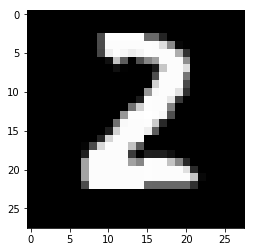

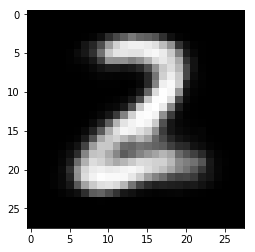

18600 25.967625 16.590672 9.376955
18601 25.967625 16.590672 9.376955
18602 25.967625 16.590672 9.376955
18603 25.967625 16.590672 9.376955
18604 25.967625 16.590672 9.376955
18605 25.967625 16.590672 9.376955
18606 25.967625 16.590672 9.376955
18607 25.967625 16.590672 9.376955
18608 25.967625 16.590672 9.376955
18609 25.967625 16.590672 9.376955
18610 25.967625 16.590672 9.376955
18611 25.967625 16.590672 9.376955
18612 25.967625 16.590672 9.376955
18613 25.967625 16.590672 9.376955
18614 25.967625 16.590672 9.376955
18615 25.967625 16.590672 9.376955
18616 25.967625 16.590672 9.376955
18617 25.967625 16.590672 9.376955
18618 25.967625 16.590672 9.376955
18619 25.967625 16.590672 9.376955
18620 25.967625 16.590672 9.376955
18621 25.967625 16.590672 9.376955
18622 25.967625 16.590672 9.376955
18623 25.967625 16.590672 9.376955
18624 25.967625 16.590672 9.376955
18625 25.967625 16.590672 9.376955
18626 25.967625 16.590672 9.376955
18627 25.967625 16.590672 9.376955
18628 25.967625 16.5

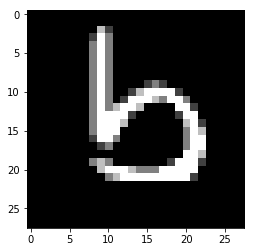

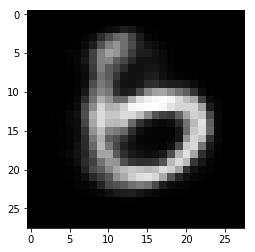

18800 28.078846 18.738201 9.340646
18801 28.078846 18.738201 9.340646
18802 28.078846 18.738201 9.340646
18803 28.078846 18.738201 9.340646
18804 28.078846 18.738201 9.340646
18805 28.078846 18.738201 9.340646
18806 28.078846 18.738201 9.340646
18807 28.078846 18.738201 9.340646
18808 28.078846 18.738201 9.340646
18809 28.078846 18.738201 9.340646
18810 28.078846 18.738201 9.340646
18811 28.078846 18.738201 9.340646
18812 28.078846 18.738201 9.340646
18813 28.078846 18.738201 9.340646
18814 28.078846 18.738201 9.340646
18815 28.078846 18.738201 9.340646
18816 28.078846 18.738201 9.340646
18817 28.078846 18.738201 9.340646
18818 28.078846 18.738201 9.340646
18819 28.078846 18.738201 9.340646
18820 28.078846 18.738201 9.340646
18821 28.078846 18.738201 9.340646
18822 28.078846 18.738201 9.340646
18823 28.078846 18.738201 9.340646
18824 28.078846 18.738201 9.340646
18825 28.078846 18.738201 9.340646
18826 28.078846 18.738201 9.340646
18827 28.078846 18.738201 9.340646
18828 28.078846 18.7

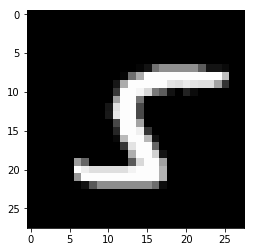

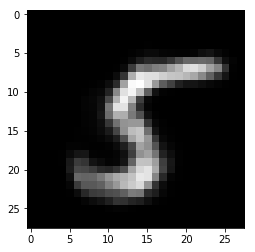

19000 27.09656 18.785141 8.311419
19001 27.09656 18.785141 8.311419
19002 27.09656 18.785141 8.311419
19003 27.09656 18.785141 8.311419
19004 27.09656 18.785141 8.311419
19005 27.09656 18.785141 8.311419
19006 27.09656 18.785141 8.311419
19007 27.09656 18.785141 8.311419
19008 27.09656 18.785141 8.311419
19009 27.09656 18.785141 8.311419
19010 27.09656 18.785141 8.311419
19011 27.09656 18.785141 8.311419
19012 27.09656 18.785141 8.311419
19013 27.09656 18.785141 8.311419
19014 27.09656 18.785141 8.311419
19015 27.09656 18.785141 8.311419
19016 27.09656 18.785141 8.311419
19017 27.09656 18.785141 8.311419
19018 27.09656 18.785141 8.311419
19019 27.09656 18.785141 8.311419
19020 27.09656 18.785141 8.311419
19021 27.09656 18.785141 8.311419
19022 27.09656 18.785141 8.311419
19023 27.09656 18.785141 8.311419
19024 27.09656 18.785141 8.311419
19025 27.09656 18.785141 8.311419
19026 27.09656 18.785141 8.311419
19027 27.09656 18.785141 8.311419
19028 27.09656 18.785141 8.311419
19029 27.09656

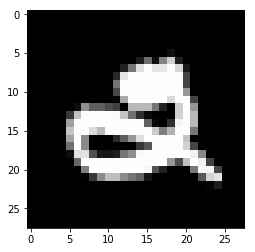

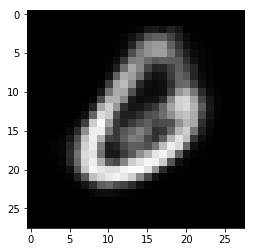

19200 41.06253 30.686592 10.375938
19201 41.06253 30.686592 10.375938
19202 41.06253 30.686592 10.375938
19203 41.06253 30.686592 10.375938
19204 41.06253 30.686592 10.375938
19205 41.06253 30.686592 10.375938
19206 41.06253 30.686592 10.375938
19207 41.06253 30.686592 10.375938
19208 41.06253 30.686592 10.375938
19209 41.06253 30.686592 10.375938
19210 41.06253 30.686592 10.375938
19211 41.06253 30.686592 10.375938
19212 41.06253 30.686592 10.375938
19213 41.06253 30.686592 10.375938
19214 41.06253 30.686592 10.375938
19215 41.06253 30.686592 10.375938
19216 41.06253 30.686592 10.375938
19217 41.06253 30.686592 10.375938
19218 41.06253 30.686592 10.375938
19219 41.06253 30.686592 10.375938
19220 41.06253 30.686592 10.375938
19221 41.06253 30.686592 10.375938
19222 41.06253 30.686592 10.375938
19223 41.06253 30.686592 10.375938
19224 41.06253 30.686592 10.375938
19225 41.06253 30.686592 10.375938
19226 41.06253 30.686592 10.375938
19227 41.06253 30.686592 10.375938
19228 41.06253 30.68

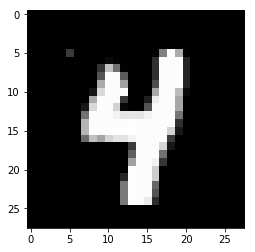

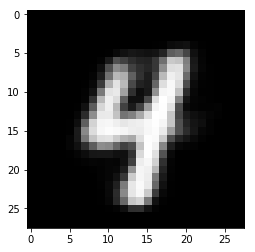

19400 26.842697 16.32982 10.512877
19401 26.842697 16.32982 10.512877
19402 26.842697 16.32982 10.512877
19403 26.842697 16.32982 10.512877
19404 26.842697 16.32982 10.512877
19405 26.842697 16.32982 10.512877
19406 26.842697 16.32982 10.512877
19407 26.842697 16.32982 10.512877
19408 26.842697 16.32982 10.512877
19409 26.842697 16.32982 10.512877
19410 26.842697 16.32982 10.512877
19411 26.842697 16.32982 10.512877
19412 26.842697 16.32982 10.512877
19413 26.842697 16.32982 10.512877
19414 26.842697 16.32982 10.512877
19415 26.842697 16.32982 10.512877
19416 26.842697 16.32982 10.512877
19417 26.842697 16.32982 10.512877
19418 26.842697 16.32982 10.512877
19419 26.842697 16.32982 10.512877
19420 26.842697 16.32982 10.512877
19421 26.842697 16.32982 10.512877
19422 26.842697 16.32982 10.512877
19423 26.842697 16.32982 10.512877
19424 26.842697 16.32982 10.512877
19425 26.842697 16.32982 10.512877
19426 26.842697 16.32982 10.512877
19427 26.842697 16.32982 10.512877
19428 26.842697 16.3

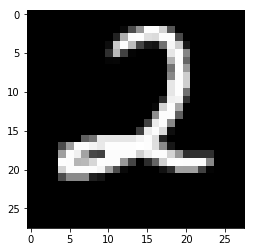

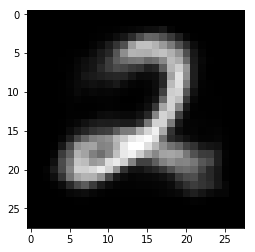

19600 32.562447 22.327595 10.234854
19601 32.562447 22.327595 10.234854
19602 32.562447 22.327595 10.234854
19603 32.562447 22.327595 10.234854
19604 32.562447 22.327595 10.234854
19605 32.562447 22.327595 10.234854
19606 32.562447 22.327595 10.234854
19607 32.562447 22.327595 10.234854
19608 32.562447 22.327595 10.234854
19609 32.562447 22.327595 10.234854
19610 32.562447 22.327595 10.234854
19611 32.562447 22.327595 10.234854
19612 32.562447 22.327595 10.234854
19613 32.562447 22.327595 10.234854
19614 32.562447 22.327595 10.234854
19615 32.562447 22.327595 10.234854
19616 32.562447 22.327595 10.234854
19617 32.562447 22.327595 10.234854
19618 32.562447 22.327595 10.234854
19619 32.562447 22.327595 10.234854
19620 32.562447 22.327595 10.234854
19621 32.562447 22.327595 10.234854
19622 32.562447 22.327595 10.234854
19623 32.562447 22.327595 10.234854
19624 32.562447 22.327595 10.234854
19625 32.562447 22.327595 10.234854
19626 32.562447 22.327595 10.234854
19627 32.562447 22.327595 10

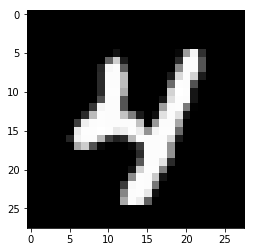

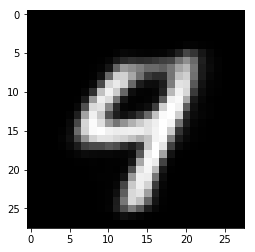

19800 26.617458 17.887297 8.730164
19801 26.617458 17.887297 8.730164
19802 26.617458 17.887297 8.730164
19803 26.617458 17.887297 8.730164
19804 26.617458 17.887297 8.730164
19805 26.617458 17.887297 8.730164
19806 26.617458 17.887297 8.730164
19807 26.617458 17.887297 8.730164
19808 26.617458 17.887297 8.730164
19809 26.617458 17.887297 8.730164
19810 26.617458 17.887297 8.730164
19811 26.617458 17.887297 8.730164
19812 26.617458 17.887297 8.730164
19813 26.617458 17.887297 8.730164
19814 26.617458 17.887297 8.730164
19815 26.617458 17.887297 8.730164
19816 26.617458 17.887297 8.730164
19817 26.617458 17.887297 8.730164
19818 26.617458 17.887297 8.730164
19819 26.617458 17.887297 8.730164
19820 26.617458 17.887297 8.730164
19821 26.617458 17.887297 8.730164
19822 26.617458 17.887297 8.730164
19823 26.617458 17.887297 8.730164
19824 26.617458 17.887297 8.730164
19825 26.617458 17.887297 8.730164
19826 26.617458 17.887297 8.730164
19827 26.617458 17.887297 8.730164
19828 26.617458 17.8

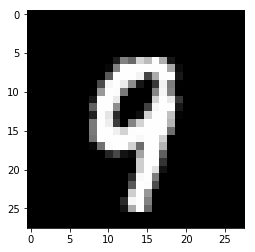

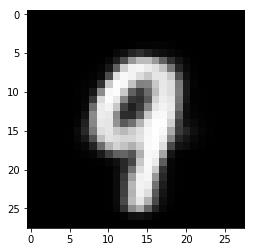

20000 32.818977 22.538399 10.280579
20001 32.818977 22.538399 10.280579
20002 32.818977 22.538399 10.280579
20003 32.818977 22.538399 10.280579
20004 32.818977 22.538399 10.280579
20005 32.818977 22.538399 10.280579
20006 32.818977 22.538399 10.280579
20007 32.818977 22.538399 10.280579
20008 32.818977 22.538399 10.280579
20009 32.818977 22.538399 10.280579
20010 32.818977 22.538399 10.280579
20011 32.818977 22.538399 10.280579
20012 32.818977 22.538399 10.280579
20013 32.818977 22.538399 10.280579
20014 32.818977 22.538399 10.280579
20015 32.818977 22.538399 10.280579
20016 32.818977 22.538399 10.280579
20017 32.818977 22.538399 10.280579
20018 32.818977 22.538399 10.280579
20019 32.818977 22.538399 10.280579
20020 32.818977 22.538399 10.280579
20021 32.818977 22.538399 10.280579
20022 32.818977 22.538399 10.280579
20023 32.818977 22.538399 10.280579
20024 32.818977 22.538399 10.280579
20025 32.818977 22.538399 10.280579
20026 32.818977 22.538399 10.280579
20027 32.818977 22.538399 10

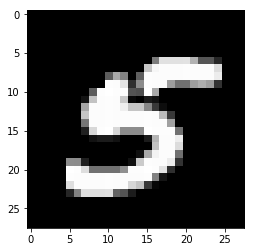

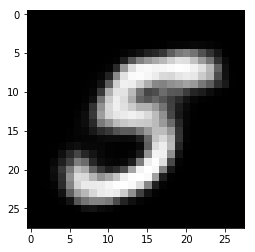

20200 32.93554 23.100918 9.834622
20201 32.93554 23.100918 9.834622
20202 32.93554 23.100918 9.834622
20203 32.93554 23.100918 9.834622
20204 32.93554 23.100918 9.834622
20205 32.93554 23.100918 9.834622
20206 32.93554 23.100918 9.834622
20207 32.93554 23.100918 9.834622
20208 32.93554 23.100918 9.834622
20209 32.93554 23.100918 9.834622
20210 32.93554 23.100918 9.834622
20211 32.93554 23.100918 9.834622
20212 32.93554 23.100918 9.834622
20213 32.93554 23.100918 9.834622
20214 32.93554 23.100918 9.834622
20215 32.93554 23.100918 9.834622
20216 32.93554 23.100918 9.834622
20217 32.93554 23.100918 9.834622
20218 32.93554 23.100918 9.834622
20219 32.93554 23.100918 9.834622
20220 32.93554 23.100918 9.834622
20221 32.93554 23.100918 9.834622
20222 32.93554 23.100918 9.834622
20223 32.93554 23.100918 9.834622
20224 32.93554 23.100918 9.834622
20225 32.93554 23.100918 9.834622
20226 32.93554 23.100918 9.834622
20227 32.93554 23.100918 9.834622
20228 32.93554 23.100918 9.834622
20229 32.93554

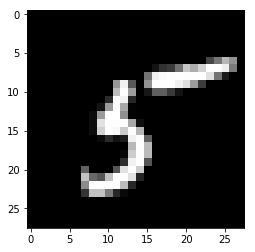

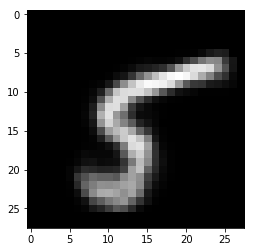

20400 28.205442 18.425266 9.780178
20401 28.205442 18.425266 9.780178
20402 28.205442 18.425266 9.780178
20403 28.205442 18.425266 9.780178
20404 28.205442 18.425266 9.780178
20405 28.205442 18.425266 9.780178
20406 28.205442 18.425266 9.780178
20407 28.205442 18.425266 9.780178
20408 28.205442 18.425266 9.780178
20409 28.205442 18.425266 9.780178
20410 28.205442 18.425266 9.780178
20411 28.205442 18.425266 9.780178
20412 28.205442 18.425266 9.780178
20413 28.205442 18.425266 9.780178
20414 28.205442 18.425266 9.780178
20415 28.205442 18.425266 9.780178
20416 28.205442 18.425266 9.780178
20417 28.205442 18.425266 9.780178
20418 28.205442 18.425266 9.780178
20419 28.205442 18.425266 9.780178
20420 28.205442 18.425266 9.780178
20421 28.205442 18.425266 9.780178
20422 28.205442 18.425266 9.780178
20423 28.205442 18.425266 9.780178
20424 28.205442 18.425266 9.780178
20425 28.205442 18.425266 9.780178
20426 28.205442 18.425266 9.780178
20427 28.205442 18.425266 9.780178
20428 28.205442 18.4

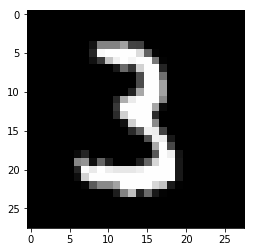

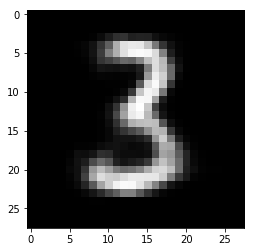

20600 30.126308 20.628521 9.497788
20601 30.126308 20.628521 9.497788
20602 30.126308 20.628521 9.497788
20603 30.126308 20.628521 9.497788
20604 30.126308 20.628521 9.497788
20605 30.126308 20.628521 9.497788
20606 30.126308 20.628521 9.497788
20607 30.126308 20.628521 9.497788
20608 30.126308 20.628521 9.497788
20609 30.126308 20.628521 9.497788
20610 30.126308 20.628521 9.497788
20611 30.126308 20.628521 9.497788
20612 30.126308 20.628521 9.497788
20613 30.126308 20.628521 9.497788
20614 30.126308 20.628521 9.497788
20615 30.126308 20.628521 9.497788
20616 30.126308 20.628521 9.497788
20617 30.126308 20.628521 9.497788
20618 30.126308 20.628521 9.497788
20619 30.126308 20.628521 9.497788
20620 30.126308 20.628521 9.497788
20621 30.126308 20.628521 9.497788
20622 30.126308 20.628521 9.497788
20623 30.126308 20.628521 9.497788
20624 30.126308 20.628521 9.497788
20625 30.126308 20.628521 9.497788
20626 30.126308 20.628521 9.497788
20627 30.126308 20.628521 9.497788
20628 30.126308 20.6

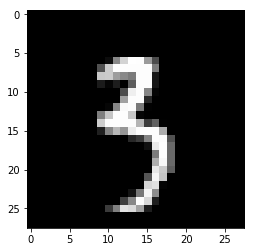

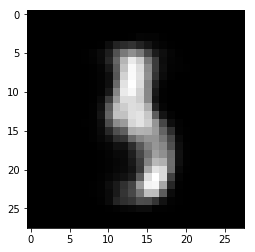

20800 25.169788 15.928701 9.241085
20801 25.169788 15.928701 9.241085
20802 25.169788 15.928701 9.241085
20803 25.169788 15.928701 9.241085
20804 25.169788 15.928701 9.241085
20805 25.169788 15.928701 9.241085
20806 25.169788 15.928701 9.241085
20807 25.169788 15.928701 9.241085
20808 25.169788 15.928701 9.241085
20809 25.169788 15.928701 9.241085
20810 25.169788 15.928701 9.241085
20811 25.169788 15.928701 9.241085
20812 25.169788 15.928701 9.241085
20813 25.169788 15.928701 9.241085
20814 25.169788 15.928701 9.241085
20815 25.169788 15.928701 9.241085
20816 25.169788 15.928701 9.241085
20817 25.169788 15.928701 9.241085
20818 25.169788 15.928701 9.241085
20819 25.169788 15.928701 9.241085
20820 25.169788 15.928701 9.241085
20821 25.169788 15.928701 9.241085
20822 25.169788 15.928701 9.241085
20823 25.169788 15.928701 9.241085
20824 25.169788 15.928701 9.241085
20825 25.169788 15.928701 9.241085
20826 25.169788 15.928701 9.241085
20827 25.169788 15.928701 9.241085
20828 25.169788 15.9

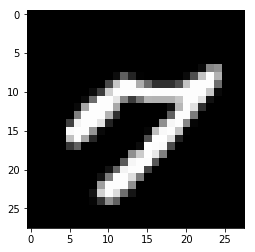

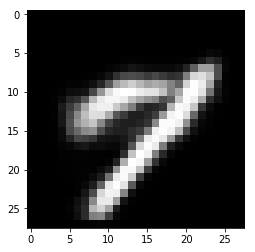

21000 28.371637 19.246199 9.125441
21001 28.371637 19.246199 9.125441
21002 28.371637 19.246199 9.125441
21003 28.371637 19.246199 9.125441
21004 28.371637 19.246199 9.125441
21005 28.371637 19.246199 9.125441
21006 28.371637 19.246199 9.125441
21007 28.371637 19.246199 9.125441
21008 28.371637 19.246199 9.125441
21009 28.371637 19.246199 9.125441
21010 28.371637 19.246199 9.125441
21011 28.371637 19.246199 9.125441
21012 28.371637 19.246199 9.125441
21013 28.371637 19.246199 9.125441
21014 28.371637 19.246199 9.125441
21015 28.371637 19.246199 9.125441
21016 28.371637 19.246199 9.125441
21017 28.371637 19.246199 9.125441
21018 28.371637 19.246199 9.125441
21019 28.371637 19.246199 9.125441
21020 28.371637 19.246199 9.125441
21021 28.371637 19.246199 9.125441
21022 28.371637 19.246199 9.125441
21023 28.371637 19.246199 9.125441
21024 28.371637 19.246199 9.125441
21025 28.371637 19.246199 9.125441
21026 28.371637 19.246199 9.125441
21027 28.371637 19.246199 9.125441
21028 28.371637 19.2

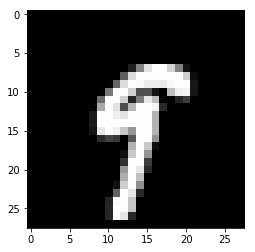

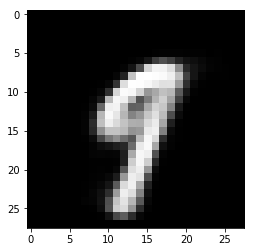

21200 27.784805 18.524841 9.259964
21201 27.784805 18.524841 9.259964
21202 27.784805 18.524841 9.259964
21203 27.784805 18.524841 9.259964
21204 27.784805 18.524841 9.259964
21205 27.784805 18.524841 9.259964
21206 27.784805 18.524841 9.259964
21207 27.784805 18.524841 9.259964
21208 27.784805 18.524841 9.259964
21209 27.784805 18.524841 9.259964
21210 27.784805 18.524841 9.259964
21211 27.784805 18.524841 9.259964
21212 27.784805 18.524841 9.259964
21213 27.784805 18.524841 9.259964
21214 27.784805 18.524841 9.259964
21215 27.784805 18.524841 9.259964
21216 27.784805 18.524841 9.259964
21217 27.784805 18.524841 9.259964
21218 27.784805 18.524841 9.259964
21219 27.784805 18.524841 9.259964
21220 27.784805 18.524841 9.259964
21221 27.784805 18.524841 9.259964
21222 27.784805 18.524841 9.259964
21223 27.784805 18.524841 9.259964
21224 27.784805 18.524841 9.259964
21225 27.784805 18.524841 9.259964
21226 27.784805 18.524841 9.259964
21227 27.784805 18.524841 9.259964
21228 27.784805 18.5

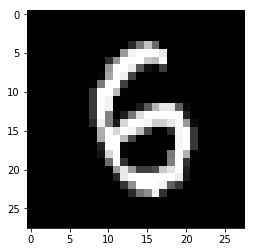

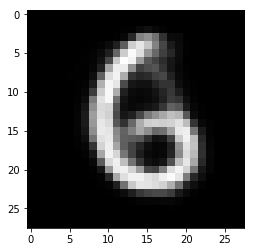

21400 33.98832 24.09132 9.896997
21401 33.98832 24.09132 9.896997
21402 33.98832 24.09132 9.896997
21403 33.98832 24.09132 9.896997
21404 33.98832 24.09132 9.896997
21405 33.98832 24.09132 9.896997
21406 33.98832 24.09132 9.896997
21407 33.98832 24.09132 9.896997
21408 33.98832 24.09132 9.896997
21409 33.98832 24.09132 9.896997
21410 33.98832 24.09132 9.896997
21411 33.98832 24.09132 9.896997
21412 33.98832 24.09132 9.896997
21413 33.98832 24.09132 9.896997
21414 33.98832 24.09132 9.896997
21415 33.98832 24.09132 9.896997
21416 33.98832 24.09132 9.896997
21417 33.98832 24.09132 9.896997
21418 33.98832 24.09132 9.896997
21419 33.98832 24.09132 9.896997
21420 33.98832 24.09132 9.896997
21421 33.98832 24.09132 9.896997
21422 33.98832 24.09132 9.896997
21423 33.98832 24.09132 9.896997
21424 33.98832 24.09132 9.896997
21425 33.98832 24.09132 9.896997
21426 33.98832 24.09132 9.896997
21427 33.98832 24.09132 9.896997
21428 33.98832 24.09132 9.896997
21429 33.98832 24.09132 9.896997
21430 33.9

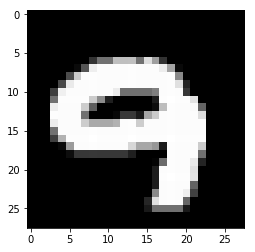

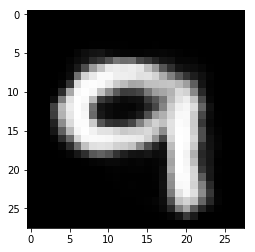

21600 26.352863 16.046467 10.3063965
21601 26.352863 16.046467 10.3063965
21602 26.352863 16.046467 10.3063965
21603 26.352863 16.046467 10.3063965
21604 26.352863 16.046467 10.3063965
21605 26.352863 16.046467 10.3063965
21606 26.352863 16.046467 10.3063965
21607 26.352863 16.046467 10.3063965
21608 26.352863 16.046467 10.3063965
21609 26.352863 16.046467 10.3063965
21610 26.352863 16.046467 10.3063965
21611 26.352863 16.046467 10.3063965
21612 26.352863 16.046467 10.3063965
21613 26.352863 16.046467 10.3063965
21614 26.352863 16.046467 10.3063965
21615 26.352863 16.046467 10.3063965
21616 26.352863 16.046467 10.3063965
21617 26.352863 16.046467 10.3063965
21618 26.352863 16.046467 10.3063965
21619 26.352863 16.046467 10.3063965
21620 26.352863 16.046467 10.3063965
21621 26.352863 16.046467 10.3063965
21622 26.352863 16.046467 10.3063965
21623 26.352863 16.046467 10.3063965
21624 26.352863 16.046467 10.3063965
21625 26.352863 16.046467 10.3063965
21626 26.352863 16.046467 10.3063965
2

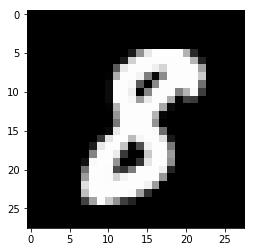

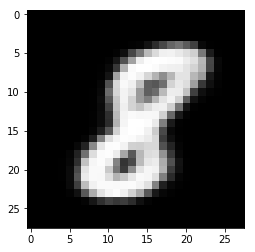

21800 34.03341 24.133589 9.899818
21801 34.03341 24.133589 9.899818
21802 34.03341 24.133589 9.899818
21803 34.03341 24.133589 9.899818
21804 34.03341 24.133589 9.899818
21805 34.03341 24.133589 9.899818
21806 34.03341 24.133589 9.899818
21807 34.03341 24.133589 9.899818
21808 34.03341 24.133589 9.899818
21809 34.03341 24.133589 9.899818
21810 34.03341 24.133589 9.899818
21811 34.03341 24.133589 9.899818
21812 34.03341 24.133589 9.899818
21813 34.03341 24.133589 9.899818
21814 34.03341 24.133589 9.899818
21815 34.03341 24.133589 9.899818
21816 34.03341 24.133589 9.899818
21817 34.03341 24.133589 9.899818
21818 34.03341 24.133589 9.899818
21819 34.03341 24.133589 9.899818
21820 34.03341 24.133589 9.899818
21821 34.03341 24.133589 9.899818
21822 34.03341 24.133589 9.899818
21823 34.03341 24.133589 9.899818
21824 34.03341 24.133589 9.899818
21825 34.03341 24.133589 9.899818
21826 34.03341 24.133589 9.899818
21827 34.03341 24.133589 9.899818
21828 34.03341 24.133589 9.899818
21829 34.03341

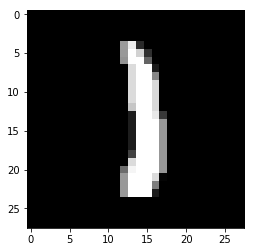

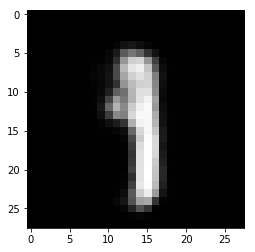

22000 34.498825 25.015509 9.483312
22001 34.498825 25.015509 9.483312
22002 34.498825 25.015509 9.483312
22003 34.498825 25.015509 9.483312
22004 34.498825 25.015509 9.483312
22005 34.498825 25.015509 9.483312
22006 34.498825 25.015509 9.483312
22007 34.498825 25.015509 9.483312
22008 34.498825 25.015509 9.483312
22009 34.498825 25.015509 9.483312
22010 34.498825 25.015509 9.483312
22011 34.498825 25.015509 9.483312
22012 34.498825 25.015509 9.483312
22013 34.498825 25.015509 9.483312
22014 34.498825 25.015509 9.483312
22015 34.498825 25.015509 9.483312
22016 34.498825 25.015509 9.483312
22017 34.498825 25.015509 9.483312
22018 34.498825 25.015509 9.483312
22019 34.498825 25.015509 9.483312
22020 34.498825 25.015509 9.483312
22021 34.498825 25.015509 9.483312
22022 34.498825 25.015509 9.483312
22023 34.498825 25.015509 9.483312
22024 34.498825 25.015509 9.483312
22025 34.498825 25.015509 9.483312
22026 34.498825 25.015509 9.483312
22027 34.498825 25.015509 9.483312
22028 34.498825 25.0

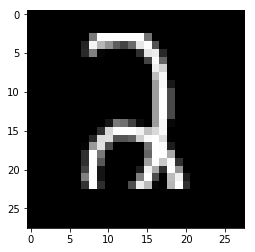

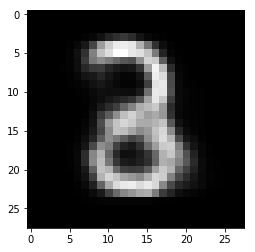

22200 30.90127 20.85644 10.04483
22201 30.90127 20.85644 10.04483
22202 30.90127 20.85644 10.04483
22203 30.90127 20.85644 10.04483
22204 30.90127 20.85644 10.04483
22205 30.90127 20.85644 10.04483
22206 30.90127 20.85644 10.04483
22207 30.90127 20.85644 10.04483
22208 30.90127 20.85644 10.04483
22209 30.90127 20.85644 10.04483
22210 30.90127 20.85644 10.04483
22211 30.90127 20.85644 10.04483
22212 30.90127 20.85644 10.04483
22213 30.90127 20.85644 10.04483
22214 30.90127 20.85644 10.04483
22215 30.90127 20.85644 10.04483
22216 30.90127 20.85644 10.04483
22217 30.90127 20.85644 10.04483
22218 30.90127 20.85644 10.04483
22219 30.90127 20.85644 10.04483
22220 30.90127 20.85644 10.04483
22221 30.90127 20.85644 10.04483
22222 30.90127 20.85644 10.04483
22223 30.90127 20.85644 10.04483
22224 30.90127 20.85644 10.04483
22225 30.90127 20.85644 10.04483
22226 30.90127 20.85644 10.04483
22227 30.90127 20.85644 10.04483
22228 30.90127 20.85644 10.04483
22229 30.90127 20.85644 10.04483
22230 30.9

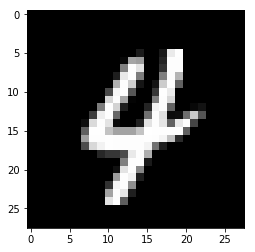

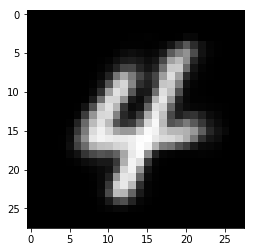

22400 26.566078 16.752983 9.813095
22401 26.566078 16.752983 9.813095
22402 26.566078 16.752983 9.813095
22403 26.566078 16.752983 9.813095
22404 26.566078 16.752983 9.813095
22405 26.566078 16.752983 9.813095
22406 26.566078 16.752983 9.813095
22407 26.566078 16.752983 9.813095
22408 26.566078 16.752983 9.813095
22409 26.566078 16.752983 9.813095
22410 26.566078 16.752983 9.813095
22411 26.566078 16.752983 9.813095
22412 26.566078 16.752983 9.813095
22413 26.566078 16.752983 9.813095
22414 26.566078 16.752983 9.813095
22415 26.566078 16.752983 9.813095
22416 26.566078 16.752983 9.813095
22417 26.566078 16.752983 9.813095
22418 26.566078 16.752983 9.813095
22419 26.566078 16.752983 9.813095
22420 26.566078 16.752983 9.813095
22421 26.566078 16.752983 9.813095
22422 26.566078 16.752983 9.813095
22423 26.566078 16.752983 9.813095
22424 26.566078 16.752983 9.813095
22425 26.566078 16.752983 9.813095
22426 26.566078 16.752983 9.813095
22427 26.566078 16.752983 9.813095
22428 26.566078 16.7

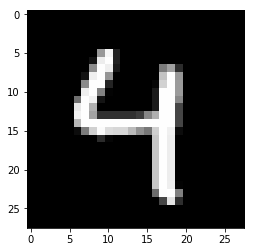

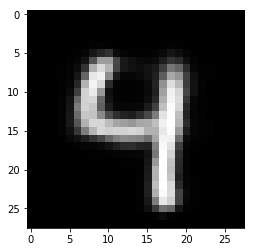

22600 27.188095 17.115852 10.072245
22601 27.188095 17.115852 10.072245
22602 27.188095 17.115852 10.072245
22603 27.188095 17.115852 10.072245
22604 27.188095 17.115852 10.072245
22605 27.188095 17.115852 10.072245
22606 27.188095 17.115852 10.072245
22607 27.188095 17.115852 10.072245
22608 27.188095 17.115852 10.072245
22609 27.188095 17.115852 10.072245
22610 27.188095 17.115852 10.072245
22611 27.188095 17.115852 10.072245
22612 27.188095 17.115852 10.072245
22613 27.188095 17.115852 10.072245
22614 27.188095 17.115852 10.072245
22615 27.188095 17.115852 10.072245
22616 27.188095 17.115852 10.072245
22617 27.188095 17.115852 10.072245
22618 27.188095 17.115852 10.072245
22619 27.188095 17.115852 10.072245
22620 27.188095 17.115852 10.072245
22621 27.188095 17.115852 10.072245
22622 27.188095 17.115852 10.072245
22623 27.188095 17.115852 10.072245
22624 27.188095 17.115852 10.072245
22625 27.188095 17.115852 10.072245
22626 27.188095 17.115852 10.072245
22627 27.188095 17.115852 10

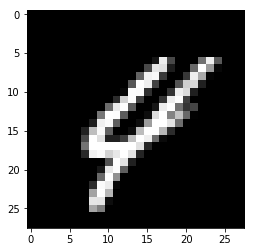

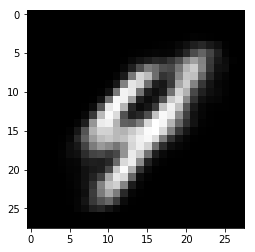

22800 25.772919 16.740383 9.032536
22801 25.772919 16.740383 9.032536
22802 25.772919 16.740383 9.032536
22803 25.772919 16.740383 9.032536
22804 25.772919 16.740383 9.032536
22805 25.772919 16.740383 9.032536
22806 25.772919 16.740383 9.032536
22807 25.772919 16.740383 9.032536
22808 25.772919 16.740383 9.032536
22809 25.772919 16.740383 9.032536
22810 25.772919 16.740383 9.032536
22811 25.772919 16.740383 9.032536
22812 25.772919 16.740383 9.032536
22813 25.772919 16.740383 9.032536
22814 25.772919 16.740383 9.032536
22815 25.772919 16.740383 9.032536
22816 25.772919 16.740383 9.032536
22817 25.772919 16.740383 9.032536
22818 25.772919 16.740383 9.032536
22819 25.772919 16.740383 9.032536
22820 25.772919 16.740383 9.032536
22821 25.772919 16.740383 9.032536
22822 25.772919 16.740383 9.032536
22823 25.772919 16.740383 9.032536
22824 25.772919 16.740383 9.032536
22825 25.772919 16.740383 9.032536
22826 25.772919 16.740383 9.032536
22827 25.772919 16.740383 9.032536
22828 25.772919 16.7

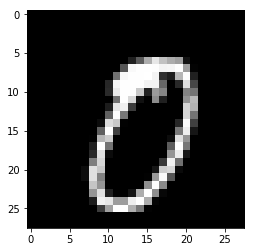

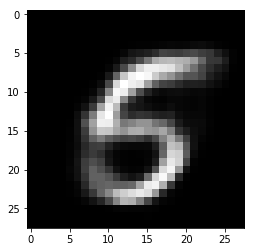

23000 27.868908 18.033112 9.835795
23001 27.868908 18.033112 9.835795
23002 27.868908 18.033112 9.835795
23003 27.868908 18.033112 9.835795
23004 27.868908 18.033112 9.835795
23005 27.868908 18.033112 9.835795
23006 27.868908 18.033112 9.835795
23007 27.868908 18.033112 9.835795
23008 27.868908 18.033112 9.835795
23009 27.868908 18.033112 9.835795
23010 27.868908 18.033112 9.835795
23011 27.868908 18.033112 9.835795
23012 27.868908 18.033112 9.835795
23013 27.868908 18.033112 9.835795
23014 27.868908 18.033112 9.835795
23015 27.868908 18.033112 9.835795
23016 27.868908 18.033112 9.835795
23017 27.868908 18.033112 9.835795
23018 27.868908 18.033112 9.835795
23019 27.868908 18.033112 9.835795
23020 27.868908 18.033112 9.835795
23021 27.868908 18.033112 9.835795
23022 27.868908 18.033112 9.835795
23023 27.868908 18.033112 9.835795
23024 27.868908 18.033112 9.835795
23025 27.868908 18.033112 9.835795
23026 27.868908 18.033112 9.835795
23027 27.868908 18.033112 9.835795
23028 27.868908 18.0

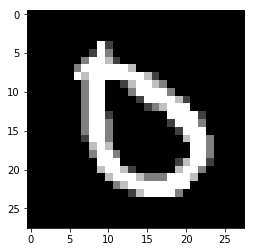

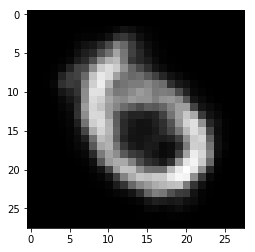

23200 32.300323 22.269363 10.030963
23201 32.300323 22.269363 10.030963
23202 32.300323 22.269363 10.030963
23203 32.300323 22.269363 10.030963
23204 32.300323 22.269363 10.030963
23205 32.300323 22.269363 10.030963
23206 32.300323 22.269363 10.030963
23207 32.300323 22.269363 10.030963
23208 32.300323 22.269363 10.030963
23209 32.300323 22.269363 10.030963
23210 32.300323 22.269363 10.030963
23211 32.300323 22.269363 10.030963
23212 32.300323 22.269363 10.030963
23213 32.300323 22.269363 10.030963
23214 32.300323 22.269363 10.030963
23215 32.300323 22.269363 10.030963
23216 32.300323 22.269363 10.030963
23217 32.300323 22.269363 10.030963
23218 32.300323 22.269363 10.030963
23219 32.300323 22.269363 10.030963
23220 32.300323 22.269363 10.030963
23221 32.300323 22.269363 10.030963
23222 32.300323 22.269363 10.030963
23223 32.300323 22.269363 10.030963
23224 32.300323 22.269363 10.030963
23225 32.300323 22.269363 10.030963
23226 32.300323 22.269363 10.030963
23227 32.300323 22.269363 10

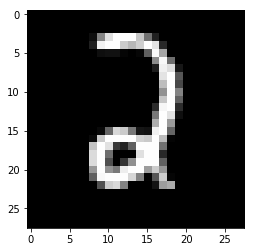

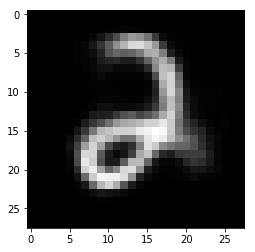

23400 28.384716 19.419754 8.964964
23401 28.384716 19.419754 8.964964
23402 28.384716 19.419754 8.964964
23403 28.384716 19.419754 8.964964
23404 28.384716 19.419754 8.964964
23405 28.384716 19.419754 8.964964
23406 28.384716 19.419754 8.964964
23407 28.384716 19.419754 8.964964
23408 28.384716 19.419754 8.964964
23409 28.384716 19.419754 8.964964
23410 28.384716 19.419754 8.964964
23411 28.384716 19.419754 8.964964
23412 28.384716 19.419754 8.964964
23413 28.384716 19.419754 8.964964
23414 28.384716 19.419754 8.964964
23415 28.384716 19.419754 8.964964
23416 28.384716 19.419754 8.964964
23417 28.384716 19.419754 8.964964
23418 28.384716 19.419754 8.964964
23419 28.384716 19.419754 8.964964
23420 28.384716 19.419754 8.964964
23421 28.384716 19.419754 8.964964
23422 28.384716 19.419754 8.964964
23423 28.384716 19.419754 8.964964
23424 28.384716 19.419754 8.964964
23425 28.384716 19.419754 8.964964
23426 28.384716 19.419754 8.964964
23427 28.384716 19.419754 8.964964
23428 28.384716 19.4

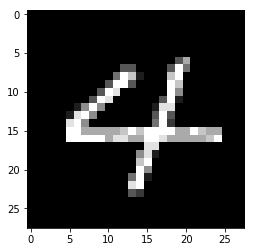

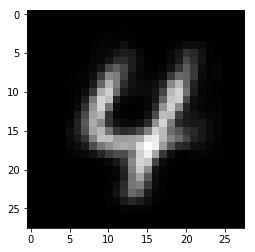

23600 28.579569 19.14653 9.433039
23601 28.579569 19.14653 9.433039
23602 28.579569 19.14653 9.433039
23603 28.579569 19.14653 9.433039
23604 28.579569 19.14653 9.433039
23605 28.579569 19.14653 9.433039
23606 28.579569 19.14653 9.433039
23607 28.579569 19.14653 9.433039
23608 28.579569 19.14653 9.433039
23609 28.579569 19.14653 9.433039
23610 28.579569 19.14653 9.433039
23611 28.579569 19.14653 9.433039
23612 28.579569 19.14653 9.433039
23613 28.579569 19.14653 9.433039
23614 28.579569 19.14653 9.433039
23615 28.579569 19.14653 9.433039
23616 28.579569 19.14653 9.433039
23617 28.579569 19.14653 9.433039
23618 28.579569 19.14653 9.433039
23619 28.579569 19.14653 9.433039
23620 28.579569 19.14653 9.433039
23621 28.579569 19.14653 9.433039
23622 28.579569 19.14653 9.433039
23623 28.579569 19.14653 9.433039
23624 28.579569 19.14653 9.433039
23625 28.579569 19.14653 9.433039
23626 28.579569 19.14653 9.433039
23627 28.579569 19.14653 9.433039
23628 28.579569 19.14653 9.433039
23629 28.57956

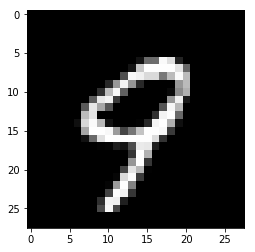

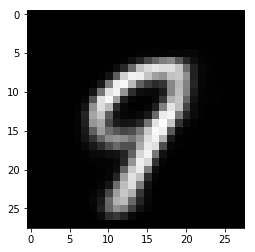

23800 27.613218 18.334545 9.278674
23801 27.613218 18.334545 9.278674
23802 27.613218 18.334545 9.278674
23803 27.613218 18.334545 9.278674
23804 27.613218 18.334545 9.278674
23805 27.613218 18.334545 9.278674
23806 27.613218 18.334545 9.278674
23807 27.613218 18.334545 9.278674
23808 27.613218 18.334545 9.278674
23809 27.613218 18.334545 9.278674
23810 27.613218 18.334545 9.278674
23811 27.613218 18.334545 9.278674
23812 27.613218 18.334545 9.278674
23813 27.613218 18.334545 9.278674
23814 27.613218 18.334545 9.278674
23815 27.613218 18.334545 9.278674
23816 27.613218 18.334545 9.278674
23817 27.613218 18.334545 9.278674
23818 27.613218 18.334545 9.278674
23819 27.613218 18.334545 9.278674
23820 27.613218 18.334545 9.278674
23821 27.613218 18.334545 9.278674
23822 27.613218 18.334545 9.278674
23823 27.613218 18.334545 9.278674
23824 27.613218 18.334545 9.278674
23825 27.613218 18.334545 9.278674
23826 27.613218 18.334545 9.278674
23827 27.613218 18.334545 9.278674
23828 27.613218 18.3

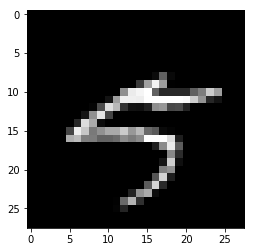

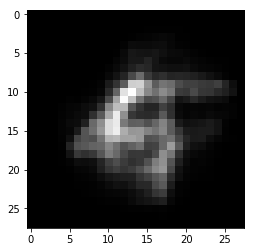

24000 30.213366 20.465744 9.7476225
24001 30.213366 20.465744 9.7476225
24002 30.213366 20.465744 9.7476225
24003 30.213366 20.465744 9.7476225
24004 30.213366 20.465744 9.7476225
24005 30.213366 20.465744 9.7476225
24006 30.213366 20.465744 9.7476225
24007 30.213366 20.465744 9.7476225
24008 30.213366 20.465744 9.7476225
24009 30.213366 20.465744 9.7476225
24010 30.213366 20.465744 9.7476225
24011 30.213366 20.465744 9.7476225
24012 30.213366 20.465744 9.7476225
24013 30.213366 20.465744 9.7476225
24014 30.213366 20.465744 9.7476225
24015 30.213366 20.465744 9.7476225
24016 30.213366 20.465744 9.7476225
24017 30.213366 20.465744 9.7476225
24018 30.213366 20.465744 9.7476225
24019 30.213366 20.465744 9.7476225
24020 30.213366 20.465744 9.7476225
24021 30.213366 20.465744 9.7476225
24022 30.213366 20.465744 9.7476225
24023 30.213366 20.465744 9.7476225
24024 30.213366 20.465744 9.7476225
24025 30.213366 20.465744 9.7476225
24026 30.213366 20.465744 9.7476225
24027 30.213366 20.465744 9.

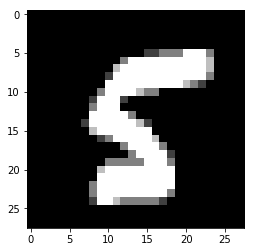

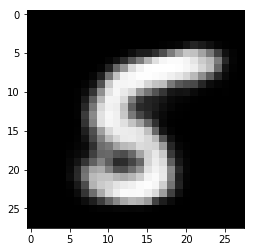

24200 28.484982 17.86097 10.624012
24201 28.484982 17.86097 10.624012
24202 28.484982 17.86097 10.624012
24203 28.484982 17.86097 10.624012
24204 28.484982 17.86097 10.624012
24205 28.484982 17.86097 10.624012
24206 28.484982 17.86097 10.624012
24207 28.484982 17.86097 10.624012
24208 28.484982 17.86097 10.624012
24209 28.484982 17.86097 10.624012
24210 28.484982 17.86097 10.624012
24211 28.484982 17.86097 10.624012
24212 28.484982 17.86097 10.624012
24213 28.484982 17.86097 10.624012
24214 28.484982 17.86097 10.624012
24215 28.484982 17.86097 10.624012
24216 28.484982 17.86097 10.624012
24217 28.484982 17.86097 10.624012
24218 28.484982 17.86097 10.624012
24219 28.484982 17.86097 10.624012
24220 28.484982 17.86097 10.624012
24221 28.484982 17.86097 10.624012
24222 28.484982 17.86097 10.624012
24223 28.484982 17.86097 10.624012
24224 28.484982 17.86097 10.624012
24225 28.484982 17.86097 10.624012
24226 28.484982 17.86097 10.624012
24227 28.484982 17.86097 10.624012
24228 28.484982 17.8

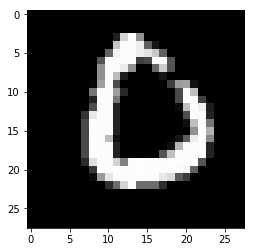

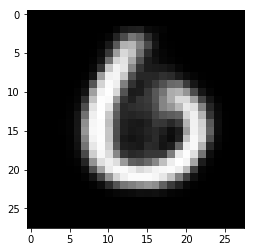

24400 27.820164 18.044243 9.775922
24401 27.820164 18.044243 9.775922
24402 27.820164 18.044243 9.775922
24403 27.820164 18.044243 9.775922
24404 27.820164 18.044243 9.775922
24405 27.820164 18.044243 9.775922
24406 27.820164 18.044243 9.775922
24407 27.820164 18.044243 9.775922
24408 27.820164 18.044243 9.775922
24409 27.820164 18.044243 9.775922
24410 27.820164 18.044243 9.775922
24411 27.820164 18.044243 9.775922
24412 27.820164 18.044243 9.775922
24413 27.820164 18.044243 9.775922
24414 27.820164 18.044243 9.775922
24415 27.820164 18.044243 9.775922
24416 27.820164 18.044243 9.775922
24417 27.820164 18.044243 9.775922
24418 27.820164 18.044243 9.775922
24419 27.820164 18.044243 9.775922
24420 27.820164 18.044243 9.775922
24421 27.820164 18.044243 9.775922
24422 27.820164 18.044243 9.775922
24423 27.820164 18.044243 9.775922
24424 27.820164 18.044243 9.775922
24425 27.820164 18.044243 9.775922
24426 27.820164 18.044243 9.775922
24427 27.820164 18.044243 9.775922
24428 27.820164 18.0

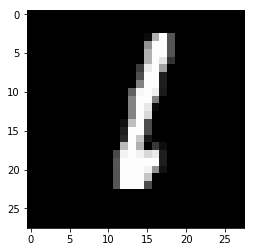

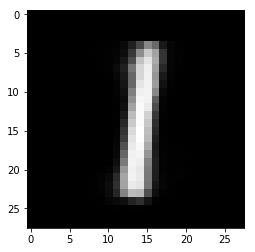

24600 24.860939 16.155972 8.704967
24601 24.860939 16.155972 8.704967
24602 24.860939 16.155972 8.704967
24603 24.860939 16.155972 8.704967
24604 24.860939 16.155972 8.704967
24605 24.860939 16.155972 8.704967
24606 24.860939 16.155972 8.704967
24607 24.860939 16.155972 8.704967
24608 24.860939 16.155972 8.704967
24609 24.860939 16.155972 8.704967
24610 24.860939 16.155972 8.704967
24611 24.860939 16.155972 8.704967
24612 24.860939 16.155972 8.704967
24613 24.860939 16.155972 8.704967
24614 24.860939 16.155972 8.704967
24615 24.860939 16.155972 8.704967
24616 24.860939 16.155972 8.704967
24617 24.860939 16.155972 8.704967
24618 24.860939 16.155972 8.704967
24619 24.860939 16.155972 8.704967
24620 24.860939 16.155972 8.704967
24621 24.860939 16.155972 8.704967
24622 24.860939 16.155972 8.704967
24623 24.860939 16.155972 8.704967
24624 24.860939 16.155972 8.704967
24625 24.860939 16.155972 8.704967
24626 24.860939 16.155972 8.704967
24627 24.860939 16.155972 8.704967
24628 24.860939 16.1

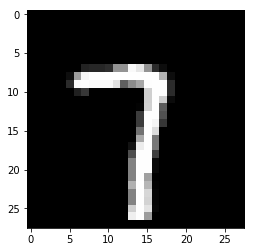

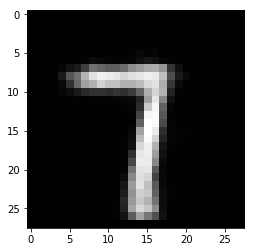

24800 29.093088 19.13675 9.956339
24801 29.093088 19.13675 9.956339
24802 29.093088 19.13675 9.956339
24803 29.093088 19.13675 9.956339
24804 29.093088 19.13675 9.956339
24805 29.093088 19.13675 9.956339
24806 29.093088 19.13675 9.956339
24807 29.093088 19.13675 9.956339
24808 29.093088 19.13675 9.956339
24809 29.093088 19.13675 9.956339
24810 29.093088 19.13675 9.956339
24811 29.093088 19.13675 9.956339
24812 29.093088 19.13675 9.956339
24813 29.093088 19.13675 9.956339
24814 29.093088 19.13675 9.956339
24815 29.093088 19.13675 9.956339
24816 29.093088 19.13675 9.956339
24817 29.093088 19.13675 9.956339
24818 29.093088 19.13675 9.956339
24819 29.093088 19.13675 9.956339
24820 29.093088 19.13675 9.956339
24821 29.093088 19.13675 9.956339
24822 29.093088 19.13675 9.956339
24823 29.093088 19.13675 9.956339
24824 29.093088 19.13675 9.956339
24825 29.093088 19.13675 9.956339
24826 29.093088 19.13675 9.956339
24827 29.093088 19.13675 9.956339
24828 29.093088 19.13675 9.956339
24829 29.09308

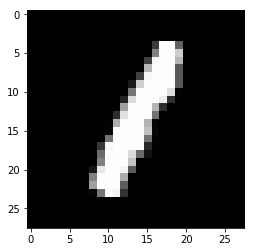

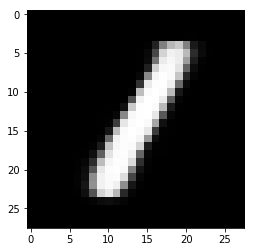

25000 22.983566 14.250246 8.733321
25001 22.983566 14.250246 8.733321
25002 22.983566 14.250246 8.733321
25003 22.983566 14.250246 8.733321
25004 22.983566 14.250246 8.733321
25005 22.983566 14.250246 8.733321
25006 22.983566 14.250246 8.733321
25007 22.983566 14.250246 8.733321
25008 22.983566 14.250246 8.733321
25009 22.983566 14.250246 8.733321
25010 22.983566 14.250246 8.733321
25011 22.983566 14.250246 8.733321
25012 22.983566 14.250246 8.733321
25013 22.983566 14.250246 8.733321
25014 22.983566 14.250246 8.733321
25015 22.983566 14.250246 8.733321
25016 22.983566 14.250246 8.733321
25017 22.983566 14.250246 8.733321
25018 22.983566 14.250246 8.733321
25019 22.983566 14.250246 8.733321
25020 22.983566 14.250246 8.733321
25021 22.983566 14.250246 8.733321
25022 22.983566 14.250246 8.733321
25023 22.983566 14.250246 8.733321
25024 22.983566 14.250246 8.733321
25025 22.983566 14.250246 8.733321
25026 22.983566 14.250246 8.733321
25027 22.983566 14.250246 8.733321
25028 22.983566 14.2

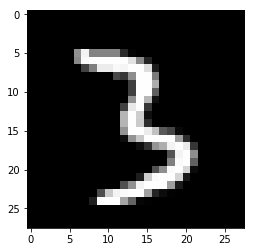

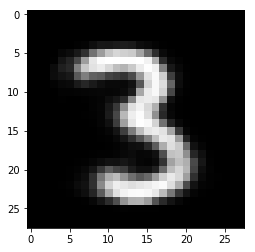

25200 30.456852 20.368212 10.088642
25201 30.456852 20.368212 10.088642
25202 30.456852 20.368212 10.088642
25203 30.456852 20.368212 10.088642
25204 30.456852 20.368212 10.088642
25205 30.456852 20.368212 10.088642
25206 30.456852 20.368212 10.088642
25207 30.456852 20.368212 10.088642
25208 30.456852 20.368212 10.088642
25209 30.456852 20.368212 10.088642
25210 30.456852 20.368212 10.088642
25211 30.456852 20.368212 10.088642
25212 30.456852 20.368212 10.088642
25213 30.456852 20.368212 10.088642
25214 30.456852 20.368212 10.088642
25215 30.456852 20.368212 10.088642
25216 30.456852 20.368212 10.088642
25217 30.456852 20.368212 10.088642
25218 30.456852 20.368212 10.088642
25219 30.456852 20.368212 10.088642
25220 30.456852 20.368212 10.088642
25221 30.456852 20.368212 10.088642
25222 30.456852 20.368212 10.088642
25223 30.456852 20.368212 10.088642
25224 30.456852 20.368212 10.088642
25225 30.456852 20.368212 10.088642
25226 30.456852 20.368212 10.088642
25227 30.456852 20.368212 10

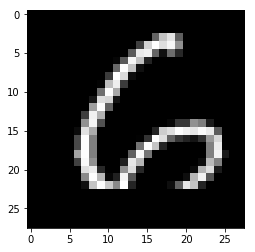

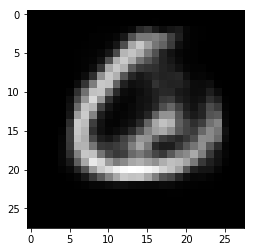

25400 33.92569 24.421747 9.50394
25401 33.92569 24.421747 9.50394
25402 33.92569 24.421747 9.50394
25403 33.92569 24.421747 9.50394
25404 33.92569 24.421747 9.50394
25405 33.92569 24.421747 9.50394
25406 33.92569 24.421747 9.50394
25407 33.92569 24.421747 9.50394
25408 33.92569 24.421747 9.50394
25409 33.92569 24.421747 9.50394
25410 33.92569 24.421747 9.50394
25411 33.92569 24.421747 9.50394
25412 33.92569 24.421747 9.50394
25413 33.92569 24.421747 9.50394
25414 33.92569 24.421747 9.50394
25415 33.92569 24.421747 9.50394
25416 33.92569 24.421747 9.50394
25417 33.92569 24.421747 9.50394
25418 33.92569 24.421747 9.50394
25419 33.92569 24.421747 9.50394
25420 33.92569 24.421747 9.50394
25421 33.92569 24.421747 9.50394
25422 33.92569 24.421747 9.50394
25423 33.92569 24.421747 9.50394
25424 33.92569 24.421747 9.50394
25425 33.92569 24.421747 9.50394
25426 33.92569 24.421747 9.50394
25427 33.92569 24.421747 9.50394
25428 33.92569 24.421747 9.50394
25429 33.92569 24.421747 9.50394
25430 33.9

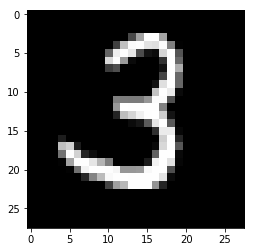

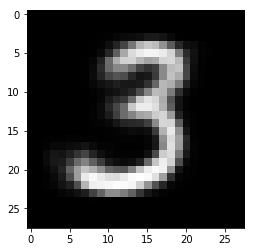

25600 29.141813 19.636623 9.50519
25601 29.141813 19.636623 9.50519
25602 29.141813 19.636623 9.50519
25603 29.141813 19.636623 9.50519
25604 29.141813 19.636623 9.50519
25605 29.141813 19.636623 9.50519
25606 29.141813 19.636623 9.50519
25607 29.141813 19.636623 9.50519
25608 29.141813 19.636623 9.50519
25609 29.141813 19.636623 9.50519
25610 29.141813 19.636623 9.50519
25611 29.141813 19.636623 9.50519
25612 29.141813 19.636623 9.50519
25613 29.141813 19.636623 9.50519
25614 29.141813 19.636623 9.50519
25615 29.141813 19.636623 9.50519
25616 29.141813 19.636623 9.50519
25617 29.141813 19.636623 9.50519
25618 29.141813 19.636623 9.50519
25619 29.141813 19.636623 9.50519
25620 29.141813 19.636623 9.50519
25621 29.141813 19.636623 9.50519
25622 29.141813 19.636623 9.50519
25623 29.141813 19.636623 9.50519
25624 29.141813 19.636623 9.50519
25625 29.141813 19.636623 9.50519
25626 29.141813 19.636623 9.50519
25627 29.141813 19.636623 9.50519
25628 29.141813 19.636623 9.50519
25629 29.14181

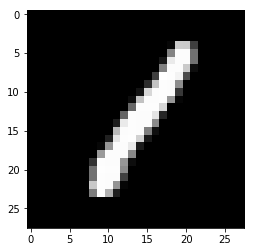

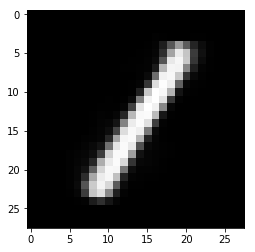

25800 27.806438 17.730145 10.076294
25801 27.806438 17.730145 10.076294
25802 27.806438 17.730145 10.076294
25803 27.806438 17.730145 10.076294
25804 27.806438 17.730145 10.076294
25805 27.806438 17.730145 10.076294
25806 27.806438 17.730145 10.076294
25807 27.806438 17.730145 10.076294
25808 27.806438 17.730145 10.076294
25809 27.806438 17.730145 10.076294
25810 27.806438 17.730145 10.076294
25811 27.806438 17.730145 10.076294
25812 27.806438 17.730145 10.076294
25813 27.806438 17.730145 10.076294
25814 27.806438 17.730145 10.076294
25815 27.806438 17.730145 10.076294
25816 27.806438 17.730145 10.076294
25817 27.806438 17.730145 10.076294
25818 27.806438 17.730145 10.076294
25819 27.806438 17.730145 10.076294
25820 27.806438 17.730145 10.076294
25821 27.806438 17.730145 10.076294
25822 27.806438 17.730145 10.076294
25823 27.806438 17.730145 10.076294
25824 27.806438 17.730145 10.076294
25825 27.806438 17.730145 10.076294
25826 27.806438 17.730145 10.076294
25827 27.806438 17.730145 10

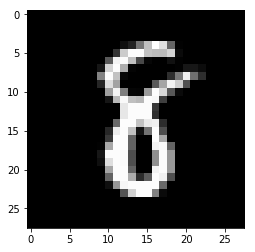

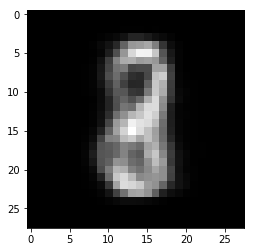

26000 30.796185 21.15329 9.642894
26001 30.796185 21.15329 9.642894
26002 30.796185 21.15329 9.642894
26003 30.796185 21.15329 9.642894
26004 30.796185 21.15329 9.642894
26005 30.796185 21.15329 9.642894
26006 30.796185 21.15329 9.642894
26007 30.796185 21.15329 9.642894
26008 30.796185 21.15329 9.642894
26009 30.796185 21.15329 9.642894
26010 30.796185 21.15329 9.642894
26011 30.796185 21.15329 9.642894
26012 30.796185 21.15329 9.642894
26013 30.796185 21.15329 9.642894
26014 30.796185 21.15329 9.642894
26015 30.796185 21.15329 9.642894
26016 30.796185 21.15329 9.642894
26017 30.796185 21.15329 9.642894
26018 30.796185 21.15329 9.642894
26019 30.796185 21.15329 9.642894
26020 30.796185 21.15329 9.642894
26021 30.796185 21.15329 9.642894
26022 30.796185 21.15329 9.642894
26023 30.796185 21.15329 9.642894
26024 30.796185 21.15329 9.642894
26025 30.796185 21.15329 9.642894
26026 30.796185 21.15329 9.642894
26027 30.796185 21.15329 9.642894
26028 30.796185 21.15329 9.642894
26029 30.79618

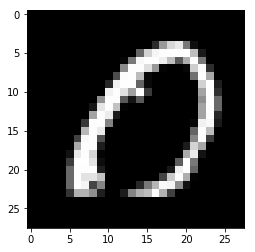

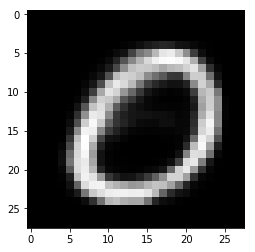

26200 33.252537 22.055046 11.197491
26201 33.252537 22.055046 11.197491
26202 33.252537 22.055046 11.197491
26203 33.252537 22.055046 11.197491
26204 33.252537 22.055046 11.197491
26205 33.252537 22.055046 11.197491
26206 33.252537 22.055046 11.197491
26207 33.252537 22.055046 11.197491
26208 33.252537 22.055046 11.197491
26209 33.252537 22.055046 11.197491
26210 33.252537 22.055046 11.197491
26211 33.252537 22.055046 11.197491
26212 33.252537 22.055046 11.197491
26213 33.252537 22.055046 11.197491
26214 33.252537 22.055046 11.197491
26215 33.252537 22.055046 11.197491
26216 33.252537 22.055046 11.197491
26217 33.252537 22.055046 11.197491
26218 33.252537 22.055046 11.197491
26219 33.252537 22.055046 11.197491
26220 33.252537 22.055046 11.197491
26221 33.252537 22.055046 11.197491
26222 33.252537 22.055046 11.197491
26223 33.252537 22.055046 11.197491
26224 33.252537 22.055046 11.197491
26225 33.252537 22.055046 11.197491
26226 33.252537 22.055046 11.197491
26227 33.252537 22.055046 11

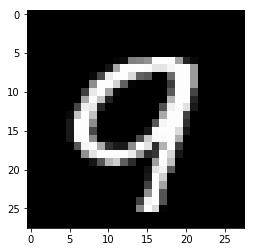

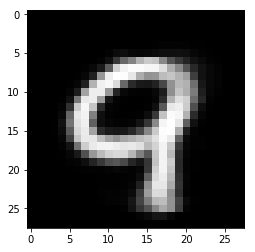

26400 26.405148 16.961863 9.443285
26401 26.405148 16.961863 9.443285
26402 26.405148 16.961863 9.443285
26403 26.405148 16.961863 9.443285
26404 26.405148 16.961863 9.443285
26405 26.405148 16.961863 9.443285
26406 26.405148 16.961863 9.443285
26407 26.405148 16.961863 9.443285
26408 26.405148 16.961863 9.443285
26409 26.405148 16.961863 9.443285
26410 26.405148 16.961863 9.443285
26411 26.405148 16.961863 9.443285
26412 26.405148 16.961863 9.443285
26413 26.405148 16.961863 9.443285
26414 26.405148 16.961863 9.443285
26415 26.405148 16.961863 9.443285
26416 26.405148 16.961863 9.443285
26417 26.405148 16.961863 9.443285
26418 26.405148 16.961863 9.443285
26419 26.405148 16.961863 9.443285
26420 26.405148 16.961863 9.443285
26421 26.405148 16.961863 9.443285
26422 26.405148 16.961863 9.443285
26423 26.405148 16.961863 9.443285
26424 26.405148 16.961863 9.443285
26425 26.405148 16.961863 9.443285
26426 26.405148 16.961863 9.443285
26427 26.405148 16.961863 9.443285
26428 26.405148 16.9

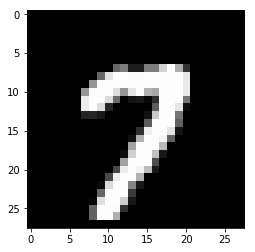

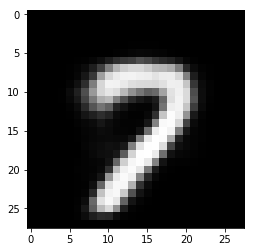

26600 29.207329 19.275892 9.931433
26601 29.207329 19.275892 9.931433
26602 29.207329 19.275892 9.931433
26603 29.207329 19.275892 9.931433
26604 29.207329 19.275892 9.931433
26605 29.207329 19.275892 9.931433
26606 29.207329 19.275892 9.931433
26607 29.207329 19.275892 9.931433
26608 29.207329 19.275892 9.931433
26609 29.207329 19.275892 9.931433
26610 29.207329 19.275892 9.931433
26611 29.207329 19.275892 9.931433
26612 29.207329 19.275892 9.931433
26613 29.207329 19.275892 9.931433
26614 29.207329 19.275892 9.931433
26615 29.207329 19.275892 9.931433
26616 29.207329 19.275892 9.931433
26617 29.207329 19.275892 9.931433
26618 29.207329 19.275892 9.931433
26619 29.207329 19.275892 9.931433
26620 29.207329 19.275892 9.931433
26621 29.207329 19.275892 9.931433
26622 29.207329 19.275892 9.931433
26623 29.207329 19.275892 9.931433
26624 29.207329 19.275892 9.931433
26625 29.207329 19.275892 9.931433
26626 29.207329 19.275892 9.931433
26627 29.207329 19.275892 9.931433
26628 29.207329 19.2

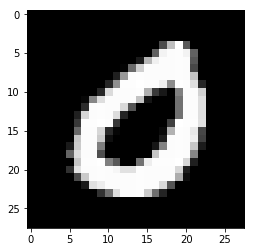

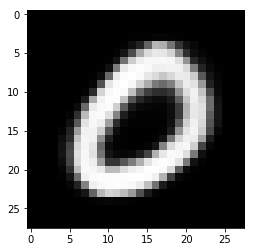

26800 33.22477 22.330791 10.893978
26801 33.22477 22.330791 10.893978
26802 33.22477 22.330791 10.893978
26803 33.22477 22.330791 10.893978
26804 33.22477 22.330791 10.893978
26805 33.22477 22.330791 10.893978
26806 33.22477 22.330791 10.893978
26807 33.22477 22.330791 10.893978
26808 33.22477 22.330791 10.893978
26809 33.22477 22.330791 10.893978
26810 33.22477 22.330791 10.893978
26811 33.22477 22.330791 10.893978
26812 33.22477 22.330791 10.893978
26813 33.22477 22.330791 10.893978
26814 33.22477 22.330791 10.893978
26815 33.22477 22.330791 10.893978
26816 33.22477 22.330791 10.893978
26817 33.22477 22.330791 10.893978
26818 33.22477 22.330791 10.893978
26819 33.22477 22.330791 10.893978
26820 33.22477 22.330791 10.893978
26821 33.22477 22.330791 10.893978
26822 33.22477 22.330791 10.893978
26823 33.22477 22.330791 10.893978
26824 33.22477 22.330791 10.893978
26825 33.22477 22.330791 10.893978
26826 33.22477 22.330791 10.893978
26827 33.22477 22.330791 10.893978
26828 33.22477 22.33

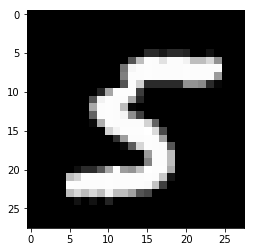

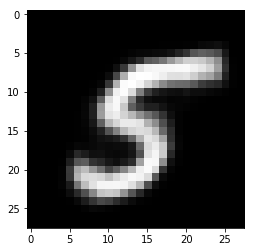

27000 30.224136 20.102535 10.1216
27001 30.224136 20.102535 10.1216
27002 30.224136 20.102535 10.1216
27003 30.224136 20.102535 10.1216
27004 30.224136 20.102535 10.1216
27005 30.224136 20.102535 10.1216
27006 30.224136 20.102535 10.1216
27007 30.224136 20.102535 10.1216
27008 30.224136 20.102535 10.1216
27009 30.224136 20.102535 10.1216
27010 30.224136 20.102535 10.1216
27011 30.224136 20.102535 10.1216
27012 30.224136 20.102535 10.1216
27013 30.224136 20.102535 10.1216
27014 30.224136 20.102535 10.1216
27015 30.224136 20.102535 10.1216
27016 30.224136 20.102535 10.1216
27017 30.224136 20.102535 10.1216
27018 30.224136 20.102535 10.1216
27019 30.224136 20.102535 10.1216
27020 30.224136 20.102535 10.1216
27021 30.224136 20.102535 10.1216
27022 30.224136 20.102535 10.1216
27023 30.224136 20.102535 10.1216
27024 30.224136 20.102535 10.1216
27025 30.224136 20.102535 10.1216
27026 30.224136 20.102535 10.1216
27027 30.224136 20.102535 10.1216
27028 30.224136 20.102535 10.1216
27029 30.22413

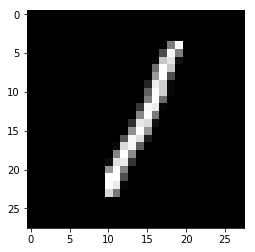

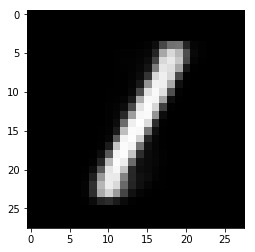

27200 31.11681 21.77172 9.345092
27201 31.11681 21.77172 9.345092
27202 31.11681 21.77172 9.345092
27203 31.11681 21.77172 9.345092
27204 31.11681 21.77172 9.345092
27205 31.11681 21.77172 9.345092
27206 31.11681 21.77172 9.345092
27207 31.11681 21.77172 9.345092
27208 31.11681 21.77172 9.345092
27209 31.11681 21.77172 9.345092
27210 31.11681 21.77172 9.345092
27211 31.11681 21.77172 9.345092
27212 31.11681 21.77172 9.345092
27213 31.11681 21.77172 9.345092
27214 31.11681 21.77172 9.345092
27215 31.11681 21.77172 9.345092
27216 31.11681 21.77172 9.345092
27217 31.11681 21.77172 9.345092
27218 31.11681 21.77172 9.345092
27219 31.11681 21.77172 9.345092
27220 31.11681 21.77172 9.345092
27221 31.11681 21.77172 9.345092
27222 31.11681 21.77172 9.345092
27223 31.11681 21.77172 9.345092
27224 31.11681 21.77172 9.345092
27225 31.11681 21.77172 9.345092
27226 31.11681 21.77172 9.345092
27227 31.11681 21.77172 9.345092
27228 31.11681 21.77172 9.345092
27229 31.11681 21.77172 9.345092
27230 31.1

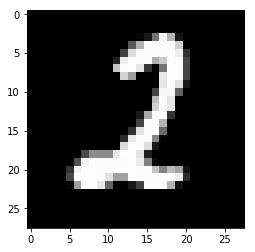

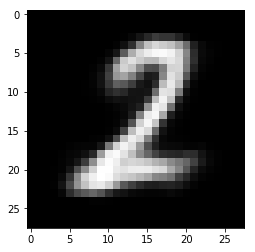

27400 27.345043 15.896225 11.448818
27401 27.345043 15.896225 11.448818
27402 27.345043 15.896225 11.448818
27403 27.345043 15.896225 11.448818
27404 27.345043 15.896225 11.448818
27405 27.345043 15.896225 11.448818
27406 27.345043 15.896225 11.448818
27407 27.345043 15.896225 11.448818
27408 27.345043 15.896225 11.448818
27409 27.345043 15.896225 11.448818
27410 27.345043 15.896225 11.448818
27411 27.345043 15.896225 11.448818
27412 27.345043 15.896225 11.448818
27413 27.345043 15.896225 11.448818
27414 27.345043 15.896225 11.448818
27415 27.345043 15.896225 11.448818
27416 27.345043 15.896225 11.448818
27417 27.345043 15.896225 11.448818
27418 27.345043 15.896225 11.448818
27419 27.345043 15.896225 11.448818
27420 27.345043 15.896225 11.448818
27421 27.345043 15.896225 11.448818
27422 27.345043 15.896225 11.448818
27423 27.345043 15.896225 11.448818
27424 27.345043 15.896225 11.448818
27425 27.345043 15.896225 11.448818
27426 27.345043 15.896225 11.448818
27427 27.345043 15.896225 11

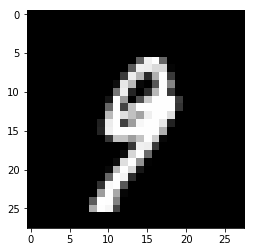

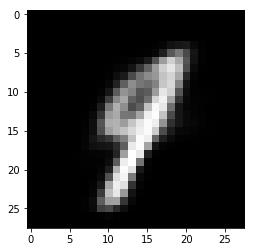

27600 28.58149 19.370543 9.210947
27601 28.58149 19.370543 9.210947
27602 28.58149 19.370543 9.210947
27603 28.58149 19.370543 9.210947
27604 28.58149 19.370543 9.210947
27605 28.58149 19.370543 9.210947
27606 28.58149 19.370543 9.210947
27607 28.58149 19.370543 9.210947
27608 28.58149 19.370543 9.210947
27609 28.58149 19.370543 9.210947
27610 28.58149 19.370543 9.210947
27611 28.58149 19.370543 9.210947
27612 28.58149 19.370543 9.210947
27613 28.58149 19.370543 9.210947
27614 28.58149 19.370543 9.210947
27615 28.58149 19.370543 9.210947
27616 28.58149 19.370543 9.210947
27617 28.58149 19.370543 9.210947
27618 28.58149 19.370543 9.210947
27619 28.58149 19.370543 9.210947
27620 28.58149 19.370543 9.210947
27621 28.58149 19.370543 9.210947
27622 28.58149 19.370543 9.210947
27623 28.58149 19.370543 9.210947
27624 28.58149 19.370543 9.210947
27625 28.58149 19.370543 9.210947
27626 28.58149 19.370543 9.210947
27627 28.58149 19.370543 9.210947
27628 28.58149 19.370543 9.210947
27629 28.58149

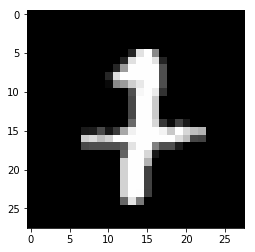

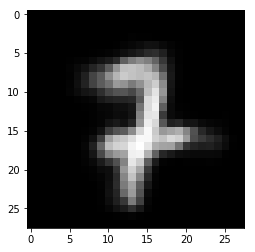

27800 28.744194 18.76781 9.976385
27801 28.744194 18.76781 9.976385
27802 28.744194 18.76781 9.976385
27803 28.744194 18.76781 9.976385
27804 28.744194 18.76781 9.976385
27805 28.744194 18.76781 9.976385
27806 28.744194 18.76781 9.976385
27807 28.744194 18.76781 9.976385
27808 28.744194 18.76781 9.976385
27809 28.744194 18.76781 9.976385
27810 28.744194 18.76781 9.976385
27811 28.744194 18.76781 9.976385
27812 28.744194 18.76781 9.976385
27813 28.744194 18.76781 9.976385
27814 28.744194 18.76781 9.976385
27815 28.744194 18.76781 9.976385
27816 28.744194 18.76781 9.976385
27817 28.744194 18.76781 9.976385
27818 28.744194 18.76781 9.976385
27819 28.744194 18.76781 9.976385
27820 28.744194 18.76781 9.976385
27821 28.744194 18.76781 9.976385
27822 28.744194 18.76781 9.976385
27823 28.744194 18.76781 9.976385
27824 28.744194 18.76781 9.976385
27825 28.744194 18.76781 9.976385
27826 28.744194 18.76781 9.976385
27827 28.744194 18.76781 9.976385
27828 28.744194 18.76781 9.976385
27829 28.74419

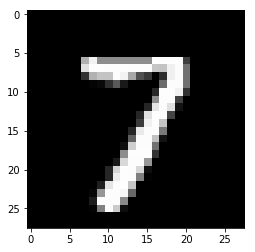

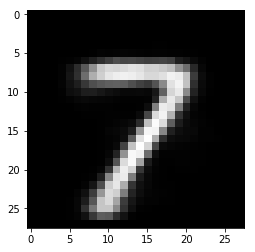

28000 28.965185 18.718342 10.246843
28001 28.965185 18.718342 10.246843
28002 28.965185 18.718342 10.246843
28003 28.965185 18.718342 10.246843
28004 28.965185 18.718342 10.246843
28005 28.965185 18.718342 10.246843
28006 28.965185 18.718342 10.246843
28007 28.965185 18.718342 10.246843
28008 28.965185 18.718342 10.246843
28009 28.965185 18.718342 10.246843
28010 28.965185 18.718342 10.246843
28011 28.965185 18.718342 10.246843
28012 28.965185 18.718342 10.246843
28013 28.965185 18.718342 10.246843
28014 28.965185 18.718342 10.246843
28015 28.965185 18.718342 10.246843
28016 28.965185 18.718342 10.246843
28017 28.965185 18.718342 10.246843
28018 28.965185 18.718342 10.246843
28019 28.965185 18.718342 10.246843
28020 28.965185 18.718342 10.246843
28021 28.965185 18.718342 10.246843
28022 28.965185 18.718342 10.246843
28023 28.965185 18.718342 10.246843
28024 28.965185 18.718342 10.246843
28025 28.965185 18.718342 10.246843
28026 28.965185 18.718342 10.246843
28027 28.965185 18.718342 10

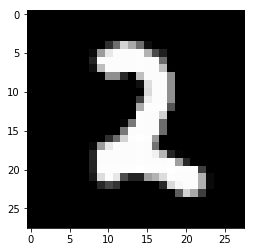

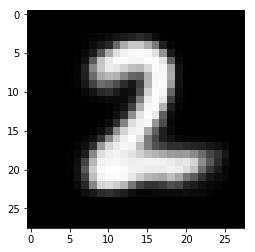

28200 27.362692 17.98629 9.376402
28201 27.362692 17.98629 9.376402
28202 27.362692 17.98629 9.376402
28203 27.362692 17.98629 9.376402
28204 27.362692 17.98629 9.376402
28205 27.362692 17.98629 9.376402
28206 27.362692 17.98629 9.376402
28207 27.362692 17.98629 9.376402
28208 27.362692 17.98629 9.376402
28209 27.362692 17.98629 9.376402
28210 27.362692 17.98629 9.376402
28211 27.362692 17.98629 9.376402
28212 27.362692 17.98629 9.376402
28213 27.362692 17.98629 9.376402
28214 27.362692 17.98629 9.376402
28215 27.362692 17.98629 9.376402
28216 27.362692 17.98629 9.376402
28217 27.362692 17.98629 9.376402
28218 27.362692 17.98629 9.376402
28219 27.362692 17.98629 9.376402
28220 27.362692 17.98629 9.376402
28221 27.362692 17.98629 9.376402
28222 27.362692 17.98629 9.376402
28223 27.362692 17.98629 9.376402
28224 27.362692 17.98629 9.376402
28225 27.362692 17.98629 9.376402
28226 27.362692 17.98629 9.376402
28227 27.362692 17.98629 9.376402
28228 27.362692 17.98629 9.376402
28229 27.36269

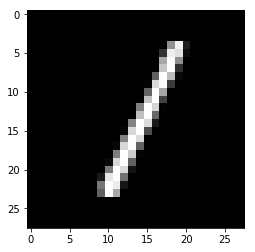

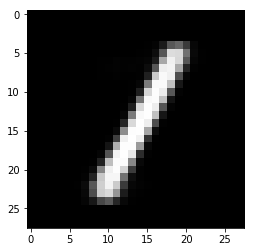

28400 28.47017 18.915947 9.55422
28401 28.47017 18.915947 9.55422
28402 28.47017 18.915947 9.55422
28403 28.47017 18.915947 9.55422
28404 28.47017 18.915947 9.55422
28405 28.47017 18.915947 9.55422
28406 28.47017 18.915947 9.55422
28407 28.47017 18.915947 9.55422
28408 28.47017 18.915947 9.55422
28409 28.47017 18.915947 9.55422
28410 28.47017 18.915947 9.55422
28411 28.47017 18.915947 9.55422
28412 28.47017 18.915947 9.55422
28413 28.47017 18.915947 9.55422
28414 28.47017 18.915947 9.55422
28415 28.47017 18.915947 9.55422
28416 28.47017 18.915947 9.55422
28417 28.47017 18.915947 9.55422
28418 28.47017 18.915947 9.55422
28419 28.47017 18.915947 9.55422
28420 28.47017 18.915947 9.55422
28421 28.47017 18.915947 9.55422
28422 28.47017 18.915947 9.55422
28423 28.47017 18.915947 9.55422
28424 28.47017 18.915947 9.55422
28425 28.47017 18.915947 9.55422
28426 28.47017 18.915947 9.55422
28427 28.47017 18.915947 9.55422
28428 28.47017 18.915947 9.55422
28429 28.47017 18.915947 9.55422
28430 28.4

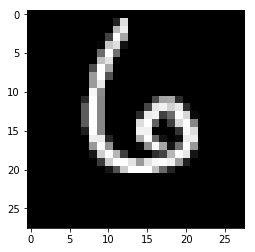

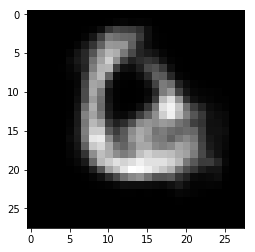

28600 34.12967 24.031807 10.097863
28601 34.12967 24.031807 10.097863
28602 34.12967 24.031807 10.097863
28603 34.12967 24.031807 10.097863
28604 34.12967 24.031807 10.097863
28605 34.12967 24.031807 10.097863
28606 34.12967 24.031807 10.097863
28607 34.12967 24.031807 10.097863
28608 34.12967 24.031807 10.097863
28609 34.12967 24.031807 10.097863
28610 34.12967 24.031807 10.097863
28611 34.12967 24.031807 10.097863
28612 34.12967 24.031807 10.097863
28613 34.12967 24.031807 10.097863
28614 34.12967 24.031807 10.097863
28615 34.12967 24.031807 10.097863
28616 34.12967 24.031807 10.097863
28617 34.12967 24.031807 10.097863
28618 34.12967 24.031807 10.097863
28619 34.12967 24.031807 10.097863
28620 34.12967 24.031807 10.097863
28621 34.12967 24.031807 10.097863
28622 34.12967 24.031807 10.097863
28623 34.12967 24.031807 10.097863
28624 34.12967 24.031807 10.097863
28625 34.12967 24.031807 10.097863
28626 34.12967 24.031807 10.097863
28627 34.12967 24.031807 10.097863
28628 34.12967 24.03

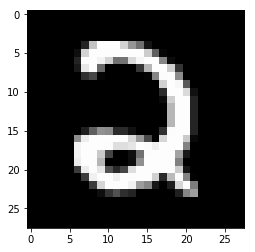

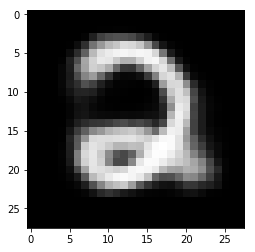

28800 29.867275 20.09704 9.770236
28801 29.867275 20.09704 9.770236
28802 29.867275 20.09704 9.770236
28803 29.867275 20.09704 9.770236
28804 29.867275 20.09704 9.770236
28805 29.867275 20.09704 9.770236
28806 29.867275 20.09704 9.770236
28807 29.867275 20.09704 9.770236
28808 29.867275 20.09704 9.770236
28809 29.867275 20.09704 9.770236
28810 29.867275 20.09704 9.770236
28811 29.867275 20.09704 9.770236
28812 29.867275 20.09704 9.770236
28813 29.867275 20.09704 9.770236
28814 29.867275 20.09704 9.770236
28815 29.867275 20.09704 9.770236
28816 29.867275 20.09704 9.770236
28817 29.867275 20.09704 9.770236
28818 29.867275 20.09704 9.770236
28819 29.867275 20.09704 9.770236
28820 29.867275 20.09704 9.770236
28821 29.867275 20.09704 9.770236
28822 29.867275 20.09704 9.770236
28823 29.867275 20.09704 9.770236
28824 29.867275 20.09704 9.770236
28825 29.867275 20.09704 9.770236
28826 29.867275 20.09704 9.770236
28827 29.867275 20.09704 9.770236
28828 29.867275 20.09704 9.770236
28829 29.86727

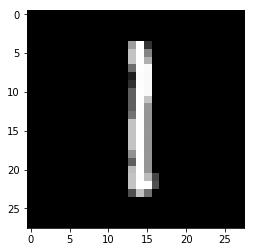

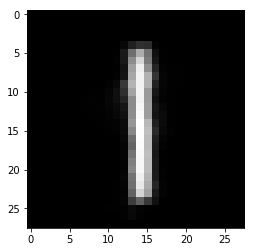

29000 31.504814 21.866833 9.637981
29001 31.504814 21.866833 9.637981
29002 31.504814 21.866833 9.637981
29003 31.504814 21.866833 9.637981
29004 31.504814 21.866833 9.637981
29005 31.504814 21.866833 9.637981
29006 31.504814 21.866833 9.637981
29007 31.504814 21.866833 9.637981
29008 31.504814 21.866833 9.637981
29009 31.504814 21.866833 9.637981
29010 31.504814 21.866833 9.637981
29011 31.504814 21.866833 9.637981
29012 31.504814 21.866833 9.637981
29013 31.504814 21.866833 9.637981
29014 31.504814 21.866833 9.637981
29015 31.504814 21.866833 9.637981
29016 31.504814 21.866833 9.637981
29017 31.504814 21.866833 9.637981
29018 31.504814 21.866833 9.637981
29019 31.504814 21.866833 9.637981
29020 31.504814 21.866833 9.637981
29021 31.504814 21.866833 9.637981
29022 31.504814 21.866833 9.637981
29023 31.504814 21.866833 9.637981
29024 31.504814 21.866833 9.637981
29025 31.504814 21.866833 9.637981
29026 31.504814 21.866833 9.637981
29027 31.504814 21.866833 9.637981
29028 31.504814 21.8

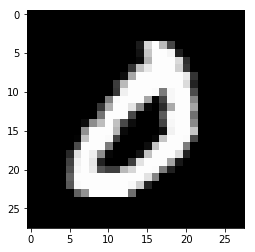

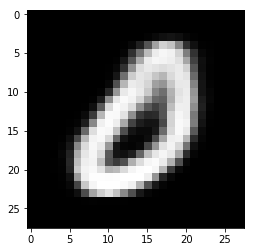

29200 25.544798 15.148031 10.396767
29201 25.544798 15.148031 10.396767
29202 25.544798 15.148031 10.396767
29203 25.544798 15.148031 10.396767
29204 25.544798 15.148031 10.396767
29205 25.544798 15.148031 10.396767
29206 25.544798 15.148031 10.396767
29207 25.544798 15.148031 10.396767
29208 25.544798 15.148031 10.396767
29209 25.544798 15.148031 10.396767
29210 25.544798 15.148031 10.396767
29211 25.544798 15.148031 10.396767
29212 25.544798 15.148031 10.396767
29213 25.544798 15.148031 10.396767
29214 25.544798 15.148031 10.396767
29215 25.544798 15.148031 10.396767
29216 25.544798 15.148031 10.396767
29217 25.544798 15.148031 10.396767
29218 25.544798 15.148031 10.396767
29219 25.544798 15.148031 10.396767
29220 25.544798 15.148031 10.396767
29221 25.544798 15.148031 10.396767
29222 25.544798 15.148031 10.396767
29223 25.544798 15.148031 10.396767
29224 25.544798 15.148031 10.396767
29225 25.544798 15.148031 10.396767
29226 25.544798 15.148031 10.396767
29227 25.544798 15.148031 10

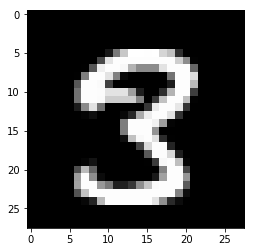

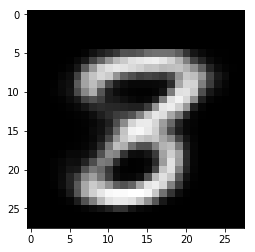

29400 32.090668 21.342663 10.748008
29401 32.090668 21.342663 10.748008
29402 32.090668 21.342663 10.748008
29403 32.090668 21.342663 10.748008
29404 32.090668 21.342663 10.748008
29405 32.090668 21.342663 10.748008
29406 32.090668 21.342663 10.748008
29407 32.090668 21.342663 10.748008
29408 32.090668 21.342663 10.748008
29409 32.090668 21.342663 10.748008
29410 32.090668 21.342663 10.748008
29411 32.090668 21.342663 10.748008
29412 32.090668 21.342663 10.748008
29413 32.090668 21.342663 10.748008
29414 32.090668 21.342663 10.748008
29415 32.090668 21.342663 10.748008
29416 32.090668 21.342663 10.748008
29417 32.090668 21.342663 10.748008
29418 32.090668 21.342663 10.748008
29419 32.090668 21.342663 10.748008
29420 32.090668 21.342663 10.748008
29421 32.090668 21.342663 10.748008
29422 32.090668 21.342663 10.748008
29423 32.090668 21.342663 10.748008
29424 32.090668 21.342663 10.748008
29425 32.090668 21.342663 10.748008
29426 32.090668 21.342663 10.748008
29427 32.090668 21.342663 10

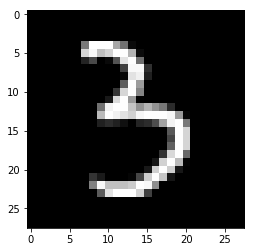

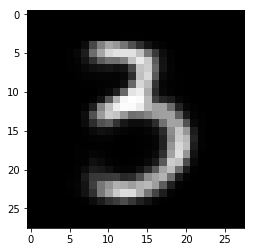

29600 29.008236 18.373684 10.63455
29601 29.008236 18.373684 10.63455
29602 29.008236 18.373684 10.63455
29603 29.008236 18.373684 10.63455
29604 29.008236 18.373684 10.63455
29605 29.008236 18.373684 10.63455
29606 29.008236 18.373684 10.63455
29607 29.008236 18.373684 10.63455
29608 29.008236 18.373684 10.63455
29609 29.008236 18.373684 10.63455
29610 29.008236 18.373684 10.63455
29611 29.008236 18.373684 10.63455
29612 29.008236 18.373684 10.63455
29613 29.008236 18.373684 10.63455
29614 29.008236 18.373684 10.63455
29615 29.008236 18.373684 10.63455
29616 29.008236 18.373684 10.63455
29617 29.008236 18.373684 10.63455
29618 29.008236 18.373684 10.63455
29619 29.008236 18.373684 10.63455
29620 29.008236 18.373684 10.63455
29621 29.008236 18.373684 10.63455
29622 29.008236 18.373684 10.63455
29623 29.008236 18.373684 10.63455
29624 29.008236 18.373684 10.63455
29625 29.008236 18.373684 10.63455
29626 29.008236 18.373684 10.63455
29627 29.008236 18.373684 10.63455
29628 29.008236 18.3

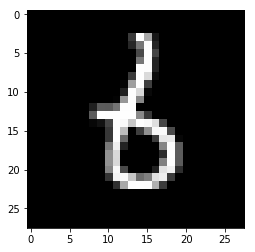

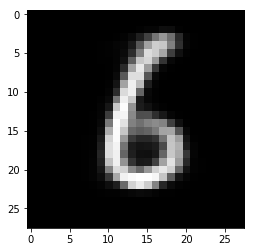

29800 27.891806 18.084717 9.807089
29801 27.891806 18.084717 9.807089
29802 27.891806 18.084717 9.807089
29803 27.891806 18.084717 9.807089
29804 27.891806 18.084717 9.807089
29805 27.891806 18.084717 9.807089
29806 27.891806 18.084717 9.807089
29807 27.891806 18.084717 9.807089
29808 27.891806 18.084717 9.807089
29809 27.891806 18.084717 9.807089
29810 27.891806 18.084717 9.807089
29811 27.891806 18.084717 9.807089
29812 27.891806 18.084717 9.807089
29813 27.891806 18.084717 9.807089
29814 27.891806 18.084717 9.807089
29815 27.891806 18.084717 9.807089
29816 27.891806 18.084717 9.807089
29817 27.891806 18.084717 9.807089
29818 27.891806 18.084717 9.807089
29819 27.891806 18.084717 9.807089
29820 27.891806 18.084717 9.807089
29821 27.891806 18.084717 9.807089
29822 27.891806 18.084717 9.807089
29823 27.891806 18.084717 9.807089
29824 27.891806 18.084717 9.807089
29825 27.891806 18.084717 9.807089
29826 27.891806 18.084717 9.807089
29827 27.891806 18.084717 9.807089
29828 27.891806 18.0

In [14]:
for i in range(30000):
    batch = [np.reshape(b, [28, 28]) for b in mnist.train.next_batch(batch_size=batch_size)[0]]
    sess.run(optimizer, feed_dict = {X_in: batch, Y: batch, keep_prob: 0.8})
        
    if not i % 200:
        ls, d, i_ls, d_ls, mu, sigm = sess.run([loss, dec, img_loss, latent_loss, mn, sd], feed_dict = {X_in: batch, Y: batch, keep_prob: 1.0})
        plt.imshow(np.reshape(batch[0], [28, 28]), cmap='gray')
        plt.show()
        plt.imshow(d[0], cmap='gray')
        plt.show()
    print(i, ls, np.mean(i_ls), np.mean(d_ls))

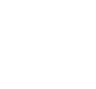

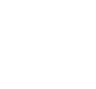

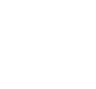

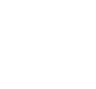

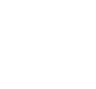

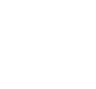

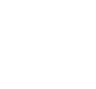

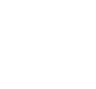

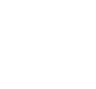

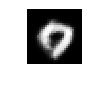

In [17]:
randoms = [np.random.normal(0, 1, n_latent) for _ in range(10)]
imgs = sess.run(dec, feed_dict = {sampled: randoms, keep_prob: 1.0})
imgs = [np.reshape(imgs[i], [28, 28]) for i in range(len(imgs))]

for img in imgs:
    plt.figure(figsize=(1,1))
    plt.axis('off')
plt.imshow(img, cmap='gray')